Importação das Bibliotecas

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Carregamento dos dados

In [74]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [75]:
data_full = pd.read_csv('MT.csv', sep = ';', header = 1, skip_blank_lines = 'True')

Limpeza de Variáveis

In [76]:
data_full.head()

Código PA    Número PA Número de Campo Data da Coleta  \
0     5358.0  10-I-AB-100             NaN     04/11/1996   
1     5358.0  10-I-AB-100             NaN     04/11/1996   
2     5358.0  10-I-AB-100             NaN     04/11/1996   
3     5358.0  10-I-AB-100             NaN     04/11/1996   
4     5359.0       09-RCC             NaN     01/10/2002   

  Responsável(is) pela Descrição             Tipo  \
0                            NaN  Perfil completo   
1                            NaN  Perfil completo   
2                            NaN  Perfil completo   
3                            NaN  Perfil completo   
4             V. A. de Oliveira   Perfil completo   

  Situação coleta das amostras               Material de Origem  \
0                     Barranco  Depósitos aluvionares arenosos.   
1                     Barranco  Depósitos aluvionares arenosos.   
2                     Barranco  Depósitos aluvionares arenosos.   
3                     Barranco  Depósitos aluvionares arenosos.   
4                          NaN      Folhelhos (?) Arenitos (?).   

                          Informações Complementares                Uso Atual  \
0  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
1  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
2  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
3  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
4  VEGETAÇÃO PRIMÁRIA - Floresta Tropical Subcadu...  Pastagem de brachiária.   

   ... Microelementos - Cobalto Microelementos - Cádmio  \
0  ...                      NaN                     NaN   
1  ...                      NaN                     NaN   
2  ...                      NaN                     NaN   
3  ...                      NaN                     NaN   
4  ...                      NaN                     NaN   

  Microelementos - Cromo Microelementos - Selênio Microelementos - Chumbo  \
0                    NaN                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   

   Microelementos - Mercúrio Microelementos - Arsênio  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   

   Microelementos - Silício  Informações adicionais da análise química  \
0                       NaN                            MO (g/Kg) = 0.9   
1                       NaN                            MO (g/Kg) = 2.2   
2                       NaN                            MO (g/Kg) = 3.4   
3                       NaN                            MO (g/Kg) = 9.5   
4                       NaN                            MO (g/Kg) = 9.9   

   Unnamed: 266  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 267 columns]

In [77]:
data_full.info(show_counts = 'True', verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 267 columns):
 #    Column                                                                    Non-Null Count  Dtype  
---   ------                                                                    --------------  -----  
 0    Código PA                                                                 1283 non-null   float64
 1    Número PA                                                                 1302 non-null   object 
 2    Número de Campo                                                           395 non-null    object 
 3    Data da Coleta                                                            1302 non-null   object 
 4    Responsável(is) pela Descrição                                            312 non-null    object 
 5    Tipo                                                                      1302 non-null   object 
 6    Situação coleta das amostras                          

In [78]:
#remoção de variáveis com todos os valores indefinidos (=NaN) 
data_1 = data_full.dropna(axis = 1, how = 'all')

In [79]:
data_1.head()

Código PA    Número PA Número de Campo Data da Coleta  \
0     5358.0  10-I-AB-100             NaN     04/11/1996   
1     5358.0  10-I-AB-100             NaN     04/11/1996   
2     5358.0  10-I-AB-100             NaN     04/11/1996   
3     5358.0  10-I-AB-100             NaN     04/11/1996   
4     5359.0       09-RCC             NaN     01/10/2002   

  Responsável(is) pela Descrição             Tipo  \
0                            NaN  Perfil completo   
1                            NaN  Perfil completo   
2                            NaN  Perfil completo   
3                            NaN  Perfil completo   
4             V. A. de Oliveira   Perfil completo   

  Situação coleta das amostras               Material de Origem  \
0                     Barranco  Depósitos aluvionares arenosos.   
1                     Barranco  Depósitos aluvionares arenosos.   
2                     Barranco  Depósitos aluvionares arenosos.   
3                     Barranco  Depósitos aluvionares arenosos.   
4                          NaN      Folhelhos (?) Arenitos (?).   

                          Informações Complementares                Uso Atual  \
0  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
1  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
2  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
3  LITOLOGIA E UNIDADE LITOESTRATIGRÁFICA ? Sedim...                      NaN   
4  VEGETAÇÃO PRIMÁRIA - Floresta Tropical Subcadu...  Pastagem de brachiária.   

   ... Água da pasta de saturação Saturação por Sódio (100.Na+/T)  \
0  ...                        NaN                             NaN   
1  ...                        NaN                             NaN   
2  ...                        NaN                             NaN   
3  ...                        NaN                             NaN   
4  ...                        NaN                             NaN   

  Condutividade Elétrica Sais Solúveis do Extrato da Saturação - Cálcio  \
0                    NaN                                            NaN   
1                    NaN                                            NaN   
2                    NaN                                            NaN   
3                    NaN                                            NaN   
4                    NaN                                            NaN   

  Sais Solúveis do Extrato da Saturação - Magnésio  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Sais Solúveis do Extrato da Saturação - Potássio  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  Sais Solúveis do Extrato da Saturação - Sódio  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Equivalente de Carbonato de Cálcio  CDB - Ferro (g/kg)  \
0                                 NaN                 NaN   
1                                 NaN                 NaN   
2                                 NaN                 NaN   
3                                 NaN                 NaN   
4                                 NaN                 NaN   

   Informações adicionais da análise química  
0                            MO (g/Kg) = 0.9  
1                            MO (g/Kg) = 2.2  
2                            MO (g/Kg) = 3.4  
3                            MO (g/Kg) = 9.5  
4 

In [80]:
data_1.info(verbose='True', show_counts='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 177 columns):
 #    Column                                                                    Non-Null Count  Dtype  
---   ------                                                                    --------------  -----  
 0    Código PA                                                                 1283 non-null   float64
 1    Número PA                                                                 1302 non-null   object 
 2    Número de Campo                                                           395 non-null    object 
 3    Data da Coleta                                                            1302 non-null   object 
 4    Responsável(is) pela Descrição                                            312 non-null    object 
 5    Tipo                                                                      1302 non-null   object 
 6    Situação coleta das amostras                          

In [81]:
#Remoção de todos as variáveis com menos de 25% de dados preenchidos
data_2 = data_1.dropna(axis = 1, thresh = 300)

In [82]:
data_2.info(verbose='True', show_counts='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 104 columns):
 #    Column                                                                    Non-Null Count  Dtype  
---   ------                                                                    --------------  -----  
 0    Código PA                                                                 1283 non-null   float64
 1    Número PA                                                                 1302 non-null   object 
 2    Número de Campo                                                           395 non-null    object 
 3    Data da Coleta                                                            1302 non-null   object 
 4    Responsável(is) pela Descrição                                            312 non-null    object 
 5    Tipo                                                                      1302 non-null   object 
 6    Situação coleta das amostras                          

In [83]:
#Preenchimento de células vazias por "nan"
data_3 = data_2.replace(r'^\s*$', np.nan, regex=True)

In [84]:
#Transformação da variável "Frações da Amostra Total - Terra Fina (g/Kg)" para float
data_3['Frações da Amostra Total - Terra Fina (g/Kg)'] = data_3['Frações da Amostra Total - Terra Fina (g/Kg)'].astype(float)

In [85]:
#Transformação dos valores com símbolo "<" para o valor numérico limite (por exemplo, <1 foi transformado para 1)
data_3['Fósforo assimilável (mg/kg)'].value_counts()

1        240
<1       114
2         68
0,1       40
3         35
0,2       30
4         13
1,1       11
0,3       11
5          5
0,5        5
9          4
0,4        3
8          3
7          3
11         3
17         3
10         3
< 1,1      3
2,4        2
0,6        2
6          2
1,6        2
23         2
16         2
130        1
15         1
74         1
28         1
71         1
11,2       1
94         1
513        1
168        1
27         1
34         1
13         1
4,9        1
1,7        1
0,7        1
1,2        1
0,9        1
1.1        1
03         1
0,         1
12         1
2,2        1
16,6       1
11,4       1
10,3       1
21         1
5,4        1
38         1
Name: Fósforo assimilável (mg/kg), dtype: int64

In [86]:
data_3['Fósforo assimilável (mg/kg)'] = data_3['Fósforo assimilável (mg/kg)'].replace('<1', 1, regex=True)

In [87]:
data_3['Fósforo assimilável (mg/kg)'] = data_3['Fósforo assimilável (mg/kg)'].replace('< 1,1', 1.1, regex=True)

In [88]:
data_3['Fósforo assimilável (mg/kg)'] = data_3['Fósforo assimilável (mg/kg)'].replace(',','.', regex=True)

In [89]:
data_3['Fósforo assimilável (mg/kg)'].value_counts()

1       240
1       114
2        68
0.1      40
3        35
0.2      30
4        13
1.1      12
0.3      11
5         5
0.5       5
9         4
1.1       3
10        3
11        3
7         3
8         3
0.4       3
17        3
0.6       2
6         2
2.4       2
1.6       2
23        2
16        2
71        1
94        1
34        1
513       1
11.2      1
168       1
74        1
27        1
130       1
28        1
15        1
13        1
0.9       1
4.9       1
1.7       1
0.7       1
1.2       1
03        1
0.        1
12        1
21        1
2.2       1
16.6      1
11.4      1
10.3      1
5.4       1
38        1
Name: Fósforo assimilável (mg/kg), dtype: int64

In [90]:
#Transformação da variável "Fósforo assimilável (mg/kg)" para float
data_3['Fósforo assimilável (mg/kg)'] = data_3['Fósforo assimilável (mg/kg)'].astype(float)

In [91]:
#Transformação dos valores com símbolo "<" para o valor numérico limite (por exemplo, <1 foi transformado para 1)
data_3['Saturação por Sódio (100.Na+/T)'].value_counts()

< 1    571
1      224
<1      96
2       88
3       43
4       20
6       17
7        9
5        7
10       7
13       6
12       5
16       3
8        3
9        3
11       2
15       2
65       1
17       1
19       1
14       1
30       1
33       1
27       1
69       1
Name: Saturação por Sódio (100.Na+/T), dtype: int64

In [92]:
data_3['Saturação por Sódio (100.Na+/T)'] = data_3['Saturação por Sódio (100.Na+/T)'].replace(['<1', '< 1'], 1, regex=True)

In [93]:
#Transformação da variável "Saturação por Sódio (100.Na+/T)" para float
data_3['Saturação por Sódio (100.Na+/T)'] = data_3['Saturação por Sódio (100.Na+/T)'].astype(float)

In [94]:
data_3.info(verbose='True', show_counts='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 104 columns):
 #    Column                                                                    Non-Null Count  Dtype  
---   ------                                                                    --------------  -----  
 0    Código PA                                                                 1283 non-null   float64
 1    Número PA                                                                 1302 non-null   object 
 2    Número de Campo                                                           395 non-null    object 
 3    Data da Coleta                                                            1302 non-null   object 
 4    Responsável(is) pela Descrição                                            312 non-null    object 
 5    Tipo                                                                      1302 non-null   object 
 6    Situação coleta das amostras                          

In [95]:
#Definição de variavéis quantitativas de interesse para a análise exploratória
var_quant = [
    'Altitude (m)',
    'Profundidade Superior',
    'Profundidade Inferior',
    'Frações da Amostra Total - Calhaus (g/Kg)',
    'Frações da Amostra Total - Cascalho (g/Kg)',
    'Frações da Amostra Total - Terra Fina (g/Kg)',
    'Composição Granulométrica da terra fina - Areia Total (g/Kg)',
    'Composição Granulométrica da terra fina - Silte (g/Kg)',
    'Composição Granulométrica da terra fina - Argila (g/Kg)',
    'Grau de Floculação (%)',
    'Porosidade Total (%)',
    'Equivalente Umidade (%)',
    'pH - H2O',
    'Complexo Sortivo - Cálcio (cmolc/kg)',
    'Complexo Sortivo - Magnésio',
    'Complexo Sortivo - Potássio',
    'Complexo Sortivo - Sódio',
    'Complexo Sortivo - Hidrogênio (H+)',
    'Complexo Sortivo - Alumínio Trocável (Al3+)',
    'Complexo Sortivo - Valor V &Delta; Saturação por Bases (100. S/T)%',
    'Complexo Sortivo - Saturação por Alumínio (100. Al3+/S+Al3+)%',
    'Ataque sulfúrico - SiO2',
    'Ataque sulfúrico - Al2O3',
    'Ataque sulfúrico - Fe2O3',
    'Ataque sulfúrico - TiO2',
    'Ataque sulfúrico - SiO2 / Al2O3 (Ki)',
    'Ataque sulfúrico - SiO2 / R2O3 (Kr)',
    'Ataque sulfúrico - Al2O3 / Fe2O3',
    'Fósforo assimilável (mg/kg)',
    'Carbono orgânico',
    'Nitrogênio total',
    'Relação C/N (%)',
    'Saturação por Sódio (100.Na+/T)'
]

In [96]:
#Definição de variavéis qualitativas de interesse para a análise exploratória
var_quali = [
    'Tipo',
    'Uso Atual',
    'Fase de Pedregosidade',
    'Fase de Relevo',
    'Relevo Local',
    'Relevo Regional',
    'Formação Geológica',
    'Classe de Solos Nível 1',
    'Saturação por bases ou por alumínio',
    'Horizonte diagnóstico superficial',
    'Grupamento de classe textural superficial',
    'Classe de pedregosidade',
    'Classe de rochosidade',
    'Classe de drenagem',
    'Grau de Consistência - Úmida',
    'Molhada - Plasticidade',
    'Molhada - Pegajosidade'
]

Análise Exploratória - Variáveis Quantitativas

In [97]:
Stat_eval = data_3[var_quant].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)
Stat_eval

Altitude (m)  Profundidade Superior  Profundidade Inferior  \
count        845.00                1282.00                1276.00   
mean         353.34                  46.43                  75.59   
std          168.62                  44.68                  57.92   
min           95.00                   0.00                   0.00   
1%            97.00                   0.00                   6.00   
25%          200.00                  10.00                  30.00   
50%          340.00                  35.00                  60.00   
75%          480.00                  75.00                 110.00   
99%          860.00                 165.95                 261.25   
max          900.00                 280.00                 410.00   

       Frações da Amostra Total - Calhaus (g/Kg)  \
count                                    1009.00   
mean                                        3.10   
std                                        19.98   
min                                         0.00   
1%                                          0.00   
25%                                         0.00   
50%                                         0.00   
75%                                         0.00   
99%                                        80.00   
max                                       370.00   

       Frações da Amostra Total - Cascalho (g/Kg)  \
count                                      923.00   
mean                                        58.94   
std                                        149.25   
min                                          0.00   
1%                                           0.00   
25%                                          0.00   
50%                                          0.00   
75%                                         30.00   
99%                                        773.40   
max                                        867.00   

       Frações da Amostra Total - Terra Fina (g/Kg)  \
count                                        996.00   
mean                                         942.25   
std                                          151.89   
min                                           77.00   
1%                                           210.00   
25%                                          980.00   
50%                                         1000.00   
75%                                         1000.00   
99%                                         1000.00   
max                                         1000.00   

       Composição Granulométrica da terra fina - Areia Total (g/Kg)  \
count                                            1248.00              
mean                                              509.11              
std                                               236.69              
min                                                 0.00              
1%                                                 50.00              
25%                                               309.50              
50%                                               520.50              
75%                                               700.75              
99%                                               928.12              
max                                               950.00              

       Composição Granulométrica da terra fina - Silte (g/Kg)  \
count                                            1248.00        
mean                                              181.96        
std                                               126.59        
min                                                10.00        
1%                                                 18.47        
25%                                                90.00        
50%                                               150.00        
75%                                               238.00        
99%                                               575.00        
max                                               79

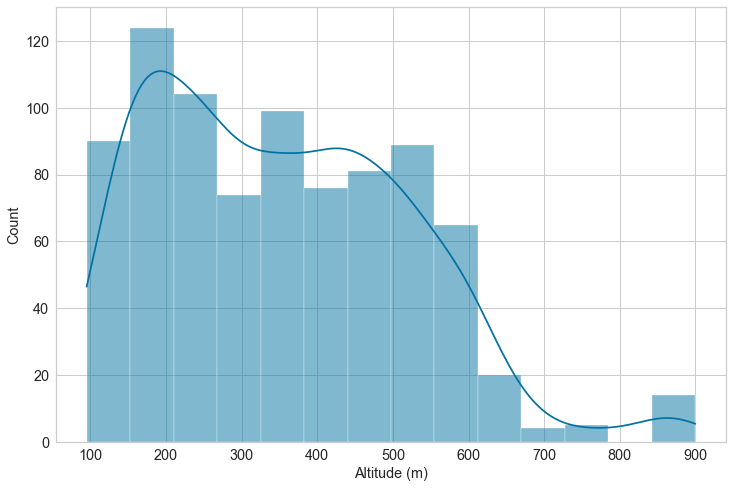

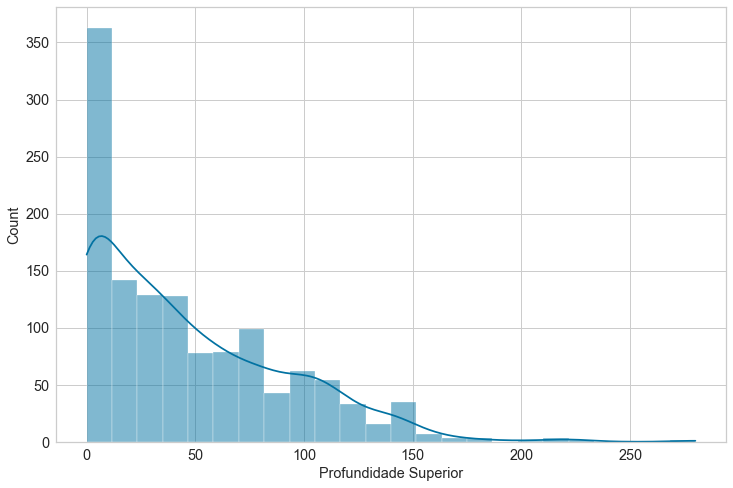

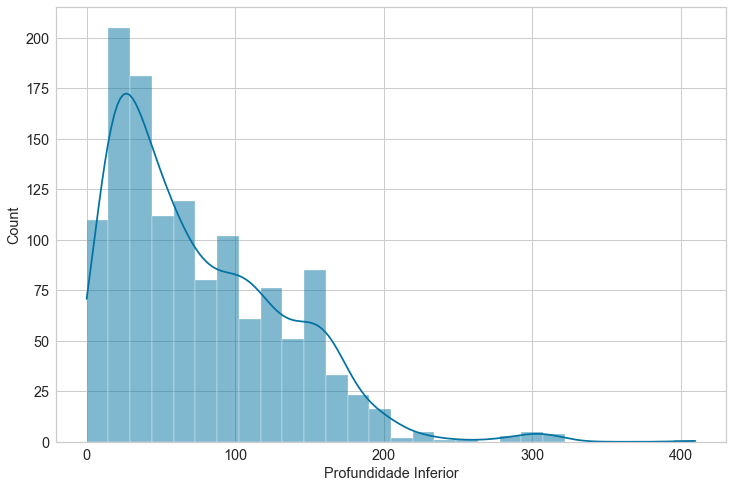

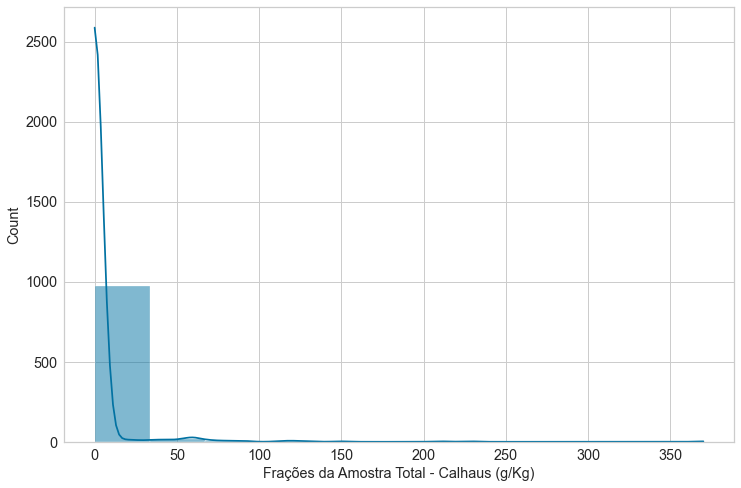

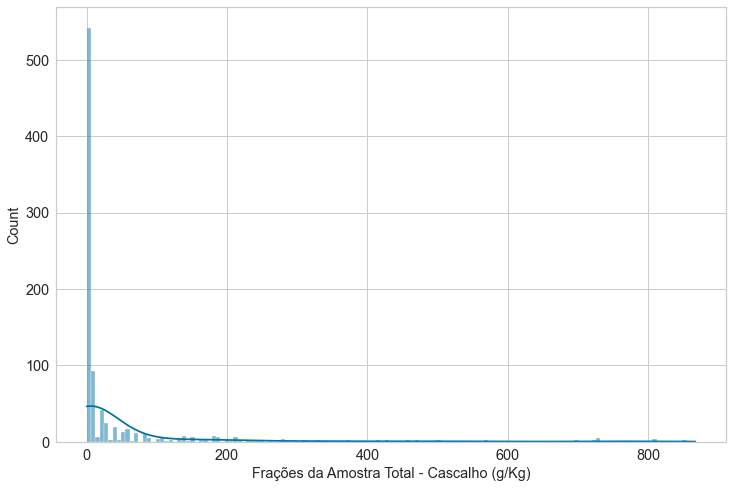

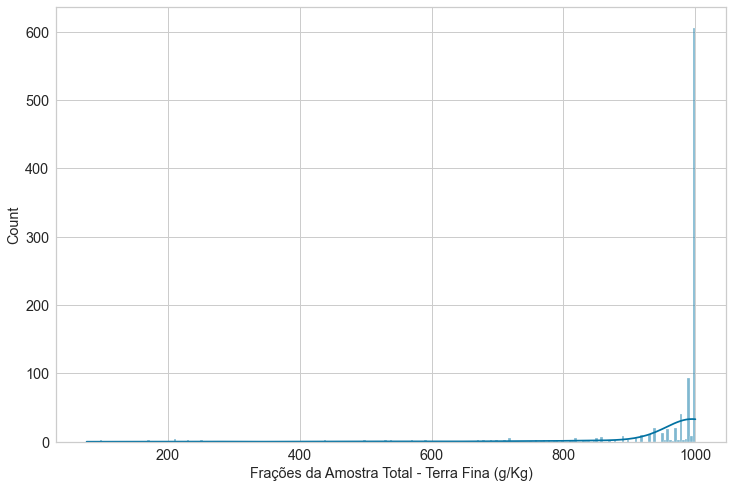

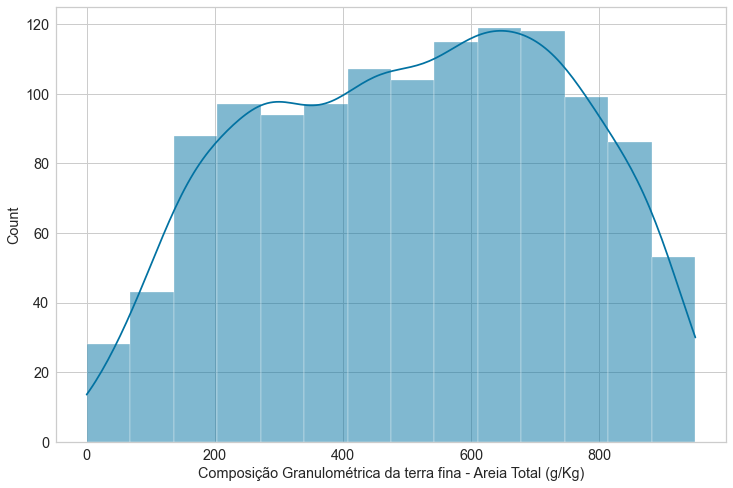

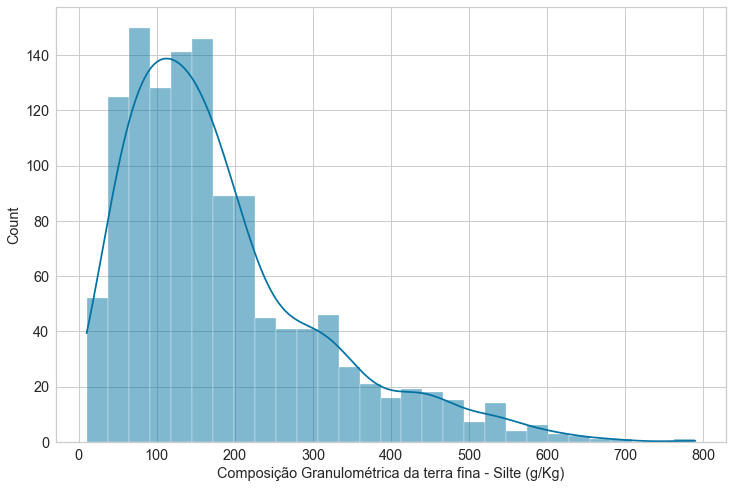

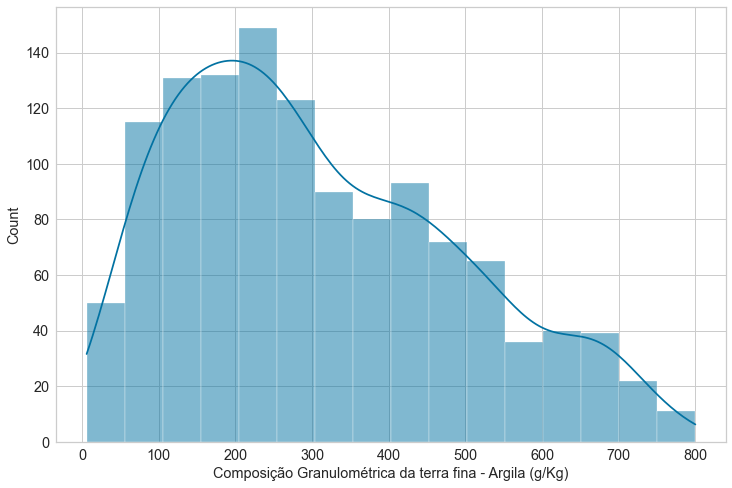

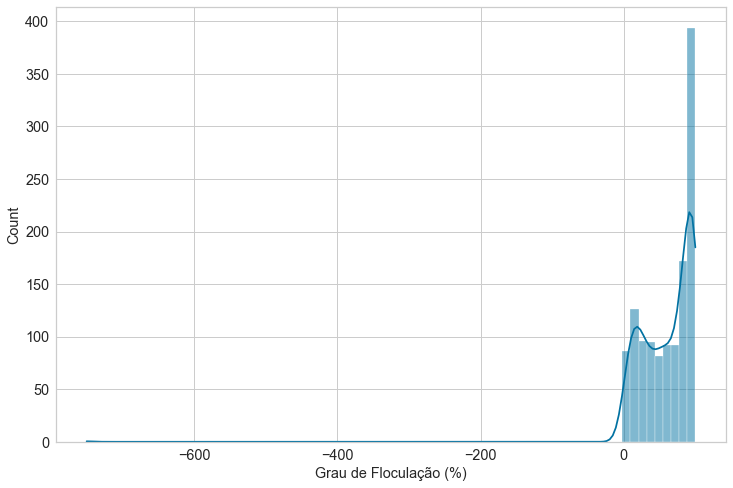

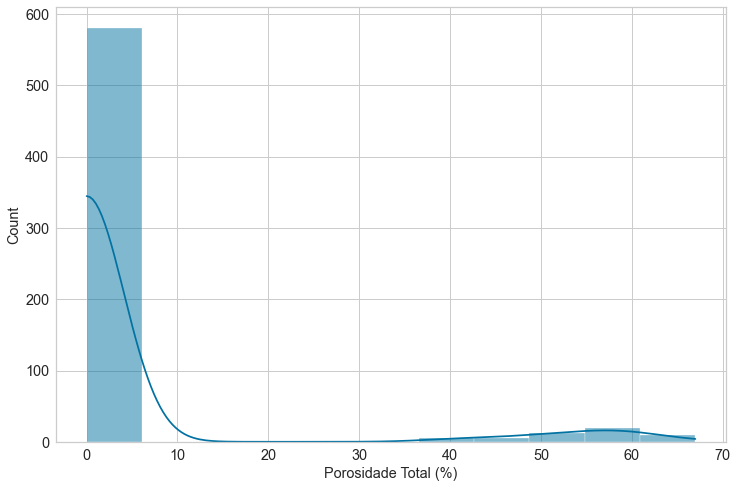

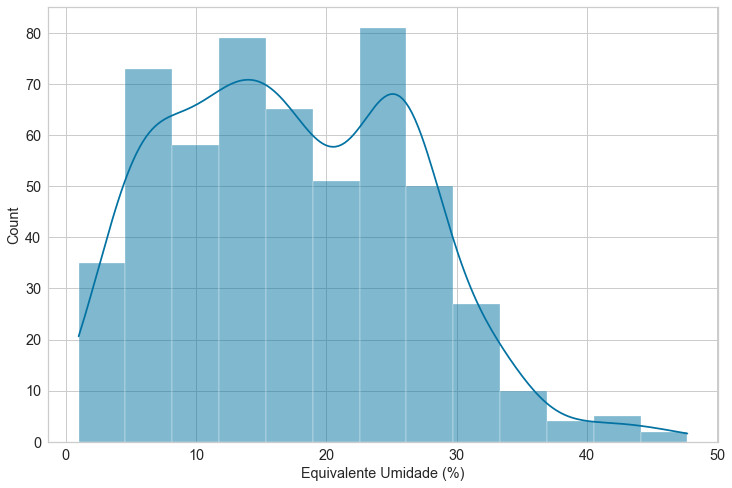

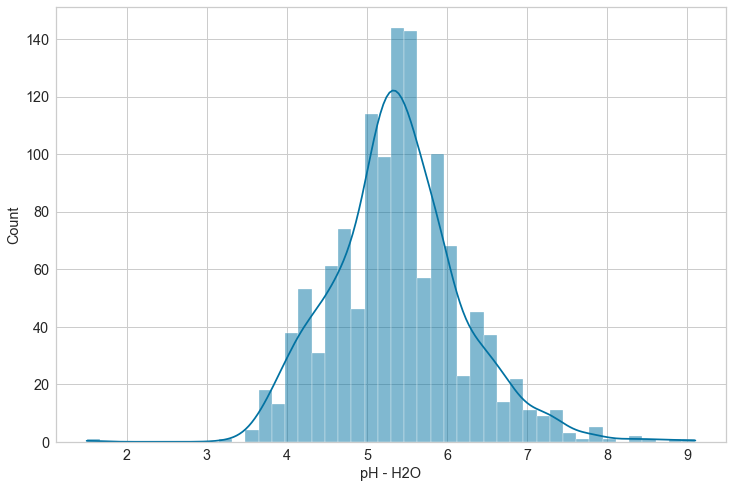

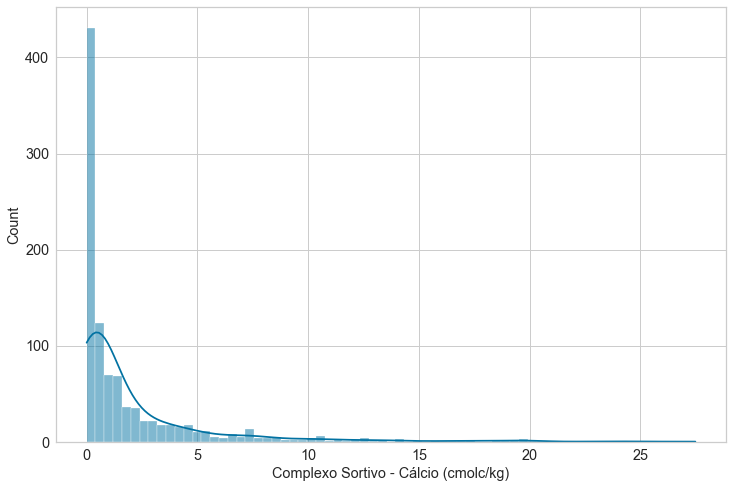

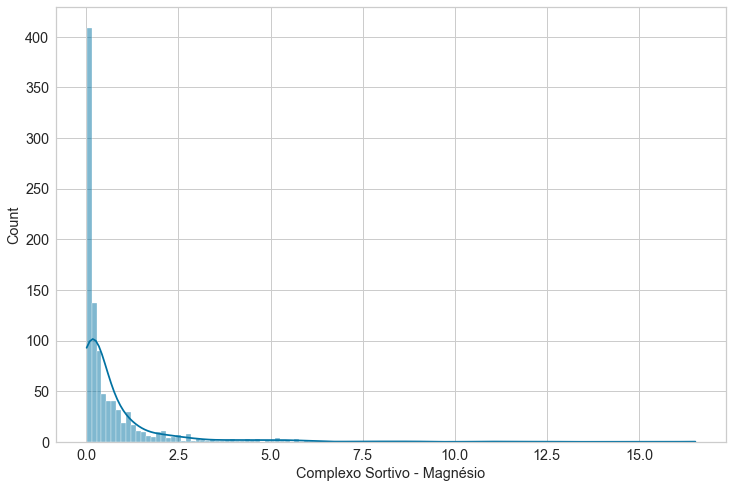

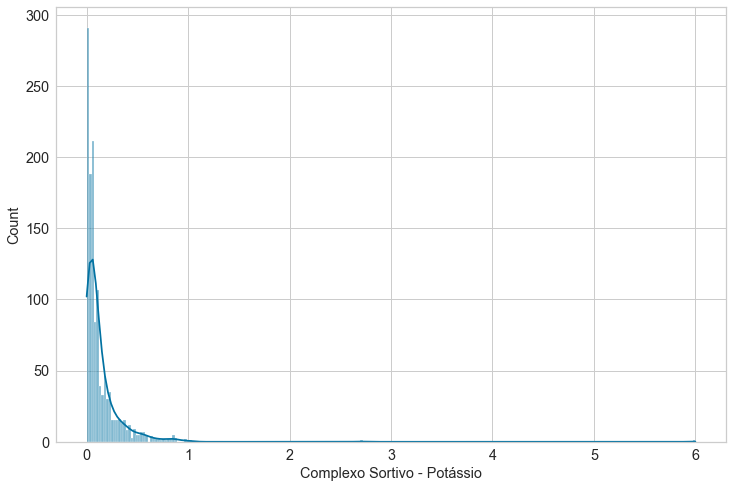

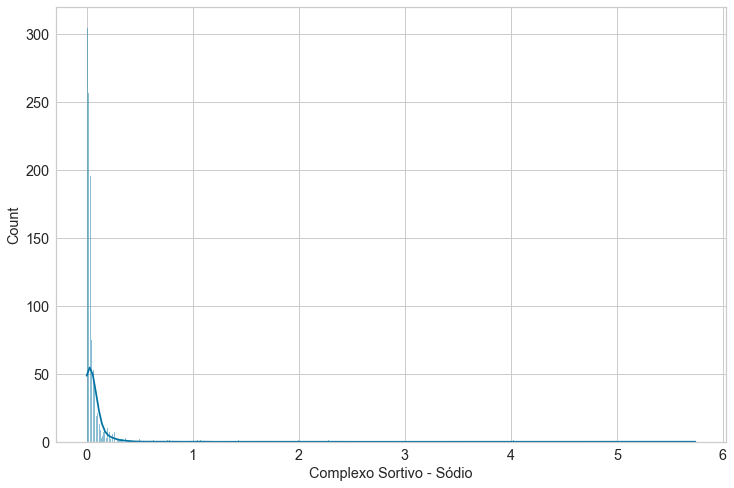

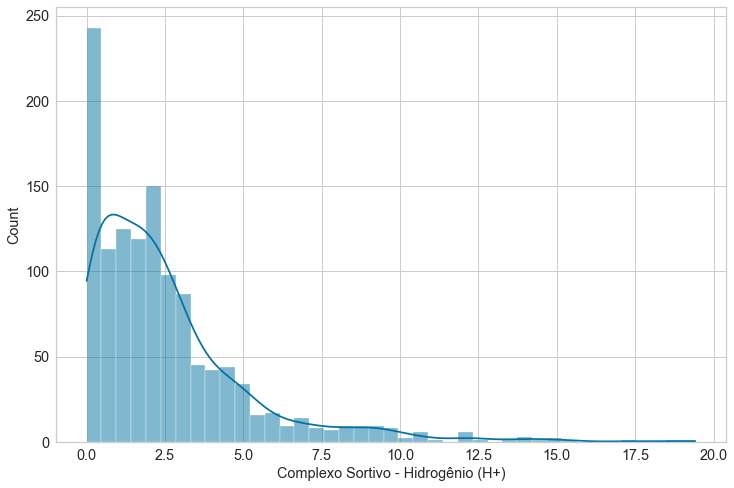

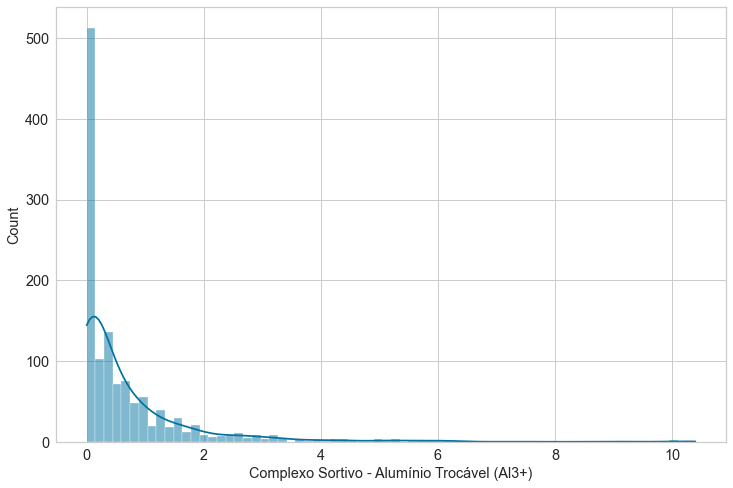

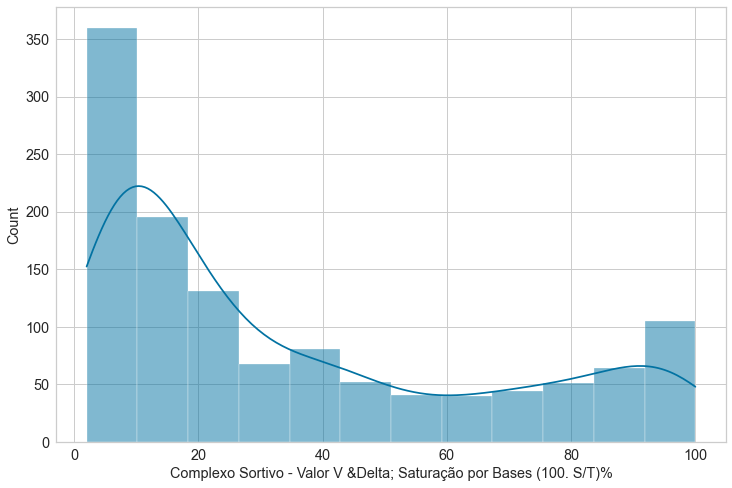

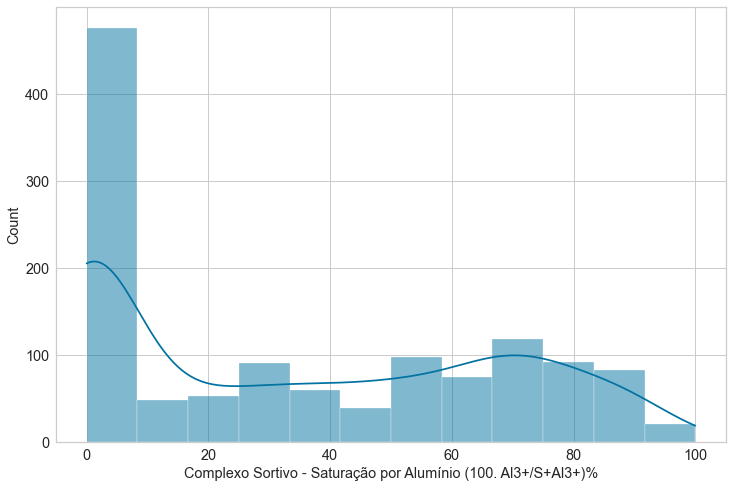

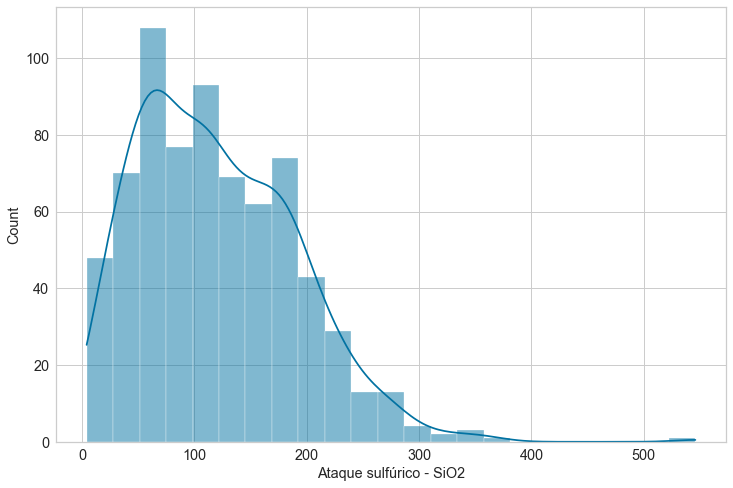

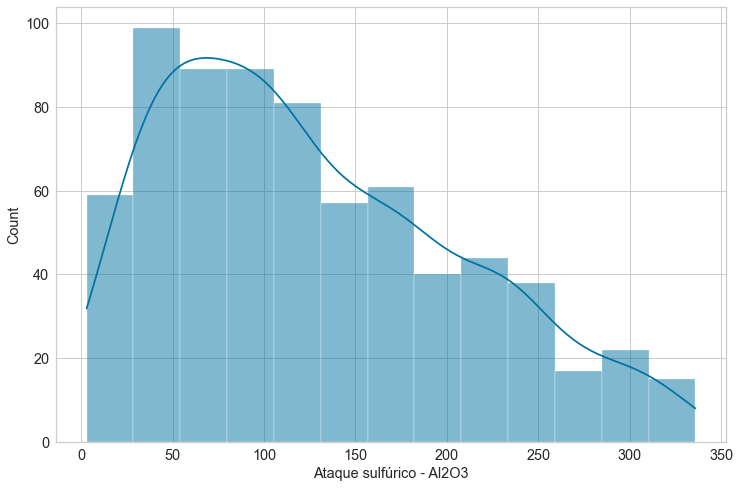

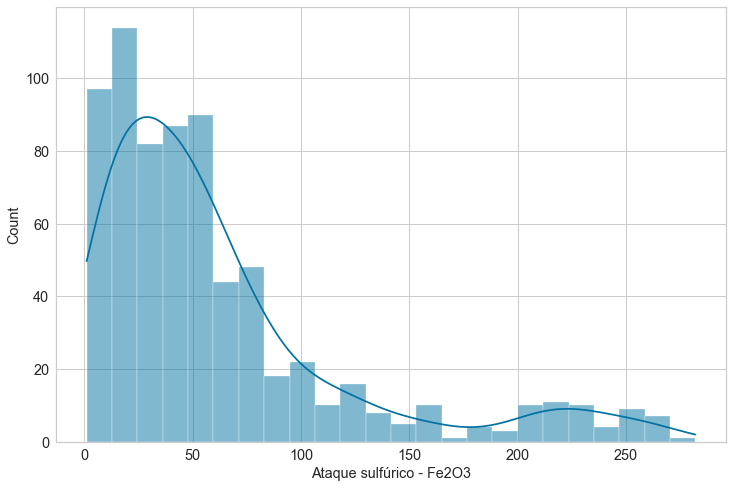

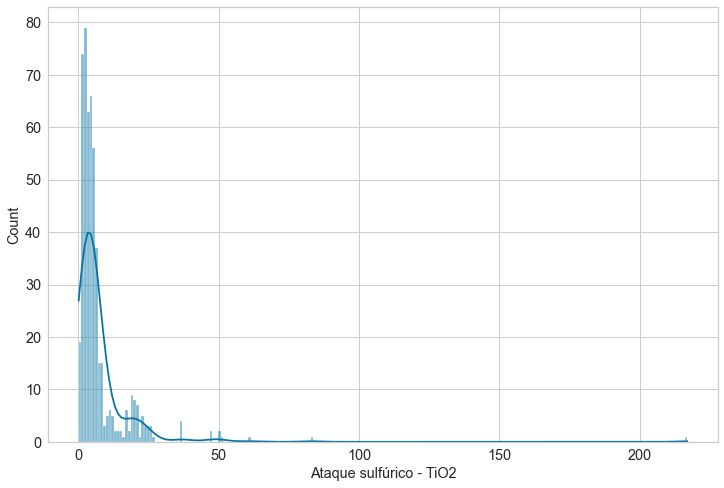

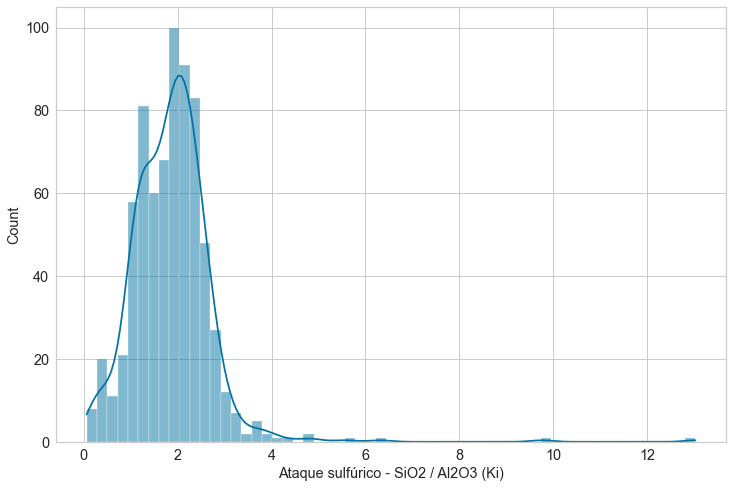

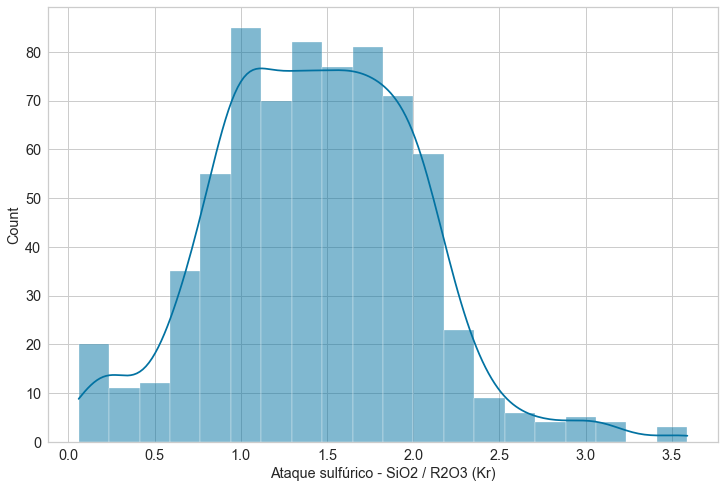

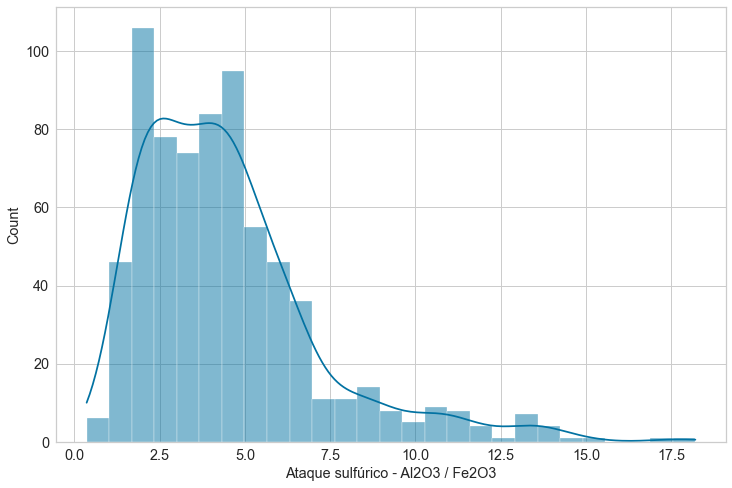

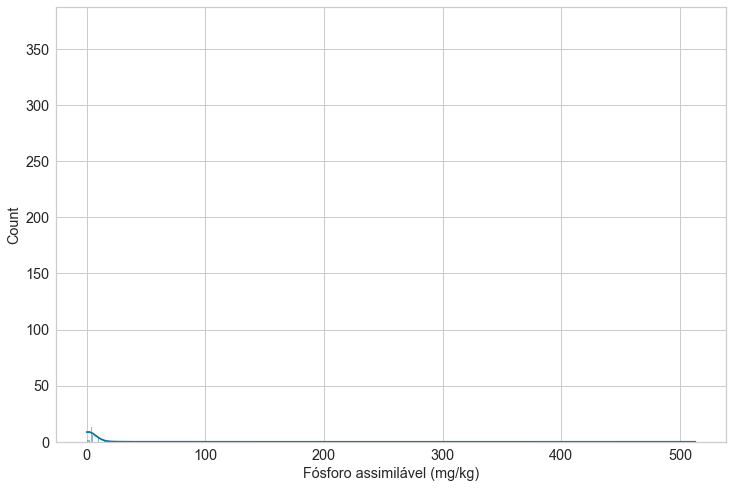

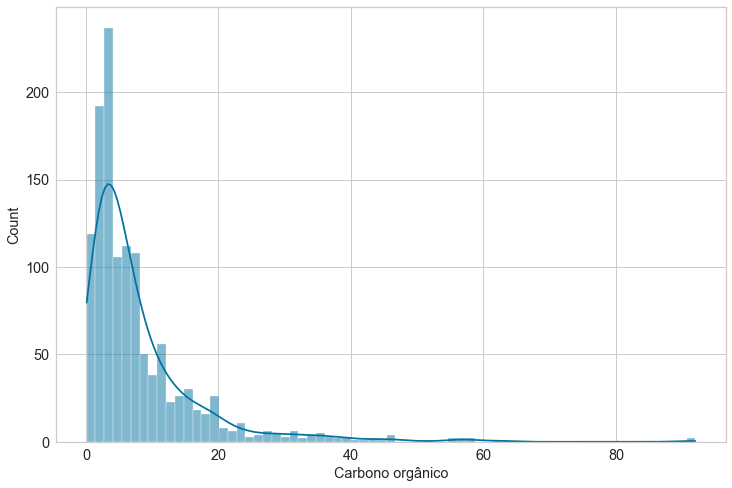

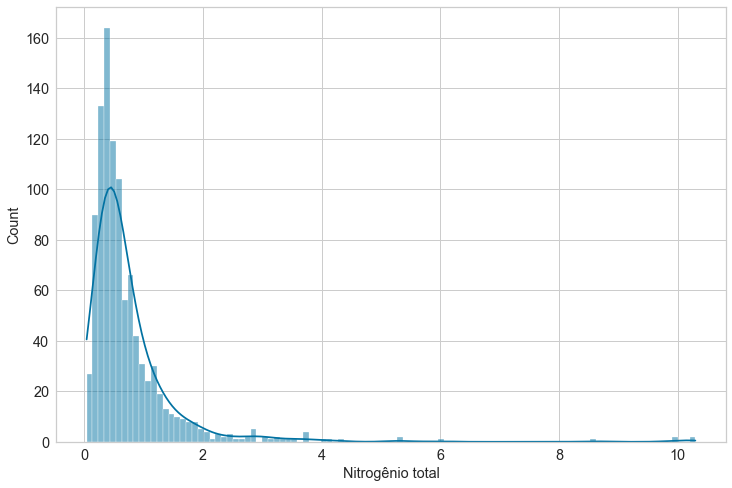

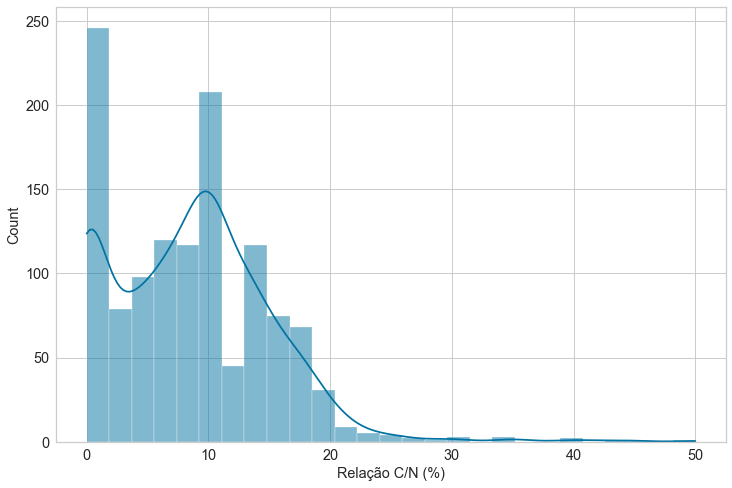

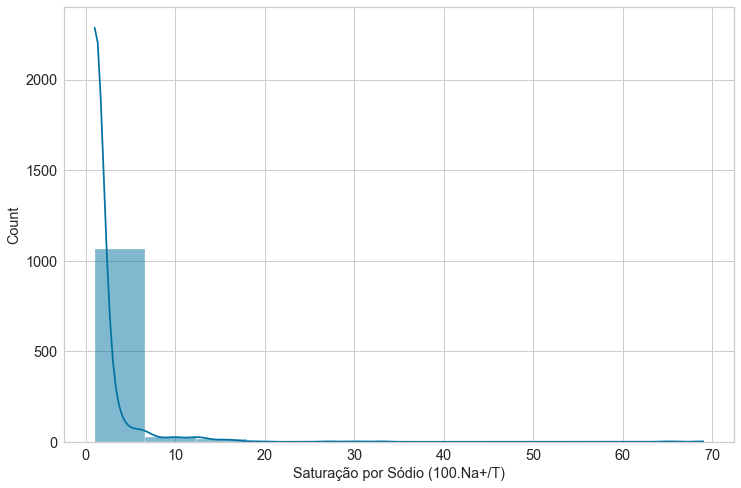

In [98]:
#Construção de histogramas das variáveis quantitativas
for var in var_quant:
  sns.histplot(data_3[var], kde=True)
  plt.show()

<AxesSubplot:>

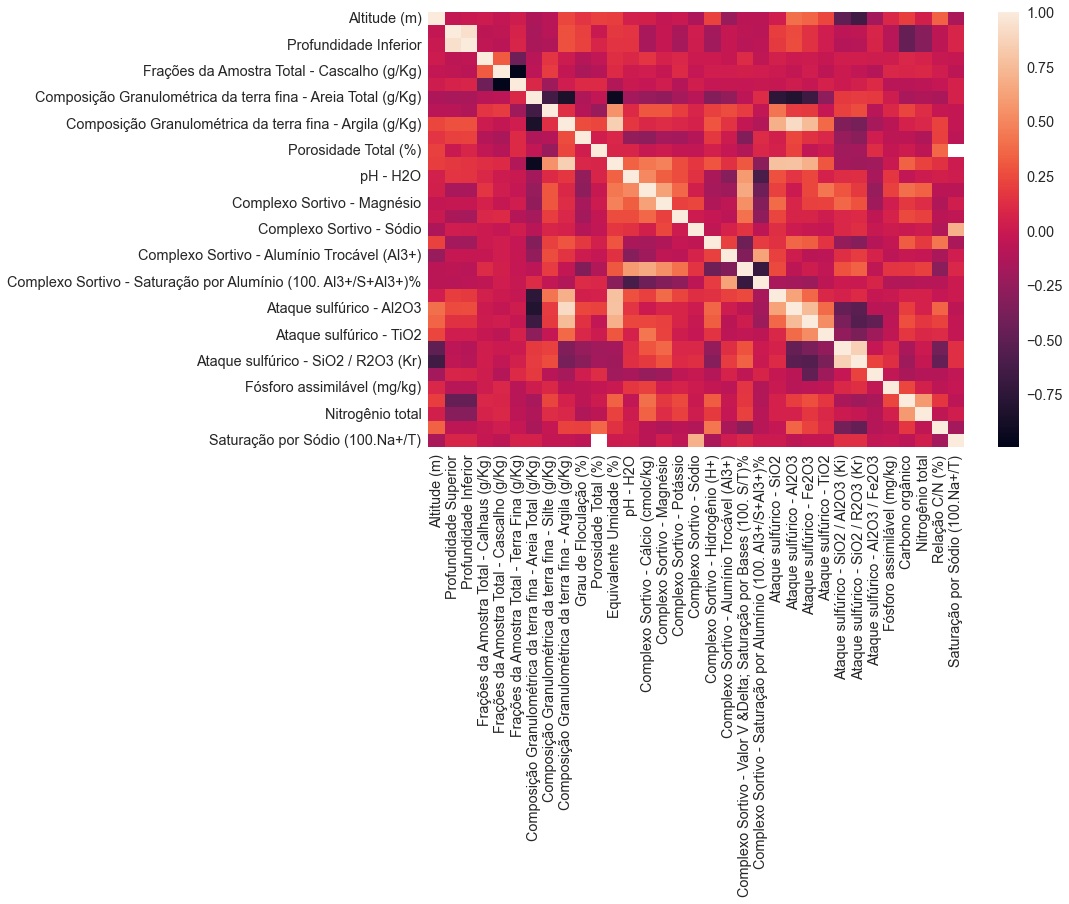

In [99]:
#Construção do heatmap
sns.heatmap(data = data_3[var_quant].corr())

In [100]:
#Construção de gráficos de barras das variáveis qualitativas
def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.xticks(rotation='vertical')
    plt.ylim(0,1)
    plt.show()

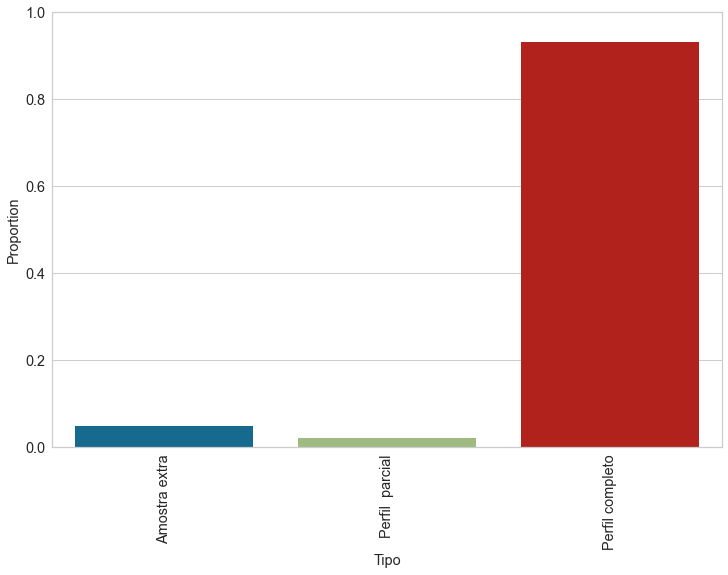

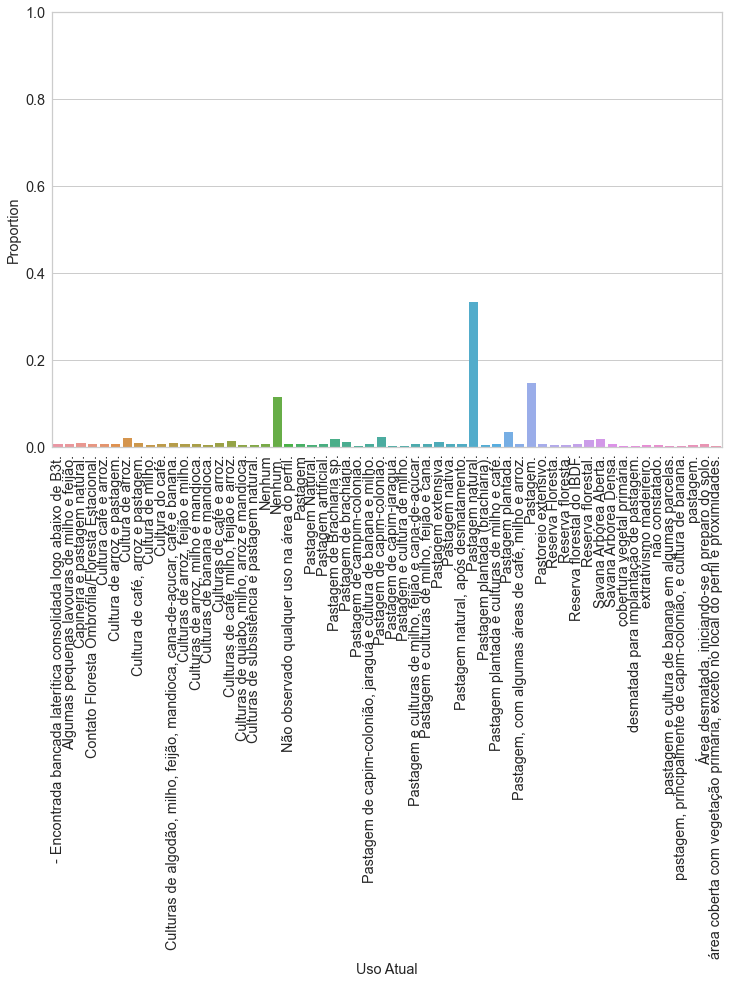

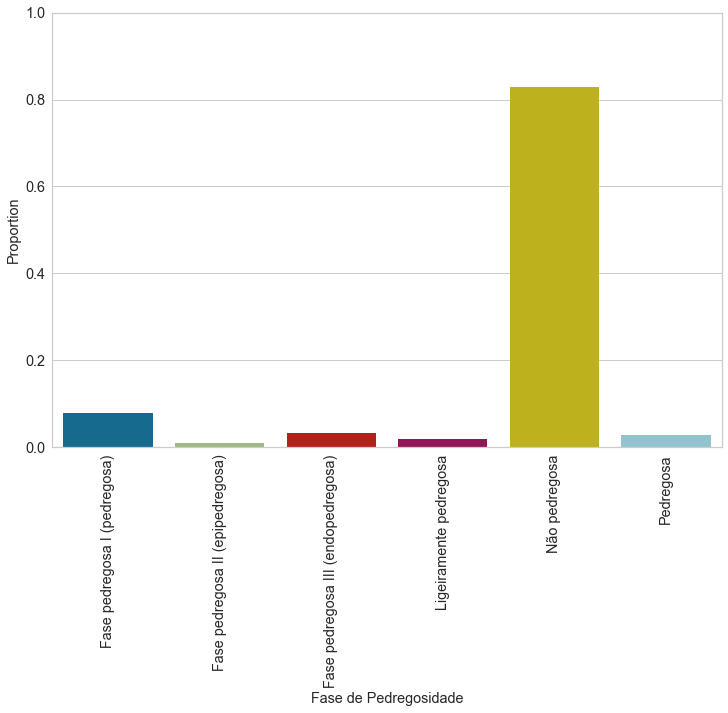

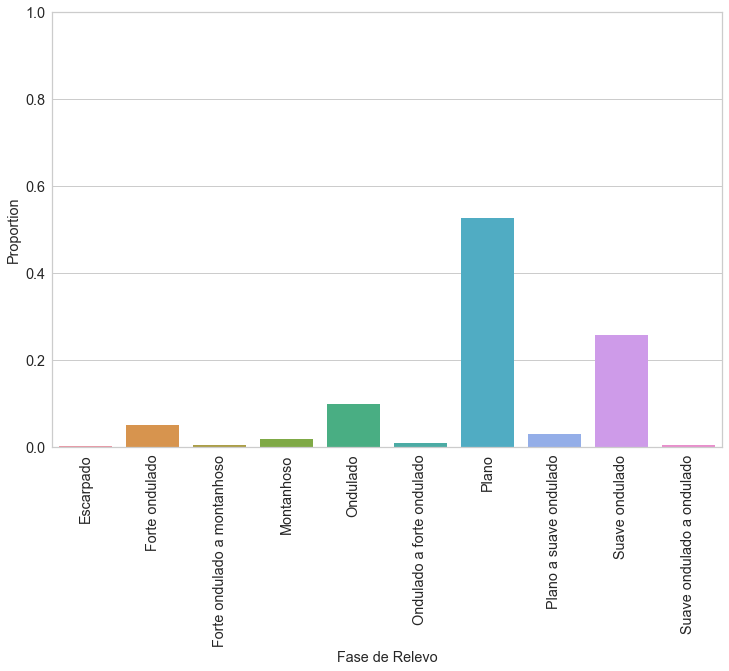

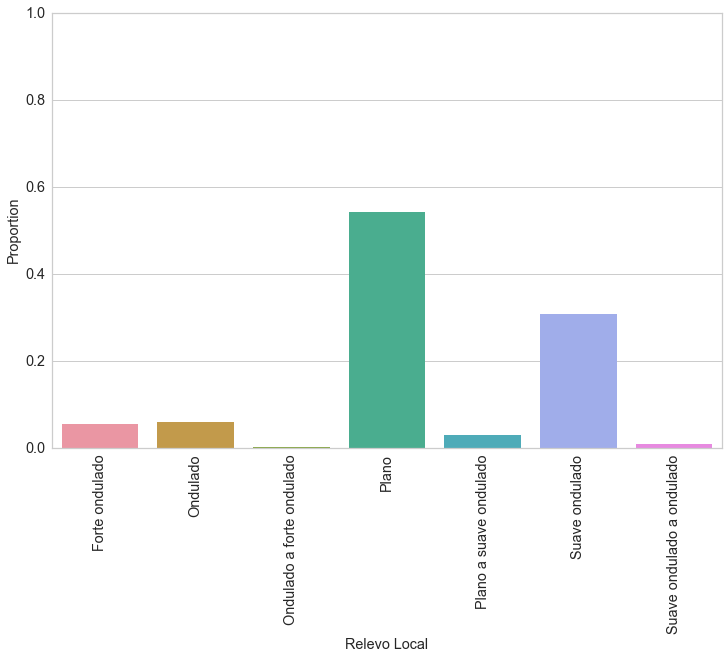

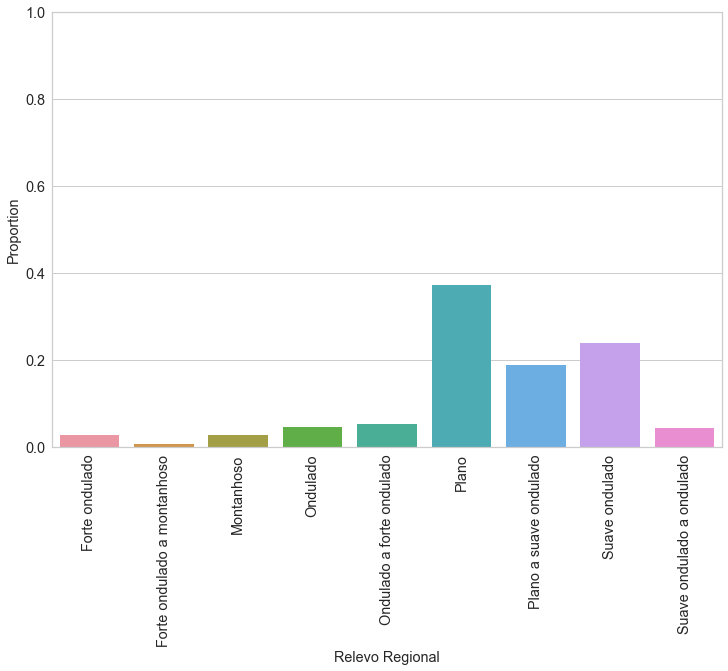

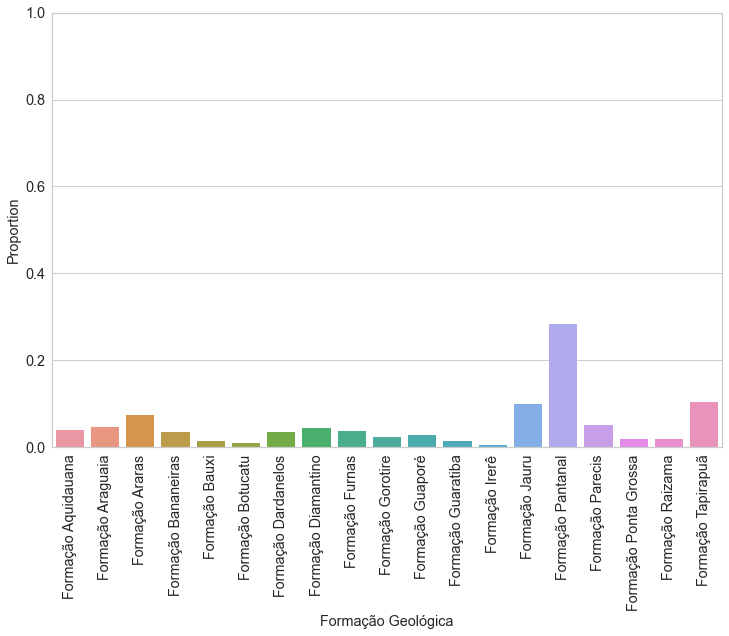

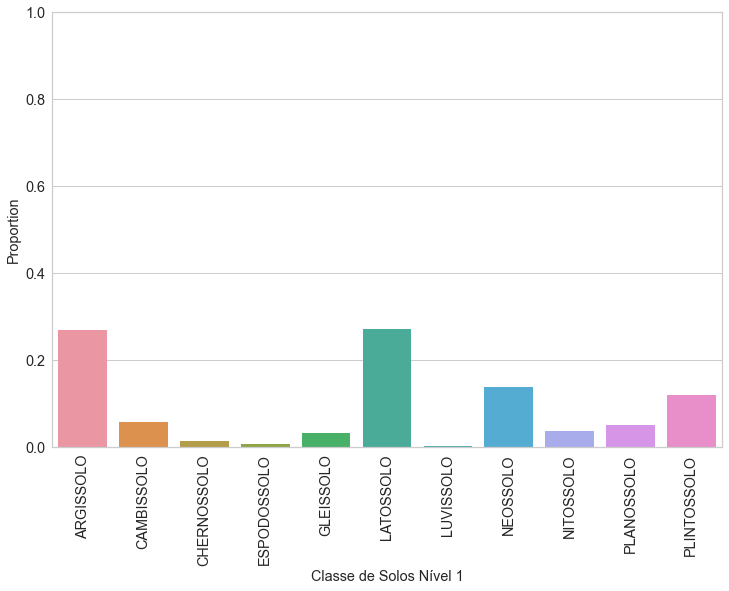

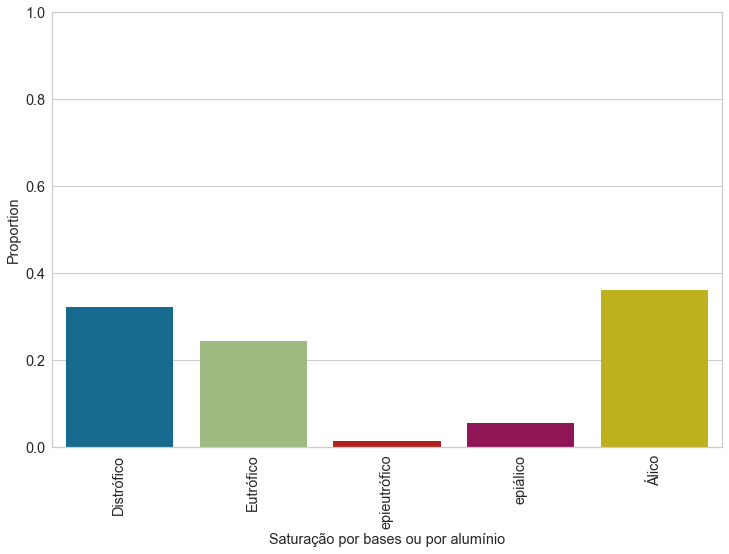

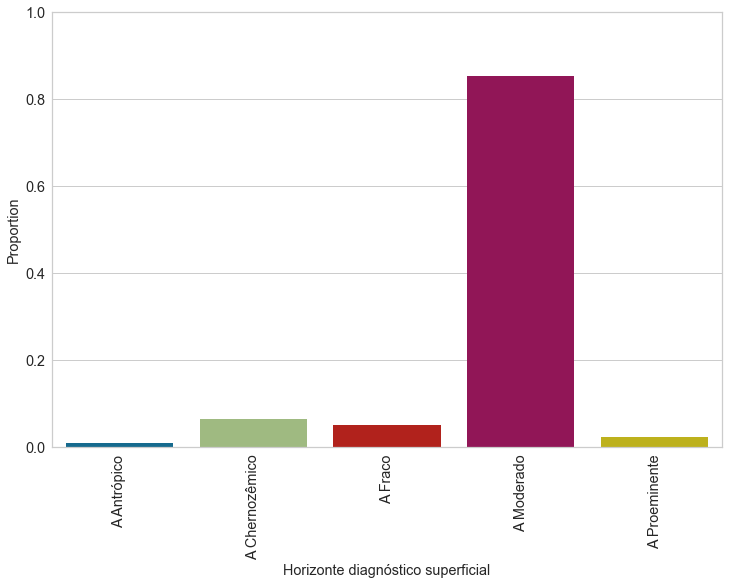

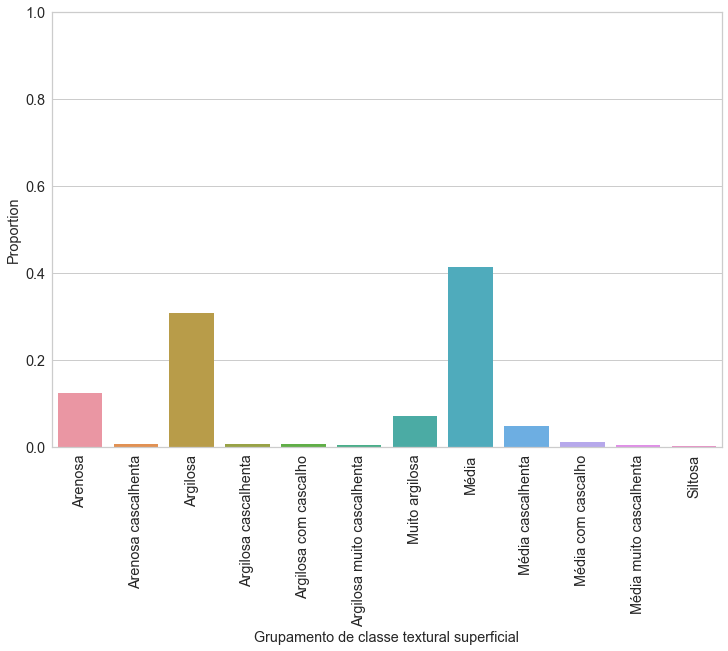

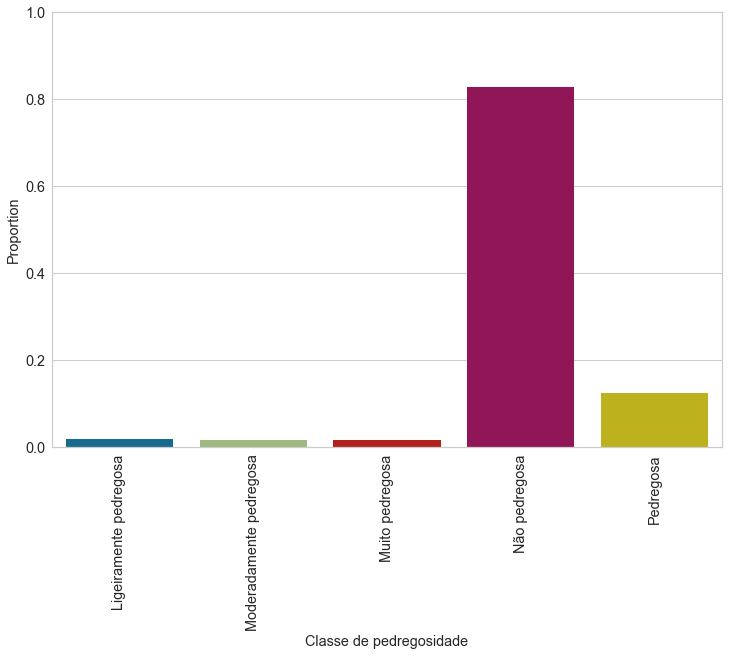

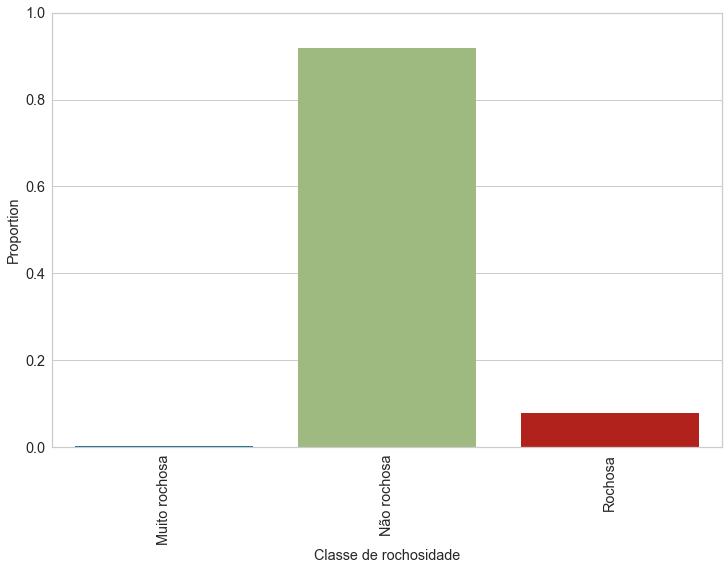

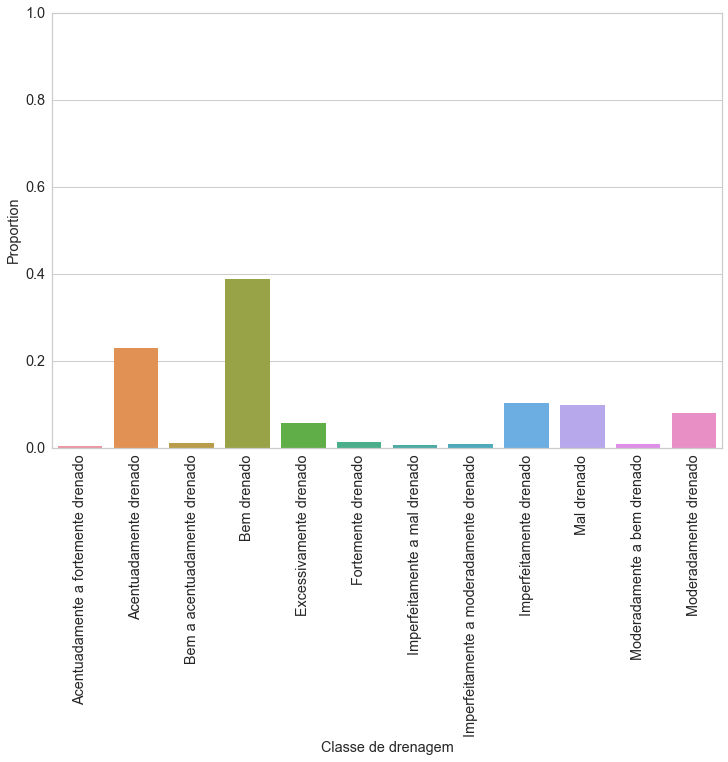

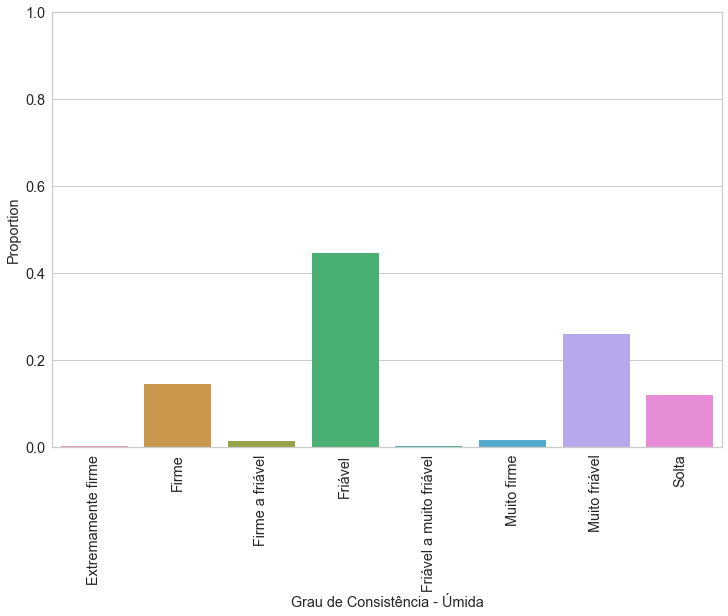

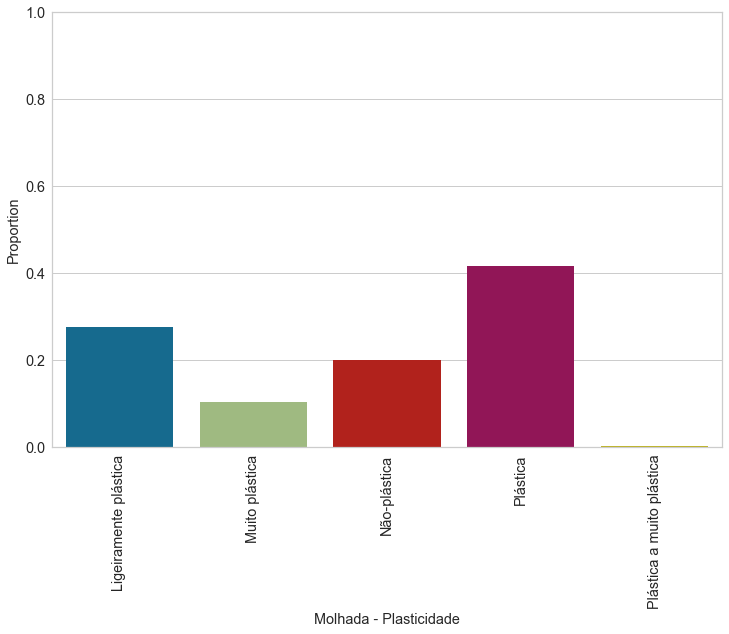

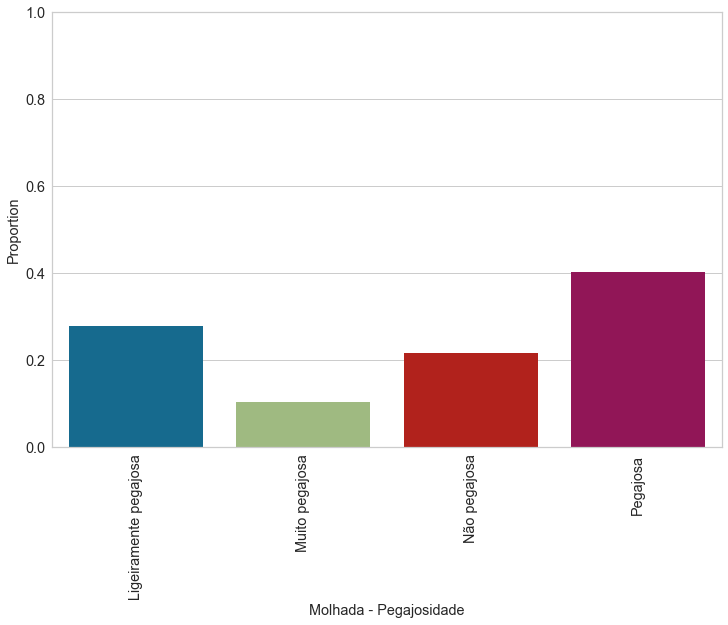

In [101]:
for var in var_quali:
  grafico_barras_prop(data_3, var)  

In [146]:
Simbol_H = data_3['Símbolo Horizonte'].value_counts()

Análise Exploratória - Agrupamento do Classe de Solo

In [102]:
from IPython.display import display

for var in var_quant:
    display(data_3[['Classe de Solos Nível 1', var]].groupby('Classe de Solos Nível 1').describe().round(1))

Altitude (m)                                     \
                               count   mean    std    min    25%    50%   
Classe de Solos Nível 1                                                   
ARGISSOLO                      224.0  314.5  121.1  150.0  220.0  290.0   
CAMBISSOLO                      46.0  433.3  117.6  240.0  350.0  450.0   
CHERNOSSOLO                     11.0  454.5  117.2  350.0  350.0  400.0   
ESPODOSSOLO                      6.0  120.0    0.0  120.0  120.0  120.0   
GLEISSOLO                        9.0  162.2   26.4  140.0  140.0  140.0   
LATOSSOLO                      246.0  433.7  161.3  120.0  307.5  440.0   
LUVISSOLO                        4.0  500.0    0.0  500.0  500.0  500.0   
NEOSSOLO                       120.0  403.5  201.3  130.0  220.0  420.0   
NITOSSOLO                       28.0  483.2   76.5  400.0  420.0  450.0   
PLANOSSOLO                      43.0  132.5   30.5   95.0  110.0  117.0   
PLINTOSSOLO                    108.0  228.6   93.9  105.0  150.0  200.0   

                                       
                           75%    max  
Classe de Solos Nível 1                
ARGISSOLO                350.0  650.0  
CAMBISSOLO               520.0  620.0  
CHERNOSSOLO              600.0  600.0  
ESPODOSSOLO              120.0  120.0  
GLEISSOLO                190.0  190.0  
LATOSSOLO                510.0  860.0  
LUVISSOLO                500.0  500.0  
NEOSSOLO                 560.0  900.0  
NITOSSOLO                540.0  600.0  
PLANOSSOLO               165.0  170.0  
PLINTOSSOLO              280.0  430.0

Profundidade Superior                               \
                                        count  mean   std  min   25%   50%   
Classe de Solos Nível 1                                                      
ARGISSOLO                               345.0  49.0  44.5  0.0  10.0  40.0   
CAMBISSOLO                               73.0  37.1  33.8  0.0  10.0  30.0   
CHERNOSSOLO                              17.0  44.1  33.8  0.0  25.0  40.0   
ESPODOSSOLO                               9.0  49.7  52.3  0.0  10.0  28.0   
GLEISSOLO                                42.0  40.4  36.9  0.0  10.0  35.0   
LATOSSOLO                               348.0  50.4  49.7  0.0  10.0  40.0   
LUVISSOLO                                 4.0  16.0  17.3  0.0   4.5  12.5   
NEOSSOLO                                178.0  38.0  41.6  0.0   0.0  25.0   
NITOSSOLO                                48.0  52.8  45.7  0.0  14.5  42.0   
PLANOSSOLO                               66.0  40.0  37.9  0.0   0.8  35.0   
PLINTOSSOLO                             152.0  49.2  44.9  0.0  10.0  40.0   

                                      
                          75%    max  
Classe de Solos Nível 1               
ARGISSOLO                80.0  210.0  
CAMBISSOLO               55.0  143.0  
CHERNOSSOLO              65.0  104.0  
ESPODOSSOLO              86.0  136.0  
GLEISSOLO                60.0  140.0  
LATOSSOLO                80.0  280.0  
LUVISSOLO                24.0   39.0  
NEOSSOLO                 60.0  185.0  
NITOSSOLO                81.8  150.0  
PLANOSSOLO               64.5  140.0  
PLINTOSSOLO              75.2  200.0

Profundidade Inferior                                \
                                        count  mean   std   min   25%   50%   
Classe de Solos Nível 1                                                       
ARGISSOLO                               345.0  76.2  56.0   0.0  30.0  60.0   
CAMBISSOLO                               73.0  59.6  41.5  10.0  30.0  50.0   
CHERNOSSOLO                              17.0  71.1  43.2  10.0  40.0  62.0   
ESPODOSSOLO                               9.0  84.1  59.7  10.0  28.0  86.0   
GLEISSOLO                                42.0  67.8  45.0  10.0  30.0  60.0   
LATOSSOLO                               348.0  83.1  67.1   0.0  29.8  64.5   
LUVISSOLO                                 4.0  25.8  16.2   6.0  15.8  29.0   
NEOSSOLO                                172.0  68.7  57.8   0.0  25.0  42.5   
NITOSSOLO                                48.0  79.8  55.2   0.0  36.2  75.0   
PLANOSSOLO                               66.0  68.2  44.9   3.0  26.8  57.5   
PLINTOSSOLO                             152.0  77.8  55.2   5.0  30.0  66.0   

                                       
                           75%    max  
Classe de Solos Nível 1                
ARGISSOLO                110.0  410.0  
CAMBISSOLO                80.0  170.0  
CHERNOSSOLO               90.0  168.0  
ESPODOSSOLO              136.0  160.0  
GLEISSOLO                100.0  160.0  
LATOSSOLO                120.0  316.0  
LUVISSOLO                 39.0   39.0  
NEOSSOLO                 102.2  300.0  
NITOSSOLO                121.2  200.0  
PLANOSSOLO               100.0  170.0  
PLINTOSSOLO              120.0  240.0

Frações da Amostra Total - Calhaus (g/Kg)              \
                                                            count  mean   std   
Classe de Solos Nível 1                                                         
ARGISSOLO                                                   249.0   2.1  14.5   
CAMBISSOLO                                                   61.0  14.0  35.6   
CHERNOSSOLO                                                   9.0  25.3  76.0   
ESPODOSSOLO                                                   9.0   0.0   0.0   
GLEISSOLO                                                    24.0   0.0   0.0   
LATOSSOLO                                                   307.0   0.0   0.0   
LUVISSOLO                                                     3.0   0.0   0.0   
NEOSSOLO                                                    114.0   4.6  35.8   
NITOSSOLO                                                    39.0   2.3  14.4   
PLANOSSOLO                                                   62.0   0.2   1.3   
PLINTOSSOLO                                                 132.0   6.7  20.9   

                                                    
                         min  25%  50%  75%    max  
Classe de Solos Nível 1                             
ARGISSOLO                0.0  0.0  0.0  0.0  150.0  
CAMBISSOLO               0.0  0.0  0.0  0.0  210.0  
CHERNOSSOLO              0.0  0.0  0.0  0.0  228.0  
ESPODOSSOLO              0.0  0.0  0.0  0.0    0.0  
GLEISSOLO                0.0  0.0  0.0  0.0    0.0  
LATOSSOLO                0.0  0.0  0.0  0.0    0.0  
LUVISSOLO                0.0  0.0  0.0  0.0    0.0  
NEOSSOLO                 0.0  0.0  0.0  0.0  370.0  
NITOSSOLO                0.0  0.0  0.0  0.0   90.0  
PLANOSSOLO               0.0  0.0  0.0  0.0   10.0  
PLINTOSSOLO              0.0  0.0  0.0  0.0  120.0

Frações da Amostra Total - Cascalho (g/Kg)         \
                                                             count   mean   
Classe de Solos Nível 1                                                     
ARGISSOLO                                                    222.0   59.0   
CAMBISSOLO                                                    60.0  123.4   
CHERNOSSOLO                                                    6.0   39.0   
ESPODOSSOLO                                                    9.0   15.6   
GLEISSOLO                                                     24.0    3.3   
LATOSSOLO                                                    281.0   11.5   
LUVISSOLO                                                      3.0    3.3   
NEOSSOLO                                                      94.0   38.7   
NITOSSOLO                                                     35.0   45.4   
PLANOSSOLO                                                    58.0    8.8   
PLINTOSSOLO                                                  131.0  186.8   

                                                              
                           std  min  25%   50%    75%    max  
Classe de Solos Nível 1                                       
ARGISSOLO                118.2  0.0  0.0  10.0   60.0  630.0  
CAMBISSOLO               196.7  0.0  0.0  36.0  169.0  867.0  
CHERNOSSOLO               95.5  0.0  0.0   0.0    0.0  234.0  
ESPODOSSOLO               16.7  0.0  0.0  10.0   30.0   40.0  
GLEISSOLO                 11.7  0.0  0.0   0.0    0.0   50.0  
LATOSSOLO                 41.5  0.0  0.0   0.0   10.0  550.0  
LUVISSOLO                  5.8  0.0  0.0   0.0    5.0   10.0  
NEOSSOLO                 119.9  0.0  0.0   0.0    2.0  720.0  
NITOSSOLO                135.6  0.0  0.0   0.0   10.0  578.0  
PLANOSSOLO                17.3  0.0  0.0   0.0   10.0  100.0  
PLINTOSSOLO              268.1  0.0  0.0  20.0  280.0  850.0

Frações da Amostra Total - Terra Fina (g/Kg)         \
                                                               count   mean   
Classe de Solos Nível 1                                                       
ARGISSOLO                                                      242.0  943.7   
CAMBISSOLO                                                      61.0  864.6   
CHERNOSSOLO                                                      6.0  923.0   
ESPODOSSOLO                                                      9.0  984.4   
GLEISSOLO                                                       24.0  996.7   
LATOSSOLO                                                      304.0  989.3   
LUVISSOLO                                                        3.0  996.7   
NEOSSOLO                                                       115.0  963.8   
NITOSSOLO                                                       39.0  956.9   
PLANOSSOLO                                                      62.0  991.6   
PLINTOSSOLO                                                    131.0  806.5   

                                                                       
                           std    min     25%     50%     75%     max  
Classe de Solos Nível 1                                                
ARGISSOLO                120.8  310.0   950.0  1000.0  1000.0  1000.0  
CAMBISSOLO               210.2   77.0   830.0   968.0  1000.0  1000.0  
CHERNOSSOLO              188.6  538.0  1000.0  1000.0  1000.0  1000.0  
ESPODOSSOLO               16.7  960.0   970.0   990.0  1000.0  1000.0  
GLEISSOLO                 11.7  950.0  1000.0  1000.0  1000.0  1000.0  
LATOSSOLO                 40.0  450.0   994.8  1000.0  1000.0  1000.0  
LUVISSOLO                  5.8  990.0   995.0  1000.0  1000.0  1000.0  
NEOSSOLO                 119.7  280.0   999.5  1000.0  1000.0  1000.0  
NITOSSOLO                131.8  422.0   990.0  1000.0  1000.0  1000.0  
PLANOSSOLO                17.2  900.0   990.0  1000.0  1000.0  1000.0  
PLINTOSSOLO              277.9  100.0   710.0   980.0  1000.0  1000.0

Composição Granulométrica da terra fina - Areia Total (g/Kg)  \
                                                                               count   
Classe de Solos Nível 1                                                                
ARGISSOLO                                                            343.0             
CAMBISSOLO                                                            70.0             
CHERNOSSOLO                                                           17.0             
ESPODOSSOLO                                                            9.0             
GLEISSOLO                                                             42.0             
LATOSSOLO                                                            347.0             
LUVISSOLO                                                              3.0             
NEOSSOLO                                                             157.0             
NITOSSOLO                                                             47.0             
PLANOSSOLO                                                            65.0             
PLINTOSSOLO                                                          148.0             

                                                                          
                          mean    std    min    25%    50%    75%    max  
Classe de Solos Nível 1                                                   
ARGISSOLO                515.5  170.5   20.0  398.5  521.0  648.0  850.0  
CAMBISSOLO               384.3  163.8   52.0  262.8  418.5  496.8  743.0  
CHERNOSSOLO              221.8   77.3   63.0  166.0  209.0  273.0  333.0  
ESPODOSSOLO              857.3   41.4  792.0  840.0  870.0  890.0  900.0  
GLEISSOLO                410.9  228.5   11.0  226.5  398.5  637.0  866.0  
LATOSSOLO                483.9  228.8   58.0  261.5  526.0  680.0  865.0  
LUVISSOLO                203.3   58.6  160.0  170.0  180.0  225.0  270.0  
NEOSSOLO                 737.4  247.1    0.0  681.0  850.0  893.0  950.0  
NITOSSOLO                240.2  137.3   40.0  134.0  249.0  344.0  581.0  
PLANOSSOLO               598.0  224.5   50.0  480.0  650.0  790.0  900.0  
PLINTOSSOLO              462.5  220.7   40.0  286.8  460.5  630.0  910.0

Composição Granulométrica da terra fina - Silte (g/Kg)  \
                                                                         count   
Classe de Solos Nível 1                                                          
ARGISSOLO                                                            343.0       
CAMBISSOLO                                                            70.0       
CHERNOSSOLO                                                           17.0       
ESPODOSSOLO                                                            9.0       
GLEISSOLO                                                             42.0       
LATOSSOLO                                                            347.0       
LUVISSOLO                                                              3.0       
NEOSSOLO                                                             157.0       
NITOSSOLO                                                             47.0       
PLANOSSOLO                                                            65.0       
PLINTOSSOLO                                                          148.0       

                                                                          
                          mean    std    min    25%    50%    75%    max  
Classe de Solos Nível 1                                                   
ARGISSOLO                180.8   92.1   20.0  117.5  157.0  220.0  535.0  
CAMBISSOLO               356.4  133.0  122.0  259.2  321.5  443.2  617.0  
CHERNOSSOLO              403.6  109.1  153.0  350.0  441.0  474.0  529.0  
ESPODOSSOLO              112.0   50.2   60.0   70.0   90.0  145.0  196.0  
GLEISSOLO                240.9   94.4   59.0  176.8  229.0  316.2  434.0  
LATOSSOLO                110.1   56.9   16.0   62.0  100.0  150.0  335.0  
LUVISSOLO                500.0   26.5  480.0  485.0  490.0  510.0  530.0  
NEOSSOLO                 139.0  171.7   10.0   34.0   60.0  180.0  790.0  
NITOSSOLO                270.2  107.0  110.0  174.5  262.0  355.5  480.0  
PLANOSSOLO               193.7  122.0   70.0  114.0  140.0  230.0  588.0  
PLINTOSSOLO              238.6  107.6   30.0  160.0  206.5  322.8  510.0

Composição Granulométrica da terra fina - Argila (g/Kg)  \
                                                                          count   
Classe de Solos Nível 1                                                           
ARGISSOLO                                                            343.0        
CAMBISSOLO                                                            70.0        
CHERNOSSOLO                                                           17.0        
ESPODOSSOLO                                                            9.0        
GLEISSOLO                                                             42.0        
LATOSSOLO                                                            347.0        
LUVISSOLO                                                              3.0        
NEOSSOLO                                                             157.0        
NITOSSOLO                                                             47.0        
PLANOSSOLO                                                            65.0        
PLINTOSSOLO                                                          148.0        

                                                                          
                          mean    std    min    25%    50%    75%    max  
Classe de Solos Nível 1                                                   
ARGISSOLO                304.0  149.1   61.0  181.0  280.0  413.5  716.0  
CAMBISSOLO               256.1   98.3   20.0  200.8  245.0  300.0  540.0  
CHERNOSSOLO              374.6  127.2  138.0  265.0  382.0  460.0  641.0  
ESPODOSSOLO               30.7   15.5    6.0   20.0   40.0   40.0   50.0  
GLEISSOLO                348.2  176.7   75.0  191.2  341.5  473.0  777.0  
LATOSSOLO                405.9  195.6   90.0  236.0  390.0  590.0  800.0  
LUVISSOLO                296.7   50.3  250.0  270.0  290.0  320.0  350.0  
NEOSSOLO                 123.6   98.0   19.0   60.0   94.0  140.0  590.0  
NITOSSOLO                489.6  117.0  160.0  427.5  493.0  556.5  730.0  
PLANOSSOLO               208.3  150.4   20.0   80.0  190.0  280.0  650.0  
PLINTOSSOLO              299.0  156.8   40.0  176.0  283.0  402.2  738.0

Grau de Floculação (%)                            \
                                         count  mean    std    min   25%   
Classe de Solos Nível 1                                                    
ARGISSOLO                                342.0  60.3   34.3    0.0  26.2   
CAMBISSOLO                                70.0  38.8  100.0 -750.0  28.0   
CHERNOSSOLO                               17.0  57.2   23.5   25.0  39.0   
ESPODOSSOLO                                9.0  63.0   12.6   50.0  50.0   
GLEISSOLO                                 42.0  70.0   25.7    5.0  53.2   
LATOSSOLO                                346.0  76.0   26.8    3.0  59.2   
LUVISSOLO                                  3.0   0.0    0.0    0.0   0.0   
NEOSSOLO                                 156.0  51.5   27.9    0.0  25.0   
NITOSSOLO                                 41.0  75.2   35.4    0.0  75.0   
PLANOSSOLO                                64.0  38.4   34.1    0.0  11.5   
PLINTOSSOLO                              146.0  57.0   35.0    0.0  22.0   

                                            
                          50%   75%    max  
Classe de Solos Nível 1                     
ARGISSOLO                68.5  94.0  100.0  
CAMBISSOLO               50.0  75.0   96.0  
CHERNOSSOLO              56.0  70.0   99.0  
ESPODOSSOLO              60.0  75.0   83.0  
GLEISSOLO                66.5  94.8   98.0  
LATOSSOLO                87.0  97.0  100.0  
LUVISSOLO                 0.0   0.0    0.0  
NEOSSOLO                 50.0  77.2  100.0  
NITOSSOLO                94.0  99.0  100.0  
PLANOSSOLO               25.0  61.8  100.0  
PLINTOSSOLO              68.5  90.0  100.0

Porosidade Total (%)                                  \
                                       count  mean   std  min  25%  50%  75%   
Classe de Solos Nível 1                                                        
ARGISSOLO                              160.0   2.7  10.5  0.0  0.0  0.0  0.0   
CAMBISSOLO                              31.0   0.0   0.0  0.0  0.0  0.0  0.0   
CHERNOSSOLO                             17.0   0.0   0.0  0.0  0.0  0.0  0.0   
ESPODOSSOLO                              0.0   NaN   NaN  NaN  NaN  NaN  NaN   
GLEISSOLO                               29.0   0.0   0.0  0.0  0.0  0.0  0.0   
LATOSSOLO                              188.0  12.4  23.6  0.0  0.0  0.0  0.0   
LUVISSOLO                                3.0   0.0   0.0  0.0  0.0  0.0  0.0   
NEOSSOLO                                67.0   0.0   0.0  0.0  0.0  0.0  0.0   
NITOSSOLO                               11.0   0.0   0.0  0.0  0.0  0.0  0.0   
PLANOSSOLO                              36.0   0.0   0.0  0.0  0.0  0.0  0.0   
PLINTOSSOLO                             90.0   0.0   0.0  0.0  0.0  0.0  0.0   

                               
                          max  
Classe de Solos Nível 1        
ARGISSOLO                47.0  
CAMBISSOLO                0.0  
CHERNOSSOLO               0.0  
ESPODOSSOLO               NaN  
GLEISSOLO                 0.0  
LATOSSOLO                67.0  
LUVISSOLO                 0.0  
NEOSSOLO                  0.0  
NITOSSOLO                 0.0  
PLANOSSOLO                0.0  
PLINTOSSOLO               0.0

Equivalente Umidade (%)                               \
                                          count  mean  std   min   25%   50%   
Classe de Solos Nível 1                                                        
ARGISSOLO                                 149.0  18.2  6.7   5.6  12.7  17.7   
CAMBISSOLO                                 18.0  22.0  4.8  10.4  20.7  22.6   
CHERNOSSOLO                                 3.0  25.3  2.1  23.0  24.5  26.0   
ESPODOSSOLO                                 6.0   2.8  0.6   1.9   2.5   3.0   
GLEISSOLO                                   5.0  18.6  4.0  13.0  18.0  18.0   
LATOSSOLO                                 142.0  18.8  8.5   6.0  12.0  17.0   
LUVISSOLO                                   3.0  20.7  1.9  18.8  19.8  20.7   
NEOSSOLO                                   69.0   7.9  7.6   1.0   4.0   5.0   
NITOSSOLO                                  17.0  36.0  8.0  23.5  29.6  34.6   
PLANOSSOLO                                 51.0  13.4  7.9   2.0   6.0  15.0   
PLINTOSSOLO                                77.0  19.8  8.1   4.2  13.0  20.5   

                                     
                          75%   max  
Classe de Solos Nível 1              
ARGISSOLO                24.1  32.5  
CAMBISSOLO               25.5  29.8  
CHERNOSSOLO              26.5  27.0  
ESPODOSSOLO               3.2   3.6  
GLEISSOLO                20.0  24.0  
LATOSSOLO                26.0  38.5  
LUVISSOLO                21.6  22.5  
NEOSSOLO                  7.8  34.0  
NITOSSOLO                43.0  47.7  
PLANOSSOLO               18.0  34.0  
PLINTOSSOLO              27.0  35.0

pH - H2O                                   
                           count mean  std  min  25%  50%  75%  max
Classe de Solos Nível 1                                            
ARGISSOLO                  343.0  5.6  0.8  3.8  5.1  5.5  6.1  7.8
CAMBISSOLO                  71.0  5.5  1.1  1.5  5.0  5.5  5.8  7.8
CHERNOSSOLO                 17.0  6.2  0.7  4.9  5.9  6.4  6.8  7.2
ESPODOSSOLO                  9.0  5.3  0.6  3.9  5.2  5.2  5.6  5.9
GLEISSOLO                   42.0  4.7  0.6  3.5  4.1  4.7  5.1  5.8
LATOSSOLO                  346.0  5.3  0.7  3.6  4.9  5.3  5.6  7.4
LUVISSOLO                    3.0  6.0  0.3  5.8  5.8  5.9  6.2  6.4
NEOSSOLO                   157.0  5.0  0.7  3.7  4.6  4.9  5.3  7.4
NITOSSOLO                   47.0  6.1  0.5  5.2  5.7  6.0  6.4  7.4
PLANOSSOLO                  65.0  5.9  1.2  4.1  5.2  5.5  6.5  9.1
PLINTOSSOLO                152.0  5.2  0.6  3.7  4.8  5.3  5.6  6.7

Complexo Sortivo - Cálcio (cmolc/kg)                  \
                                                       count  mean  std  min   
Classe de Solos Nível 1                                                        
ARGISSOLO                                              327.0   2.3  2.9  0.0   
CAMBISSOLO                                              71.0   2.4  4.0  0.1   
CHERNOSSOLO                                             17.0  16.7  5.9  6.8   
ESPODOSSOLO                                              3.0   0.3  0.2  0.1   
GLEISSOLO                                               42.0   0.4  0.5  0.0   
LATOSSOLO                                              238.0   1.0  2.4  0.1   
LUVISSOLO                                                3.0   5.1  1.6  4.0   
NEOSSOLO                                               105.0   1.4  3.1  0.0   
NITOSSOLO                                               47.0   5.1  5.4  0.2   
PLANOSSOLO                                              36.0   2.5  2.0  0.1   
PLINTOSSOLO                                            107.0   1.0  1.3  0.0   

                                                 
                          25%   50%   75%   max  
Classe de Solos Nível 1                          
ARGISSOLO                 0.4   1.4   3.1  20.2  
CAMBISSOLO                0.2   0.4   2.3  19.9  
CHERNOSSOLO              11.4  16.5  20.4  27.5  
ESPODOSSOLO               0.1   0.2   0.3   0.5  
GLEISSOLO                 0.1   0.2   0.5   1.8  
LATOSSOLO                 0.2   0.3   0.6  19.2  
LUVISSOLO                 4.2   4.4   5.7   7.0  
NEOSSOLO                  0.2   0.3   1.0  19.7  
NITOSSOLO                 1.0   3.7   7.2  25.7  
PLANOSSOLO                1.0   1.5   4.1   6.7  
PLINTOSSOLO               0.2   0.3   1.3   7.6

Complexo Sortivo - Magnésio                           \
                                              count mean  std  min  25%  50%   
Classe de Solos Nível 1                                                        
ARGISSOLO                                     327.0  0.7  0.9  0.0  0.2  0.4   
CAMBISSOLO                                     67.0  0.4  0.6  0.0  0.1  0.1   
CHERNOSSOLO                                    17.0  7.2  3.9  1.6  4.5  6.2   
ESPODOSSOLO                                     3.0  0.1  0.0  0.1  0.1  0.1   
GLEISSOLO                                      42.0  0.2  0.2  0.0  0.1  0.1   
LATOSSOLO                                     238.0  0.2  0.4  0.0  0.0  0.1   
LUVISSOLO                                       3.0  2.2  0.5  1.7  1.9  2.1   
NEOSSOLO                                      105.0  0.4  0.8  0.0  0.1  0.1   
NITOSSOLO                                      47.0  1.5  1.6  0.0  0.3  1.0   
PLANOSSOLO                                     36.0  1.8  2.2  0.0  0.2  0.8   
PLINTOSSOLO                                   107.0  0.8  1.2  0.0  0.1  0.3   

                                    
                         75%   max  
Classe de Solos Nível 1             
ARGISSOLO                0.9   7.8  
CAMBISSOLO               0.7   4.0  
CHERNOSSOLO              8.9  16.5  
ESPODOSSOLO              0.1   0.1  
GLEISSOLO                0.2   0.6  
LATOSSOLO                0.2   2.7  
LUVISSOLO                2.4   2.7  
NEOSSOLO                 0.3   5.5  
NITOSSOLO                2.3   6.0  
PLANOSSOLO               3.0   8.3  
PLINTOSSOLO              0.8   6.0

Complexo Sortivo - Potássio                           \
                                              count mean  std  min  25%  50%   
Classe de Solos Nível 1                                                        
ARGISSOLO                                     338.0  0.2  0.2  0.0  0.0  0.1   
CAMBISSOLO                                     71.0  0.2  0.2  0.0  0.1  0.1   
CHERNOSSOLO                                    17.0  0.3  0.2  0.1  0.2  0.3   
ESPODOSSOLO                                     9.0  0.0  0.0  0.0  0.0  0.0   
GLEISSOLO                                      42.0  0.1  0.1  0.0  0.0  0.1   
LATOSSOLO                                     346.0  0.1  0.1  0.0  0.0  0.0   
LUVISSOLO                                       3.0  0.1  0.0  0.1  0.1  0.1   
NEOSSOLO                                      157.0  0.1  0.1  0.0  0.0  0.0   
NITOSSOLO                                      47.0  0.2  0.2  0.0  0.0  0.1   
PLANOSSOLO                                     65.0  0.1  0.1  0.0  0.0  0.1   
PLINTOSSOLO                                   152.0  0.1  0.5  0.0  0.0  0.1   

                                   
                         75%  max  
Classe de Solos Nível 1            
ARGISSOLO                0.3  2.7  
CAMBISSOLO               0.2  1.0  
CHERNOSSOLO              0.4  0.6  
ESPODOSSOLO              0.0  0.1  
GLEISSOLO                0.1  0.3  
LATOSSOLO                0.1  0.8  
LUVISSOLO                0.1  0.1  
NEOSSOLO                 0.1  0.9  
NITOSSOLO                0.2  0.9  
PLANOSSOLO               0.1  0.4  
PLINTOSSOLO              0.1  6.0

Complexo Sortivo - Sódio                           \
                                           count mean  std  min  25%  50%   
Classe de Solos Nível 1                                                     
ARGISSOLO                                  337.0  0.0  0.1  0.0  0.0  0.0   
CAMBISSOLO                                  71.0  0.0  0.1  0.0  0.0  0.0   
CHERNOSSOLO                                 17.0  0.1  0.1  0.0  0.0  0.1   
ESPODOSSOLO                                  9.0  0.0  0.0  0.0  0.0  0.0   
GLEISSOLO                                   42.0  0.2  0.3  0.0  0.0  0.1   
LATOSSOLO                                  346.0  0.0  0.0  0.0  0.0  0.0   
LUVISSOLO                                    3.0  0.0  0.0  0.0  0.0  0.0   
NEOSSOLO                                   157.0  0.0  0.1  0.0  0.0  0.0   
NITOSSOLO                                   47.0  0.0  0.0  0.0  0.0  0.0   
PLANOSSOLO                                  65.0  0.3  0.9  0.0  0.0  0.1   
PLINTOSSOLO                                152.0  0.1  0.1  0.0  0.0  0.0   

                                   
                         75%  max  
Classe de Solos Nível 1            
ARGISSOLO                0.0  0.4  
CAMBISSOLO               0.0  0.3  
CHERNOSSOLO              0.1  0.5  
ESPODOSSOLO              0.0  0.0  
GLEISSOLO                0.2  2.0  
LATOSSOLO                0.0  0.5  
LUVISSOLO                0.1  0.1  
NEOSSOLO                 0.0  0.4  
NITOSSOLO                0.1  0.1  
PLANOSSOLO               0.2  5.7  
PLINTOSSOLO              0.1  1.4

Complexo Sortivo - Hidrogênio (H+)                 \
                                                     count mean  std  min   
Classe de Solos Nível 1                                                     
ARGISSOLO                                            343.0  1.8  1.7  0.0   
CAMBISSOLO                                            71.0  3.0  2.6  0.0   
CHERNOSSOLO                                           17.0  1.3  3.6  0.0   
ESPODOSSOLO                                            9.0  1.3  2.8  0.1   
GLEISSOLO                                             42.0  4.2  4.4  0.2   
LATOSSOLO                                            327.0  3.3  2.6  0.0   
LUVISSOLO                                              3.0  2.2  0.6  1.5   
NEOSSOLO                                             157.0  1.8  2.6  0.0   
NITOSSOLO                                             47.0  3.5  2.3  0.4   
PLANOSSOLO                                            65.0  1.8  1.6  0.0   
PLINTOSSOLO                                          152.0  2.9  2.8  0.1   

                                              
                         25%  50%  75%   max  
Classe de Solos Nível 1                       
ARGISSOLO                0.4  1.4  2.4  12.3  
CAMBISSOLO               0.9  2.4  4.7  15.4  
CHERNOSSOLO              0.1  0.2  0.4  15.0  
ESPODOSSOLO              0.2  0.3  0.8   8.7  
GLEISSOLO                0.4  2.1  9.0  14.5  
LATOSSOLO                1.6  2.8  4.4  18.5  
LUVISSOLO                2.0  2.4  2.6   2.7  
NEOSSOLO                 0.4  1.0  2.1  19.4  
NITOSSOLO                2.0  3.0  4.4  11.2  
PLANOSSOLO               0.6  1.6  2.4   6.9  
PLINTOSSOLO              1.3  2.0  3.3  14.9

Complexo Sortivo - Alumínio Trocável (Al3+)            \
                                                              count mean  std   
Classe de Solos Nível 1                                                         
ARGISSOLO                                                     343.0  0.3  0.6   
CAMBISSOLO                                                     71.0  0.9  1.0   
CHERNOSSOLO                                                    17.0  0.2  0.5   
ESPODOSSOLO                                                     9.0  0.4  0.4   
GLEISSOLO                                                      42.0  2.4  1.7   
LATOSSOLO                                                     346.0  0.4  0.5   
LUVISSOLO                                                       3.0  0.3  0.3   
NEOSSOLO                                                      157.0  0.8  1.3   
NITOSSOLO                                                      47.0  0.0  0.1   
PLANOSSOLO                                                     65.0  1.2  1.9   
PLINTOSSOLO                                                   152.0  1.5  1.5   

                                                   
                         min  25%  50%  75%   max  
Classe de Solos Nível 1                            
ARGISSOLO                0.0  0.0  0.1  0.4   5.5  
CAMBISSOLO               0.0  0.0  0.6  1.7   3.2  
CHERNOSSOLO              0.0  0.0  0.0  0.0   1.8  
ESPODOSSOLO              0.0  0.0  0.1  0.8   1.0  
GLEISSOLO                0.1  1.0  2.3  3.2   6.0  
LATOSSOLO                0.0  0.0  0.3  0.6   4.2  
LUVISSOLO                0.0  0.2  0.3  0.4   0.5  
NEOSSOLO                 0.0  0.2  0.4  0.8  10.4  
NITOSSOLO                0.0  0.0  0.0  0.0   0.5  
PLANOSSOLO               0.0  0.0  0.3  1.6  10.0  
PLINTOSSOLO              0.0  0.4  1.0  1.9   7.3

Complexo Sortivo - Valor V &Delta; Saturação por Bases (100. S/T)%  \
                                                                                     count   
Classe de Solos Nível 1                                                                      
ARGISSOLO                                                            342.0                   
CAMBISSOLO                                                            71.0                   
CHERNOSSOLO                                                           17.0                   
ESPODOSSOLO                                                            9.0                   
GLEISSOLO                                                             42.0                   
LATOSSOLO                                                            327.0                   
LUVISSOLO                                                              3.0                   
NEOSSOLO                                                             157.0                   
NITOSSOLO                                                             47.0                   
PLANOSSOLO                                                            65.0                   
PLINTOSSOLO                                                          152.0                   

                                                                     
                         mean   std   min   25%   50%    75%    max  
Classe de Solos Nível 1                                              
ARGISSOLO                53.5  30.2   3.0  23.0  53.5   82.0  100.0  
CAMBISSOLO               36.1  36.2   4.0   8.0  12.0   70.5  100.0  
CHERNOSSOLO              97.2   4.3  84.0  96.0  99.0  100.0  100.0  
ESPODOSSOLO              24.8  12.0   7.0  20.0  25.0   28.0   50.0  
GLEISSOLO                15.0  15.1   3.0   4.0  10.0   17.8   73.0  
LATOSSOLO                19.0  20.9   2.0   7.0  10.0   22.5  100.0  
LUVISSOLO                74.0  11.4  66.0  67.5  69.0   78.0   87.0  
NEOSSOLO                 27.8  25.3   2.0   8.0  19.0   38.0   99.0  
NITOSSOLO                56.4  30.7   3.0  27.0  66.0   85.5   94.0  
PLANOSSOLO               41.9  36.6   3.0  10.0  26.0   82.0  100.0  
PLINTOSSOLO              25.3  22.6   3.0   8.8  17.0   38.2   98.0

Complexo Sortivo - Saturação por Alumínio (100. Al3+/S+Al3+)%  \
                                                                                count   
Classe de Solos Nível 1                                                                 
ARGISSOLO                                                            343.0              
CAMBISSOLO                                                            71.0              
CHERNOSSOLO                                                           17.0              
ESPODOSSOLO                                                            9.0              
GLEISSOLO                                                             42.0              
LATOSSOLO                                                            346.0              
LUVISSOLO                                                              3.0              
NEOSSOLO                                                             157.0              
NITOSSOLO                                                             47.0              
PLANOSSOLO                                                            65.0              
PLINTOSSOLO                                                          152.0              

                                                                   
                         mean   std  min   25%   50%   75%    max  
Classe de Solos Nível 1                                            
ARGISSOLO                18.2  24.8  0.0   0.0   3.0  33.5   97.0  
CAMBISSOLO               39.2  34.8  0.0   0.0  40.0  72.0   93.0  
CHERNOSSOLO               0.5   1.5  0.0   0.0   0.0   0.0    5.0  
ESPODOSSOLO              37.9  33.7  0.0   0.0  50.0  67.0   73.0  
GLEISSOLO                71.5  24.0  4.0  68.5  81.5  87.5   96.0  
LATOSSOLO                35.8  29.7  0.0   0.0  36.0  63.0  100.0  
LUVISSOLO                 4.0   3.6  0.0   2.5   5.0   6.0    7.0  
NEOSSOLO                 50.0  30.3  0.0  20.0  58.0  75.0   95.0  
NITOSSOLO                 1.1   2.7  0.0   0.0   0.0   0.0   10.0  
PLANOSSOLO               39.8  36.8  0.0   0.0  41.0  77.0   95.0  
PLINTOSSOLO              52.3  30.0  0.0  33.0  59.5  75.2   95.0

Ataque sulfúrico - SiO2                              \
                                          count   mean    std    min    25%   
Classe de Solos Nível 1                                                       
ARGISSOLO                                 174.0  137.0   67.4    5.4   79.3   
CAMBISSOLO                                 27.0  148.0   56.7   36.1  108.1   
CHERNOSSOLO                                 3.0  172.3   47.6  118.0  155.0   
ESPODOSSOLO                                 6.0   17.3    2.4   13.0   17.0   
GLEISSOLO                                   5.0  145.4   41.0  104.0  107.0   
LATOSSOLO                                 265.0  116.1   54.5    4.0   69.0   
LUVISSOLO                                   3.0  192.3   15.9  174.0  187.0   
NEOSSOLO                                   69.0   49.5   51.7    8.0   19.0   
NITOSSOLO                                  27.0  196.9  121.5   31.3  117.4   
PLANOSSOLO                                 38.0  108.5   67.3   11.0   68.5   
PLINTOSSOLO                                93.0  128.3   72.4   17.0   60.0   

                                              
                           50%    75%    max  
Classe de Solos Nível 1                       
ARGISSOLO                128.0  180.8  314.0  
CAMBISSOLO               142.5  187.5  274.0  
CHERNOSSOLO              192.0  199.5  207.0  
ESPODOSSOLO               17.5   18.8   20.0  
GLEISSOLO                149.0  166.0  201.0  
LATOSSOLO                109.0  156.1  277.0  
LUVISSOLO                200.0  201.5  203.0  
NEOSSOLO                  32.0   54.0  233.0  
NITOSSOLO                174.0  244.5  546.0  
PLANOSSOLO                99.5  119.2  299.0  
PLINTOSSOLO              117.0  188.0  291.0

Ataque sulfúrico - Al2O3                             \
                                           count   mean   std    min    25%   
Classe de Solos Nível 1                                                       
ARGISSOLO                                  174.0  120.6  62.8    4.1   73.5   
CAMBISSOLO                                  27.0  127.1  49.2   54.0   91.4   
CHERNOSSOLO                                  3.0  150.0  45.0   99.0  133.0   
ESPODOSSOLO                                  6.0    6.2   2.3    3.0    4.5   
GLEISSOLO                                    5.0  109.6  39.7   64.0   83.0   
LATOSSOLO                                  266.0  163.1  86.9   18.6   89.2   
LUVISSOLO                                    3.0  103.7   3.8  101.0  101.5   
NEOSSOLO                                    69.0   48.6  41.9    3.0   24.0   
NITOSSOLO                                   27.0  214.1  73.1   24.5  167.5   
PLANOSSOLO                                  38.0   70.7  49.6    3.0   39.8   
PLINTOSSOLO                                 93.0  101.2  54.7    9.0   51.0   

                                              
                           50%    75%    max  
Classe de Solos Nível 1                       
ARGISSOLO                105.5  165.5  249.9  
CAMBISSOLO               117.0  160.2  222.8  
CHERNOSSOLO              167.0  175.5  184.0  
ESPODOSSOLO                6.5    7.8    9.0  
GLEISSOLO                109.0  125.0  167.0  
LATOSSOLO                153.0  237.7  336.0  
LUVISSOLO                102.0  105.0  108.0  
NEOSSOLO                  33.0   53.0  224.0  
NITOSSOLO                236.0  241.5  328.8  
PLANOSSOLO                63.5   84.8  220.0  
PLINTOSSOLO               95.0  145.0  224.4

Ataque sulfúrico - Fe2O3                             \
                                           count   mean   std    min    25%   
Classe de Solos Nível 1                                                       
ARGISSOLO                                  174.0   48.7  35.9    1.0   22.1   
CAMBISSOLO                                  27.0   59.2  45.2   19.0   35.5   
CHERNOSSOLO                                  3.0   50.0  10.6   38.0   46.0   
ESPODOSSOLO                                  6.0    6.5   1.2    5.0    5.5   
GLEISSOLO                                    5.0   20.8   5.9   14.0   17.0   
LATOSSOLO                                  266.0   82.7  70.4    5.4   38.0   
LUVISSOLO                                    3.0   59.0   8.2   52.0   54.5   
NEOSSOLO                                    69.0   16.8  25.7    4.0    7.0   
NITOSSOLO                                   27.0  191.0  44.5  116.0  155.5   
PLANOSSOLO                                  38.0   28.6  20.7    5.0   15.2   
PLINTOSSOLO                                 93.0   46.2  28.5    5.0   22.0   

                                              
                           50%    75%    max  
Classe de Solos Nível 1                       
ARGISSOLO                 38.5   59.8  178.0  
CAMBISSOLO                45.0   58.0  202.0  
CHERNOSSOLO               54.0   56.0   58.0  
ESPODOSSOLO                7.0    7.0    8.0  
GLEISSOLO                 20.0   24.0   29.0  
LATOSSOLO                 57.7   96.8  282.0  
LUVISSOLO                 57.0   62.5   68.0  
NEOSSOLO                  10.0   15.0  209.0  
NITOSSOLO                197.0  217.0  266.3  
PLANOSSOLO                24.0   35.5   77.0  
PLINTOSSOLO               43.0   70.0  127.0

Ataque sulfúrico - TiO2                                \
                                          count  mean   std   min   25%   50%   
Classe de Solos Nível 1                                                         
ARGISSOLO                                 134.0   5.7   4.1   0.2   2.8   4.9   
CAMBISSOLO                                 18.0   4.0   1.4   1.8   2.9   3.5   
CHERNOSSOLO                                 3.0   4.0   0.5   3.5   3.8   4.0   
ESPODOSSOLO                                 6.0   1.7   0.2   1.4   1.6   1.7   
GLEISSOLO                                   5.0   3.1   0.8   1.8   2.9   3.4   
LATOSSOLO                                 145.0  13.3  21.5   1.2   4.3   5.9   
LUVISSOLO                                   3.0   4.3   0.2   4.1   4.2   4.3   
NEOSSOLO                                   63.0   2.2   2.7   0.1   1.0   1.6   
NITOSSOLO                                  17.0  19.1   4.8  11.4  14.6  20.5   
PLANOSSOLO                                 38.0   3.4   1.3   1.2   2.4   3.2   
PLINTOSSOLO                                78.0   3.7   1.5   1.1   2.7   3.4   

                                      
                          75%    max  
Classe de Solos Nível 1               
ARGISSOLO                 6.7   26.1  
CAMBISSOLO                4.9    7.0  
CHERNOSSOLO               4.2    4.5  
ESPODOSSOLO               2.0    2.0  
GLEISSOLO                 3.6    3.7  
LATOSSOLO                18.6  217.0  
LUVISSOLO                 4.4    4.5  
NEOSSOLO                  2.4   20.0  
NITOSSOLO                23.5   26.4  
PLANOSSOLO                4.4    6.3  
PLINTOSSOLO               4.9    6.9

Ataque sulfúrico - SiO2 / Al2O3 (Ki)                 \
                                                       count mean  std  min   
Classe de Solos Nível 1                                                       
ARGISSOLO                                              174.0  2.0  0.3  1.2   
CAMBISSOLO                                              28.0  2.0  0.5  0.7   
CHERNOSSOLO                                              3.0  2.0  0.1  1.9   
ESPODOSSOLO                                              6.0  5.4  2.2  3.8   
GLEISSOLO                                                5.0  2.3  0.3  2.0   
LATOSSOLO                                              266.0  1.4  0.6  0.1   
LUVISSOLO                                                3.0  3.2  0.2  2.9   
NEOSSOLO                                                69.0  1.9  1.5  0.3   
NITOSSOLO                                               27.0  1.7  0.8  0.2   
PLANOSSOLO                                              38.0  2.8  0.7  2.2   
PLINTOSSOLO                                             93.0  2.3  0.7  0.7   

                                              
                         25%  50%  75%   max  
Classe de Solos Nível 1                       
ARGISSOLO                1.8  2.0  2.2   3.3  
CAMBISSOLO               1.9  2.2  2.4   2.7  
CHERNOSSOLO              1.9  2.0  2.0   2.0  
ESPODOSSOLO              4.1  4.6  5.4   9.8  
GLEISSOLO                2.2  2.3  2.3   2.8  
LATOSSOLO                1.1  1.3  1.8   3.1  
LUVISSOLO                3.0  3.2  3.3   3.4  
NEOSSOLO                 1.2  1.8  2.2  13.0  
NITOSSOLO                1.1  1.6  2.3   3.0  
PLANOSSOLO               2.4  2.7  2.9   6.3  
PLINTOSSOLO              1.9  2.3  2.6   4.9

Ataque sulfúrico - SiO2 / R2O3 (Kr)                 \
                                                      count mean  std  min   
Classe de Solos Nível 1                                                      
ARGISSOLO                                             174.0  1.6  0.3  1.0   
CAMBISSOLO                                             28.0  1.6  0.5  0.5   
CHERNOSSOLO                                             3.0  1.6  0.0  1.6   
ESPODOSSOLO                                             6.0  2.9  0.4  2.5   
GLEISSOLO                                               5.0  2.1  0.2  1.9   
LATOSSOLO                                             266.0  1.1  0.5  0.1   
LUVISSOLO                                               3.0  2.3  0.2  2.2   
NEOSSOLO                                               69.0  1.5  0.6  0.2   
NITOSSOLO                                              27.0  1.1  0.5  0.1   
PLANOSSOLO                                             38.0  2.2  0.4  1.2   
PLINTOSSOLO                                            93.0  1.7  0.5  0.6   

                                             
                         25%  50%  75%  max  
Classe de Solos Nível 1                      
ARGISSOLO                1.4  1.6  1.8  2.3  
CAMBISSOLO               1.4  1.8  1.9  2.3  
CHERNOSSOLO              1.6  1.6  1.6  1.6  
ESPODOSSOLO              2.6  2.9  3.1  3.6  
GLEISSOLO                2.0  2.0  2.1  2.4  
LATOSSOLO                0.8  1.0  1.3  2.4  
LUVISSOLO                2.2  2.2  2.4  2.6  
NEOSSOLO                 1.0  1.4  1.9  3.5  
NITOSSOLO                0.7  1.0  1.5  2.0  
PLANOSSOLO               2.0  2.1  2.3  3.1  
PLINTOSSOLO              1.5  1.7  2.1  3.6

Ataque sulfúrico - Al2O3 / Fe2O3                      \
                                                   count mean  std  min  25%   
Classe de Solos Nível 1                                                        
ARGISSOLO                                          174.0  4.9  2.3  1.3  3.0   
CAMBISSOLO                                          28.0  3.9  1.2  1.4  3.2   
CHERNOSSOLO                                          3.0  4.6  0.5  4.1  4.5   
ESPODOSSOLO                                          6.0  2.4  1.7  1.3  1.4   
GLEISSOLO                                            5.0  8.3  2.0  5.9  6.8   
LATOSSOLO                                          266.0  4.4  2.8  1.4  2.3   
LUVISSOLO                                            3.0  2.8  0.3  2.5  2.6   
NEOSSOLO                                            69.0  5.8  3.5  0.4  3.4   
NITOSSOLO                                           27.0  1.8  0.2  1.4  1.8   
PLANOSSOLO                                          38.0  4.4  2.1  0.8  2.9   
PLINTOSSOLO                                         93.0  4.1  2.4  1.0  2.6   

                                         
                         50%  75%   max  
Classe de Solos Nível 1                  
ARGISSOLO                4.4  6.1  13.8  
CAMBISSOLO               3.9  4.7   5.8  
CHERNOSSOLO              4.9  4.9   5.0  
ESPODOSSOLO              1.9  2.2   5.8  
GLEISSOLO                8.6  9.3  10.9  
LATOSSOLO                3.9  5.2  15.0  
LUVISSOLO                2.8  2.9   3.1  
NEOSSOLO                 5.0  6.8  18.2  
NITOSSOLO                1.8  1.9   2.1  
PLANOSSOLO               4.6  5.3  11.8  
PLINTOSSOLO              3.6  5.1  14.4

Fósforo assimilável (mg/kg)                        \
                                              count  mean   std  min  25%   
Classe de Solos Nível 1                                                     
ARGISSOLO                                     164.0   2.9   7.3  0.1  1.0   
CAMBISSOLO                                     22.0   0.9   0.9  0.1  0.1   
CHERNOSSOLO                                    11.0  17.1  32.8  1.0  1.0   
ESPODOSSOLO                                     6.0   1.0   0.0  1.0  1.0   
GLEISSOLO                                      23.0   1.5   2.5  0.2  0.3   
LATOSSOLO                                     154.0   1.1   0.7  0.1  1.0   
LUVISSOLO                                       3.0  44.7  73.9  2.0  2.0   
NEOSSOLO                                       88.0   9.7  57.2  0.0  1.0   
NITOSSOLO                                      13.0   1.0   0.0  1.0  1.0   
PLANOSSOLO                                     55.0   2.2   3.4  0.2  1.0   
PLINTOSSOLO                                    98.0   3.1   5.5  0.1  1.0   

                                           
                         50%   75%    max  
Classe de Solos Nível 1                    
ARGISSOLO                1.0   2.0   74.0  
CAMBISSOLO               1.0   1.0    3.0  
CHERNOSSOLO              3.0   6.0   94.0  
ESPODOSSOLO              1.0   1.0    1.0  
GLEISSOLO                0.5   1.1    9.0  
LATOSSOLO                1.0   1.0    5.4  
LUVISSOLO                2.0  66.0  130.0  
NEOSSOLO                 1.0   2.0  513.0  
NITOSSOLO                1.0   1.0    1.0  
PLANOSSOLO               1.0   2.0   21.0  
PLINTOSSOLO              1.0   2.0   38.0

Carbono orgânico                                   \
                                   count  mean   std  min  25%  50%   75%   
Classe de Solos Nível 1                                                     
ARGISSOLO                          341.0   7.4   8.3  0.6  2.7  4.9   8.4   
CAMBISSOLO                          71.0   9.1   8.7  1.0  3.6  6.0  11.5   
CHERNOSSOLO                         17.0  15.1  19.1  1.0  3.0  7.0  17.8   
ESPODOSSOLO                          9.0   7.2  11.1  0.9  1.0  2.4   3.5   
GLEISSOLO                           42.0  10.8  13.2  0.5  3.0  5.0  12.8   
LATOSSOLO                          346.0   8.9   7.6  0.3  3.7  7.0  11.1   
LUVISSOLO                            3.0   4.6   2.0  2.7  3.6  4.5   5.6   
NEOSSOLO                           157.0   7.5   9.4  0.1  2.0  4.0   9.0   
NITOSSOLO                           47.0  10.9  10.2  0.2  4.2  7.0  14.0   
PLANOSSOLO                          63.0   4.9  11.9  0.1  0.8  2.4   4.8   
PLINTOSSOLO                        152.0   7.2  10.6  0.3  2.0  4.0   7.8   

                               
                          max  
Classe de Solos Nível 1        
ARGISSOLO                57.0  
CAMBISSOLO               45.0  
CHERNOSSOLO              63.0  
ESPODOSSOLO              32.0  
GLEISSOLO                62.0  
LATOSSOLO                56.0  
LUVISSOLO                 6.7  
NEOSSOLO                 58.0  
NITOSSOLO                40.8  
PLANOSSOLO               92.0  
PLINTOSSOLO              91.0

Nitrogênio total                                    
                                   count mean  std  min  25%  50%  75%   max
Classe de Solos Nível 1                                                     
ARGISSOLO                          248.0  0.8  0.9  0.0  0.4  0.5  0.9  10.0
CAMBISSOLO                          57.0  0.8  0.6  0.1  0.4  0.7  0.9   3.1
CHERNOSSOLO                          9.0  0.7  0.6  0.2  0.3  0.3  0.8   1.9
ESPODOSSOLO                          9.0  0.5  0.2  0.3  0.4  0.4  0.6   0.8
GLEISSOLO                           24.0  0.7  0.5  0.2  0.4  0.6  0.8   2.1
LATOSSOLO                          321.0  0.8  1.1  0.1  0.4  0.5  0.8  10.3
LUVISSOLO                            3.0  0.8  0.2  0.7  0.8  0.8  0.9   1.0
NEOSSOLO                           116.0  0.8  1.2  0.1  0.3  0.4  0.8  10.3
NITOSSOLO                           39.0  1.1  0.9  0.2  0.4  0.7  1.2   4.3
PLANOSSOLO                          60.0  0.6  0.3  0.1  0.4  0.5  0.8   1.9
PLINTOSSOLO                        128.0  0.7  0.6  0.1  0.4  0.5  0.7   3.7

Relação C/N (%)                                    \
                                  count  mean   std  min  25%   50%   75%   
Classe de Solos Nível 1                                                     
ARGISSOLO                         342.0   7.1   6.1  0.0  0.0   7.0  10.0   
CAMBISSOLO                         66.0   8.9   5.0  0.0  6.2  10.0  11.8   
CHERNOSSOLO                        17.0   5.5   5.8  0.0  0.0   5.0  10.0   
ESPODOSSOLO                         9.0  12.9  18.4  3.0  3.0   4.0   6.0   
GLEISSOLO                          42.0   5.9   6.2  0.0  0.0   5.5  10.0   
LATOSSOLO                         345.0  12.2   6.5  0.0  9.0  12.0  16.0   
LUVISSOLO                           3.0   5.3   2.1  3.0  4.5   6.0   6.5   
NEOSSOLO                          157.0   6.3   5.5  0.0  0.0   6.0  10.0   
NITOSSOLO                          47.0   9.5   5.4  0.0  7.0  10.0  13.0   
PLANOSSOLO                         65.0   4.3   3.2  0.0  2.0   3.0   7.0   
PLINTOSSOLO                       143.0   7.8   6.1  0.0  3.0   7.0  12.0   

                               
                          max  
Classe de Solos Nível 1        
ARGISSOLO                35.0  
CAMBISSOLO               20.0  
CHERNOSSOLO              16.0  
ESPODOSSOLO              50.0  
GLEISSOLO                18.0  
LATOSSOLO                45.0  
LUVISSOLO                 7.0  
NEOSSOLO                 28.0  
NITOSSOLO                20.0  
PLANOSSOLO               12.0  
PLINTOSSOLO              40.0

Saturação por Sódio (100.Na+/T)                       \
                                                  count mean   std  min  25%   
Classe de Solos Nível 1                                                        
ARGISSOLO                                         324.0  1.4   1.6  1.0  1.0   
CAMBISSOLO                                         66.0  1.7   2.5  1.0  1.0   
CHERNOSSOLO                                        14.0  1.0   0.0  1.0  1.0   
ESPODOSSOLO                                         9.0  1.9   1.2  1.0  1.0   
GLEISSOLO                                          42.0  4.4  10.5  1.0  1.0   
LATOSSOLO                                         283.0  1.5   1.8  1.0  1.0   
LUVISSOLO                                           3.0  1.0   0.0  1.0  1.0   
NEOSSOLO                                          142.0  2.2   3.2  1.0  1.0   
NITOSSOLO                                          47.0  1.1   0.2  1.0  1.0   
PLANOSSOLO                                         65.0  5.1  10.0  1.0  1.0   
PLINTOSSOLO                                       119.0  1.7   1.8  1.0  1.0   

                                         
                         50%  75%   max  
Classe de Solos Nível 1                  
ARGISSOLO                1.0  1.0  16.0  
CAMBISSOLO               1.0  1.0  13.0  
CHERNOSSOLO              1.0  1.0   1.0  
ESPODOSSOLO              1.0  3.0   4.0  
GLEISSOLO                1.0  5.0  69.0  
LATOSSOLO                1.0  1.0  16.0  
LUVISSOLO                1.0  1.0   1.0  
NEOSSOLO                 1.0  2.0  19.0  
NITOSSOLO                1.0  1.0   2.0  
PLANOSSOLO               1.0  3.0  65.0  
PLINTOSSOLO              1.0  2.0  12.0

In [147]:
def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x='Classe de Solos Nível 1', y=variable, data=data)
    plt.xticks(rotation=90)
    plt.ylabel(label)
    plt.show()

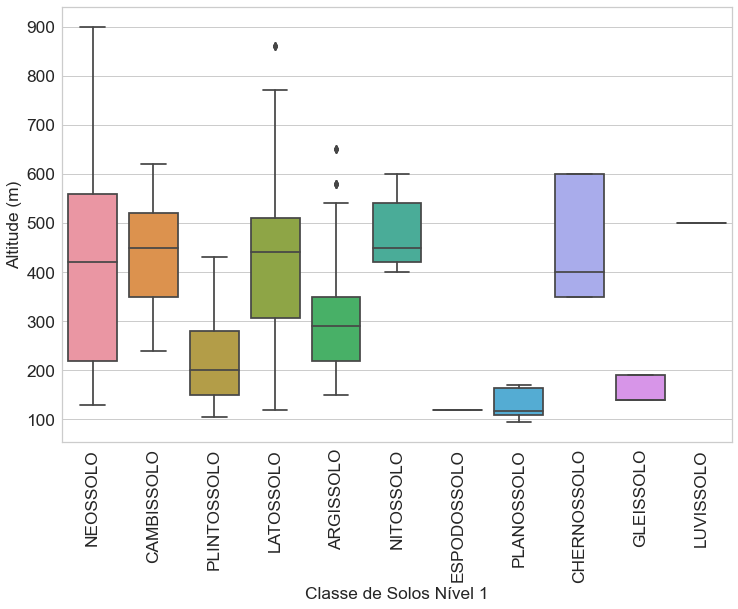

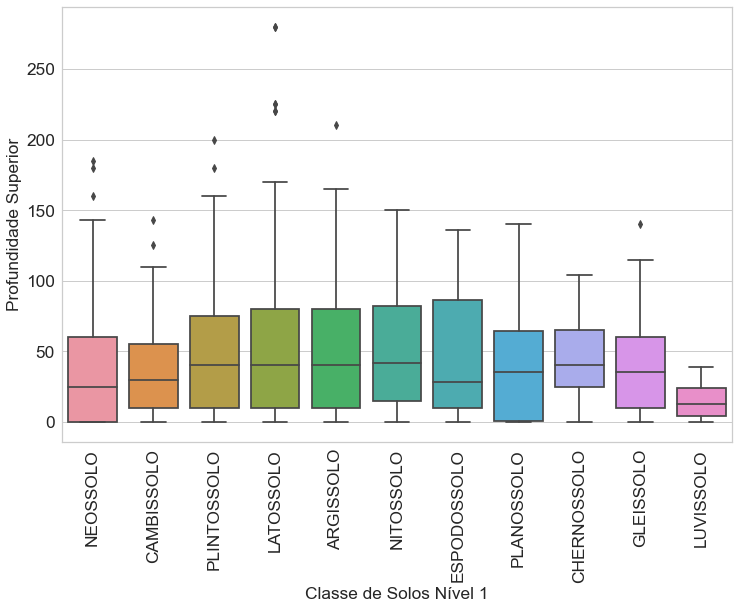

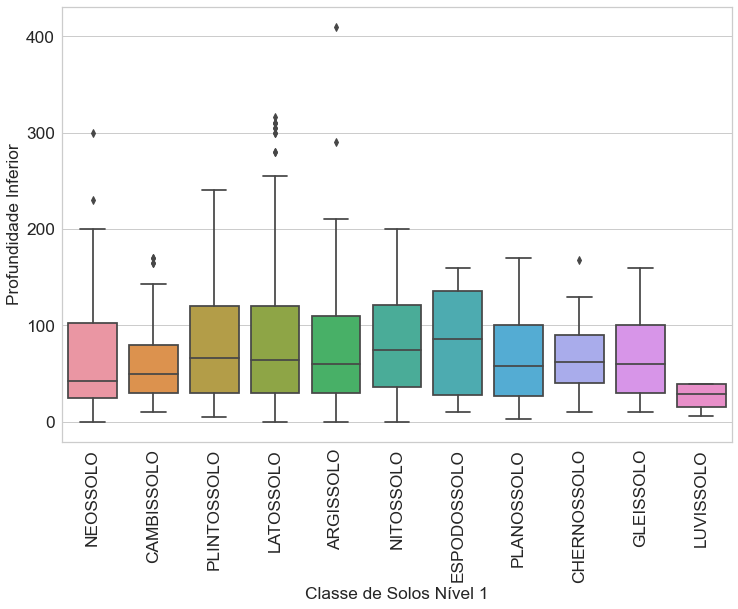

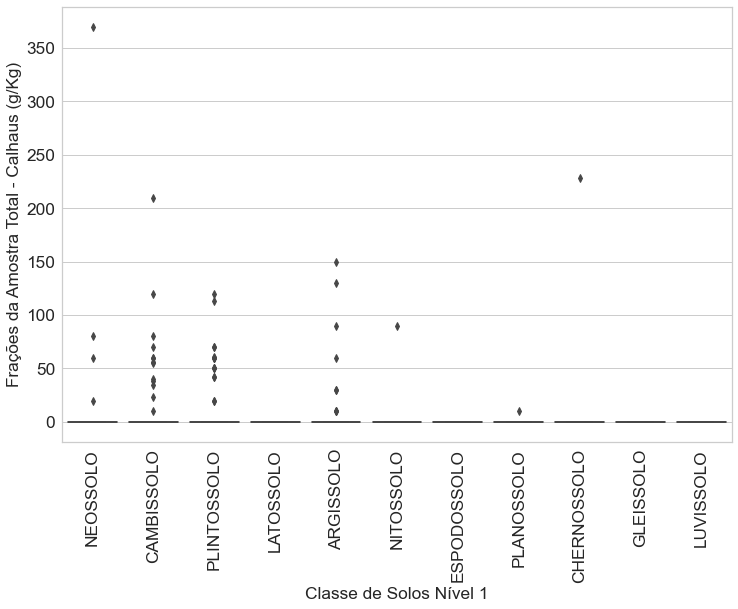

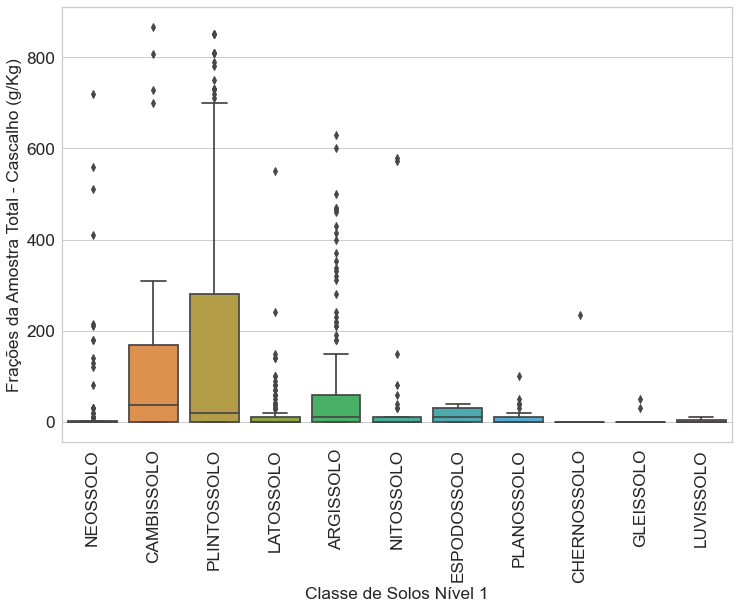

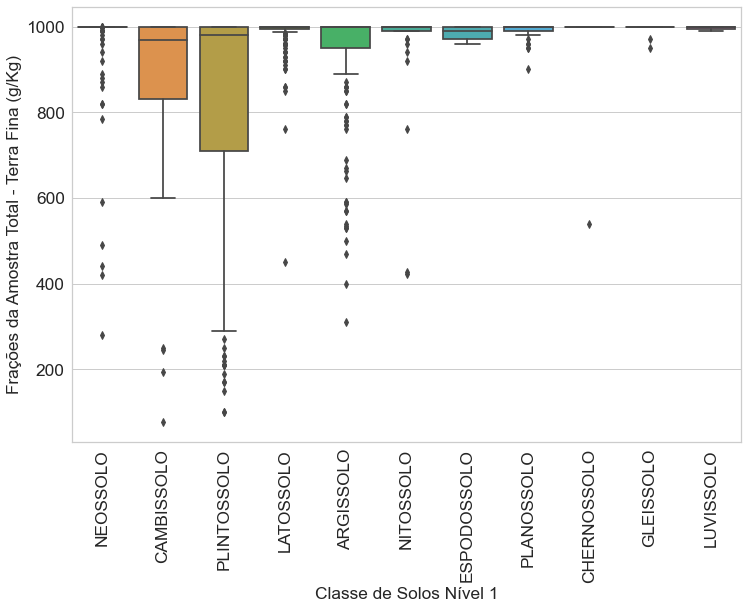

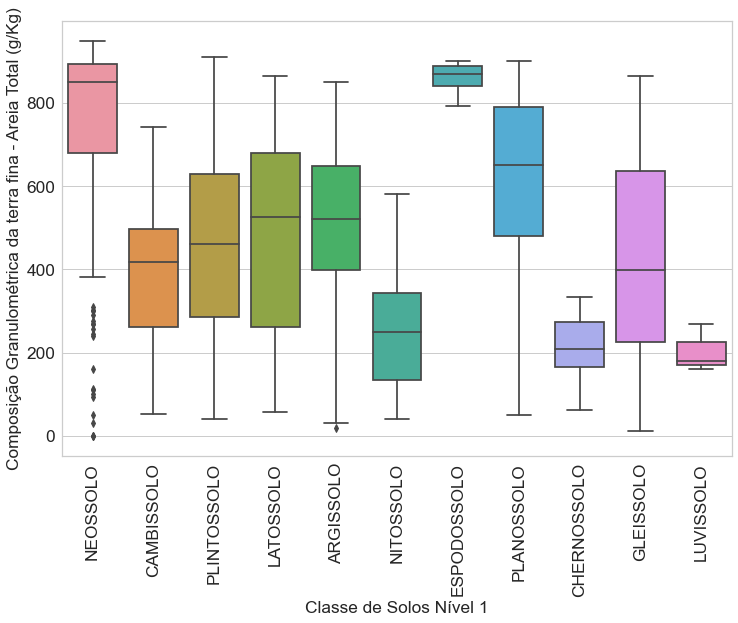

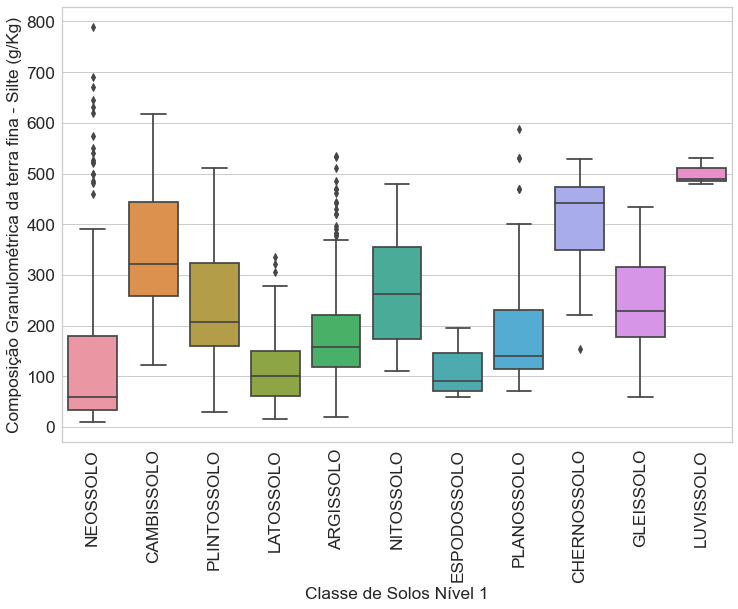

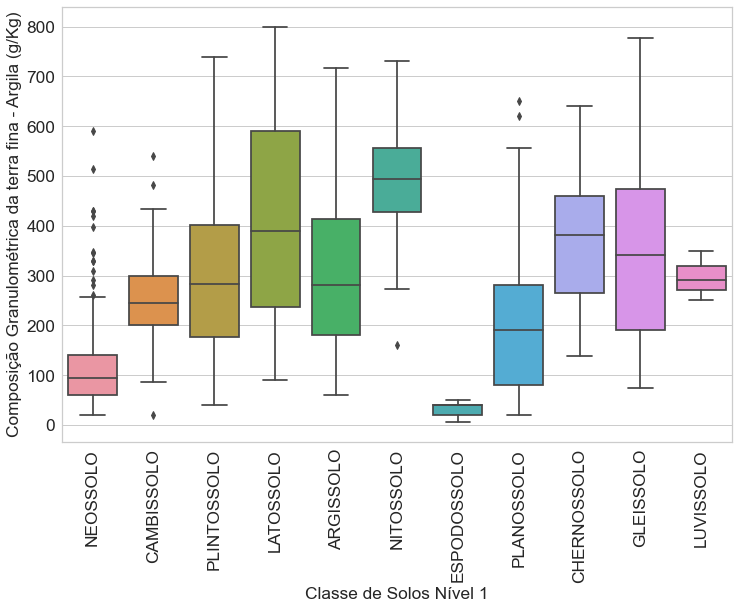

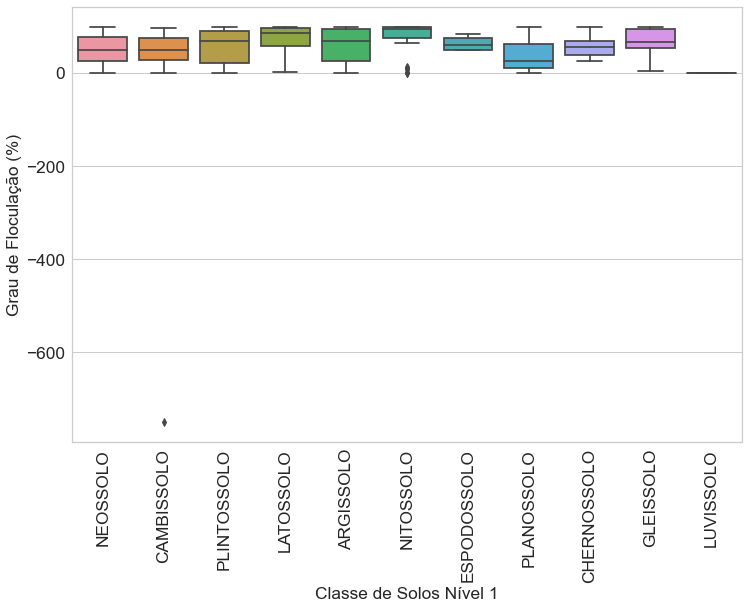

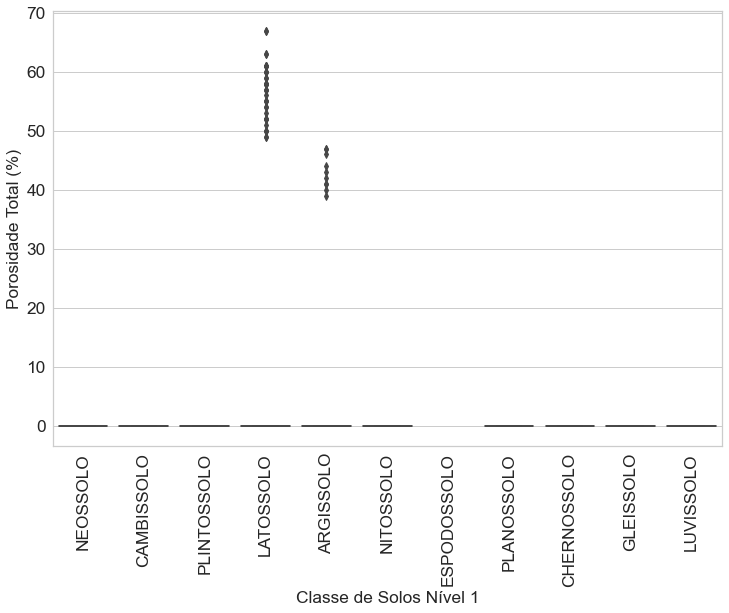

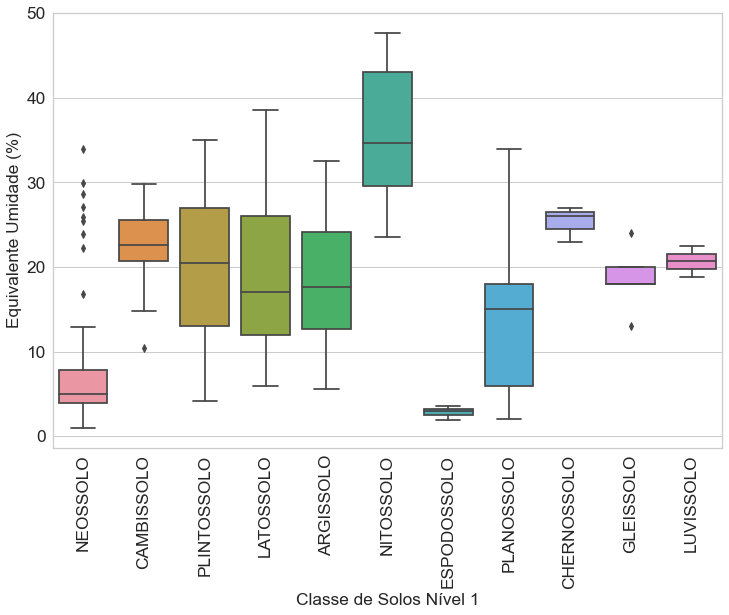

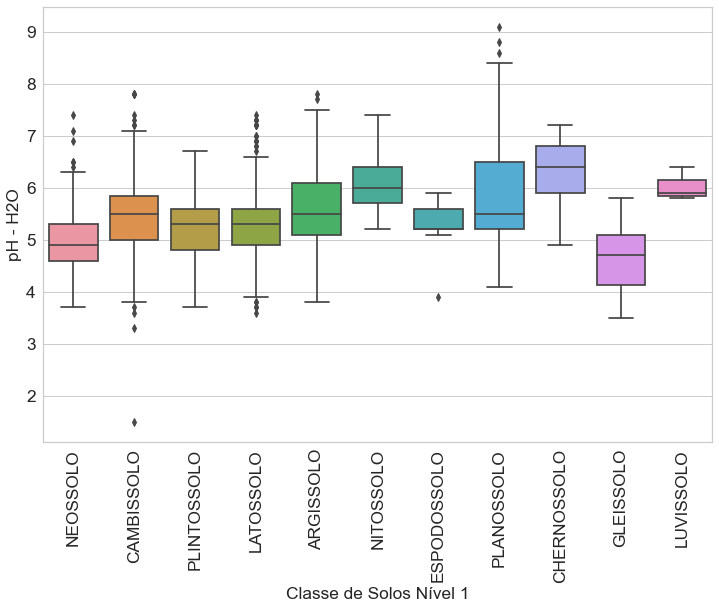

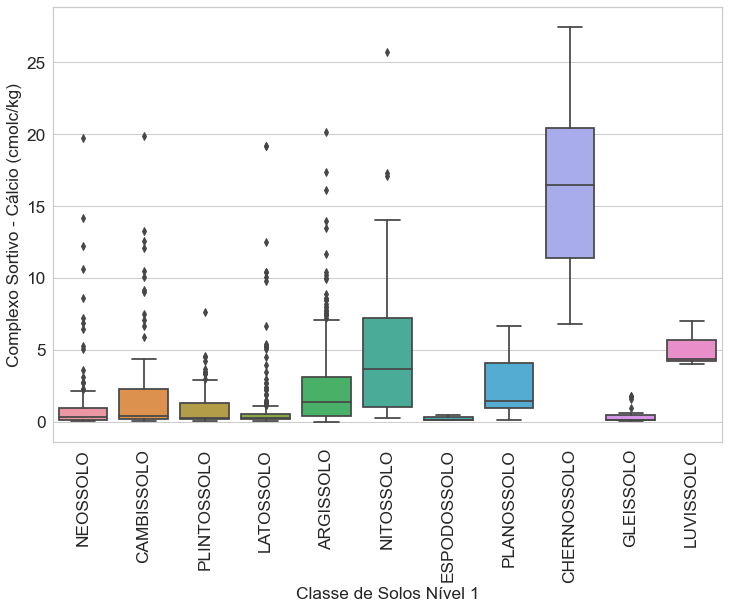

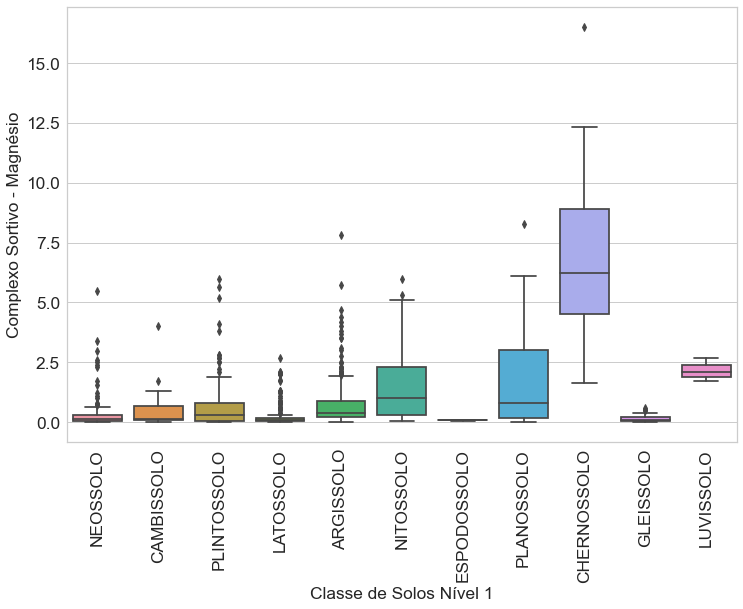

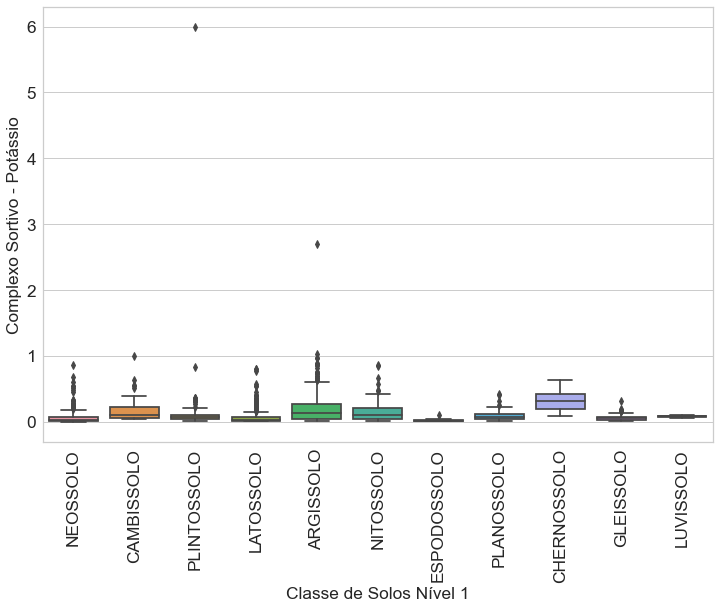

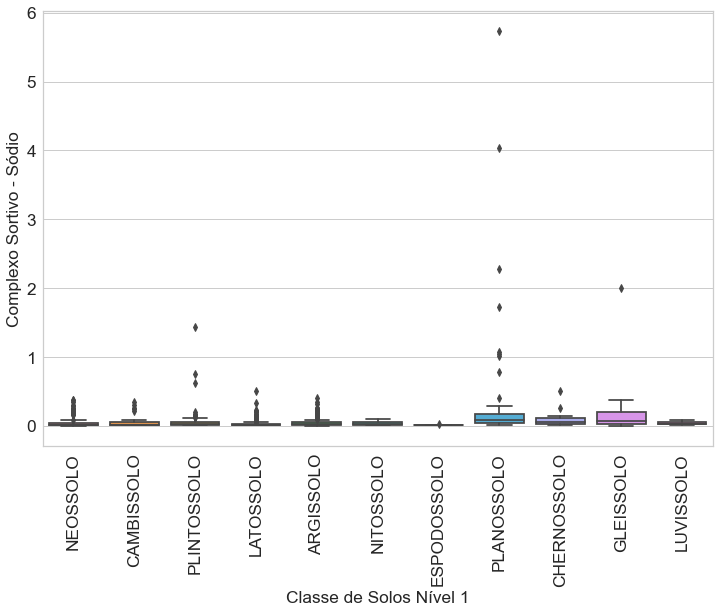

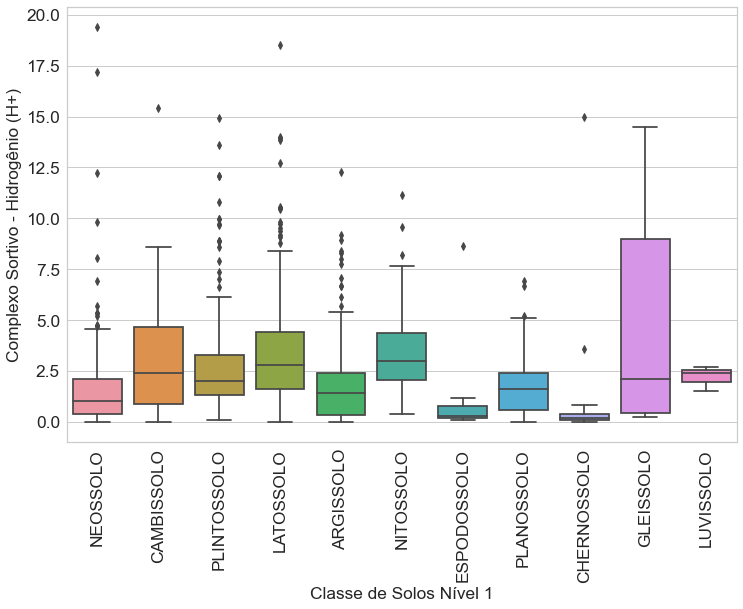

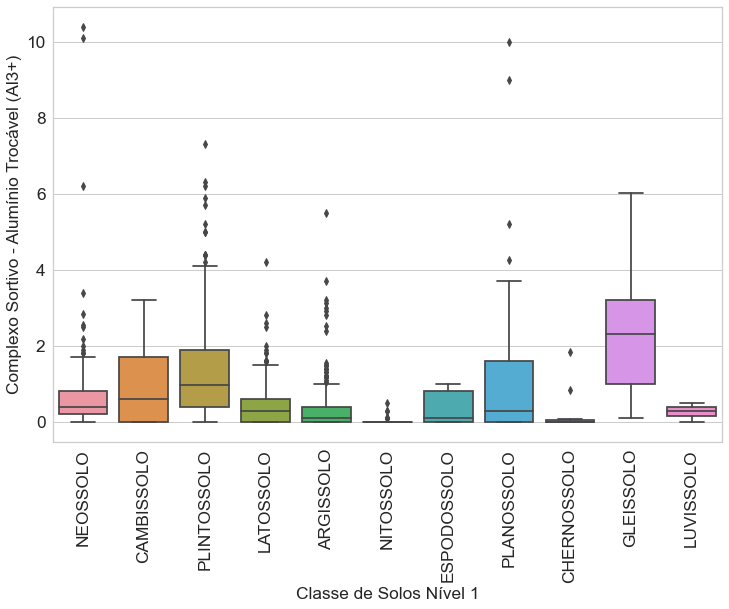

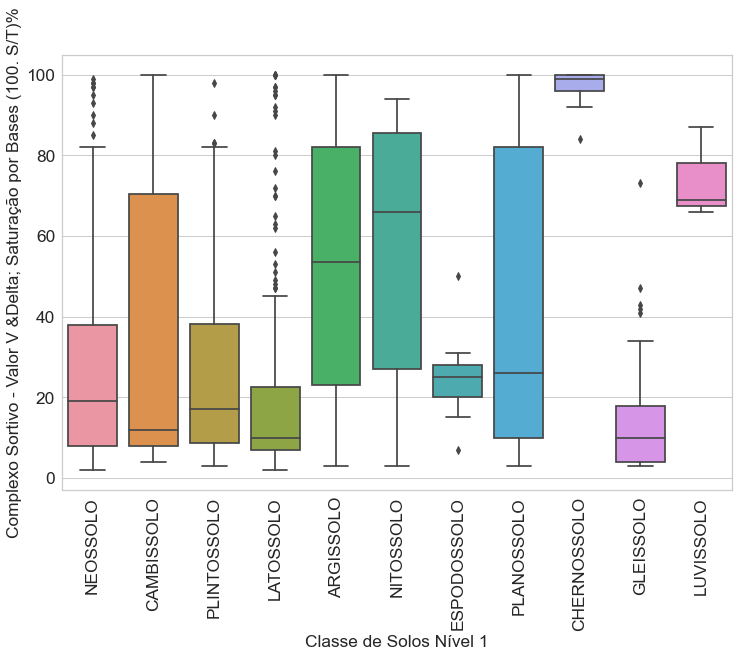

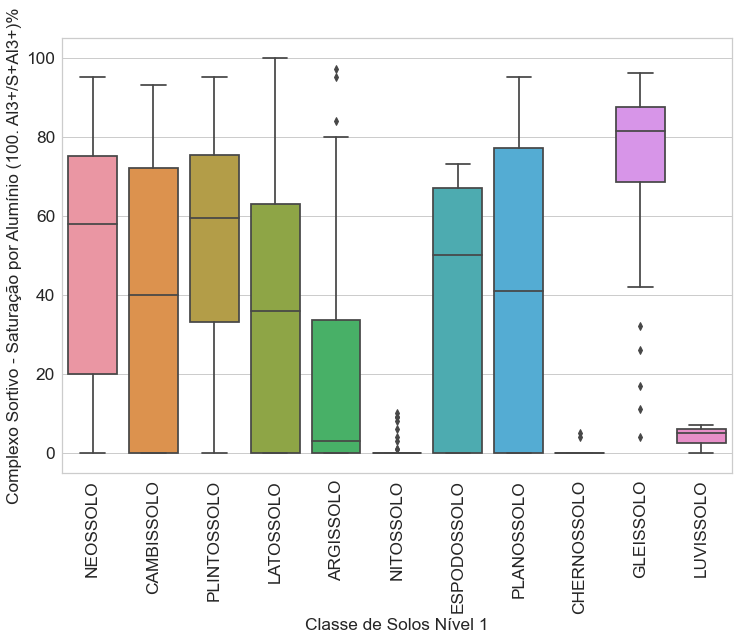

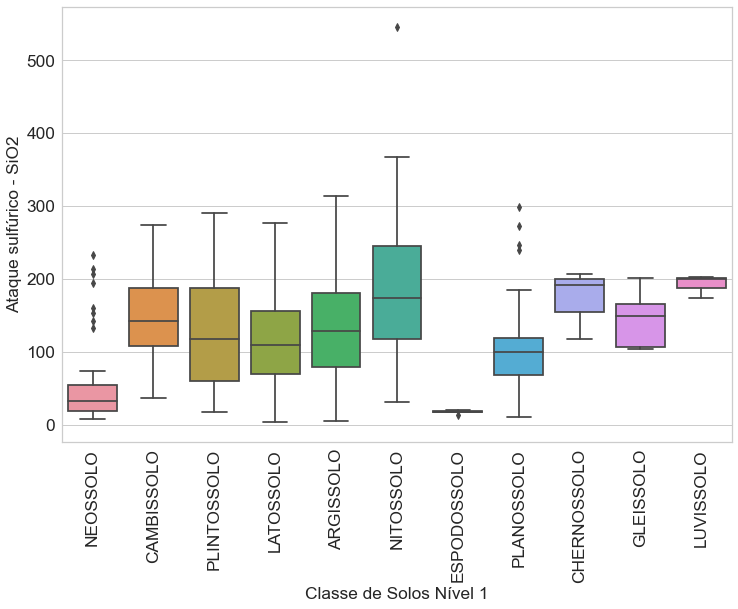

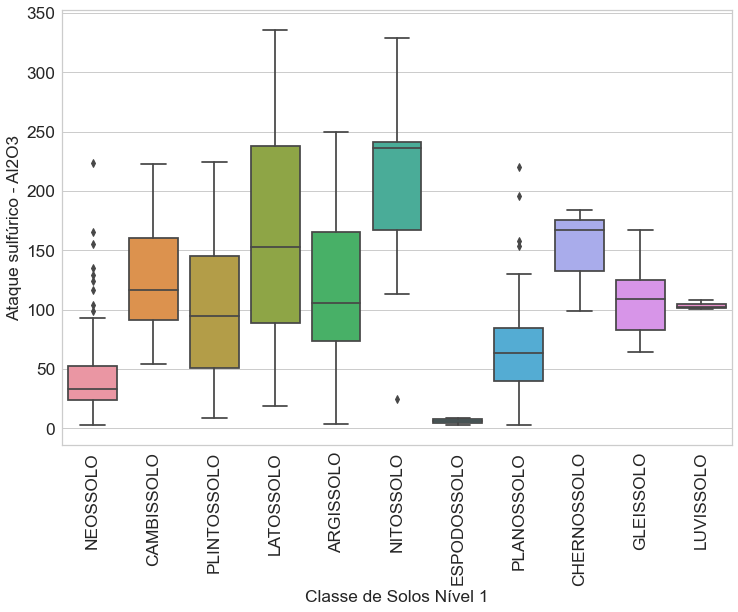

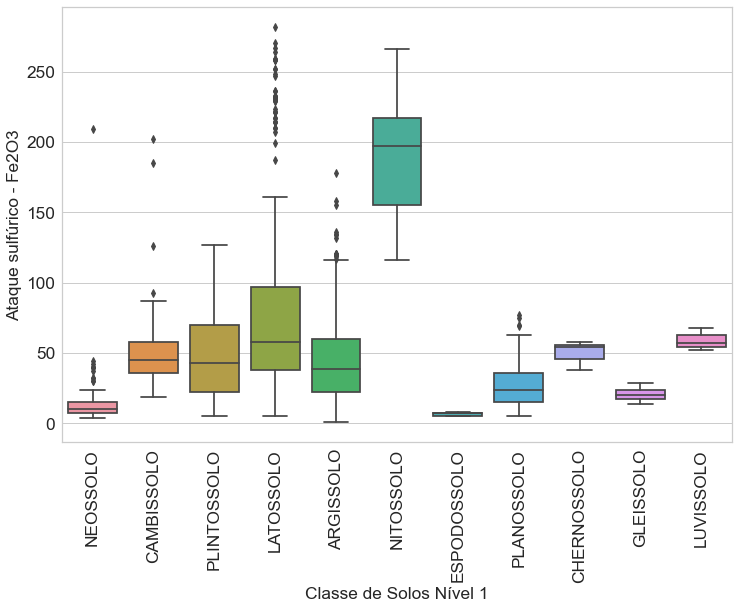

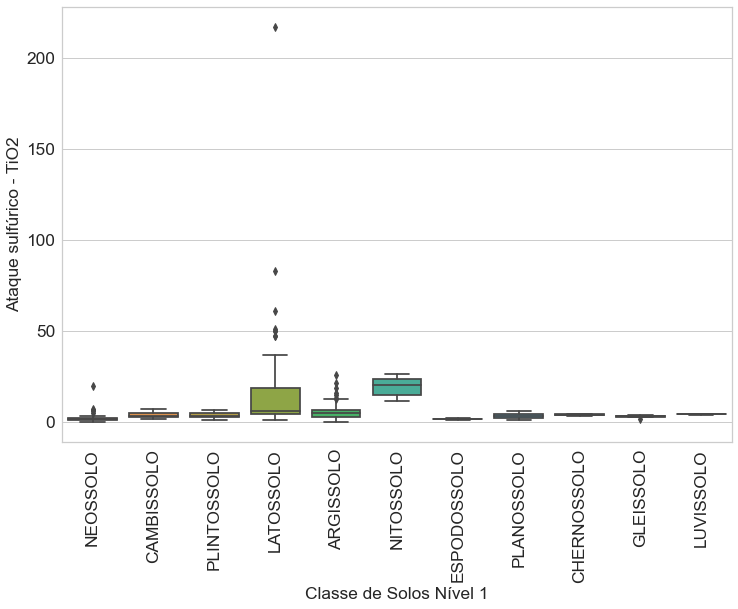

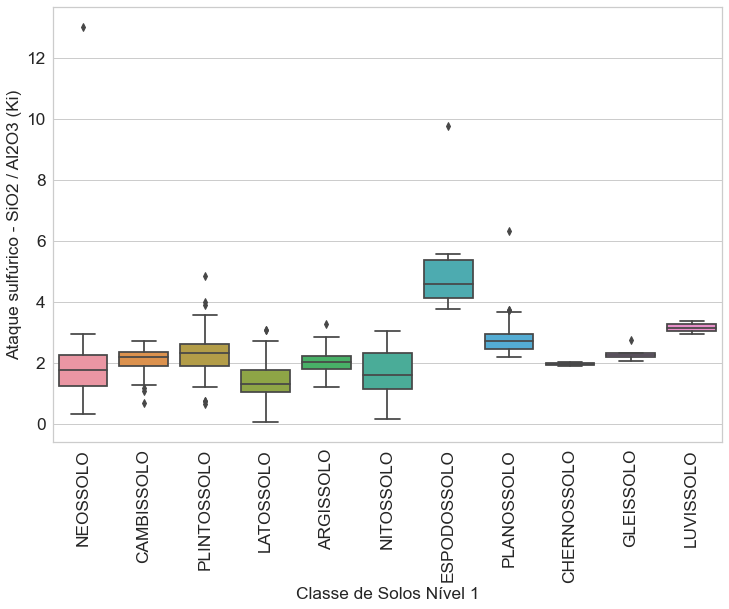

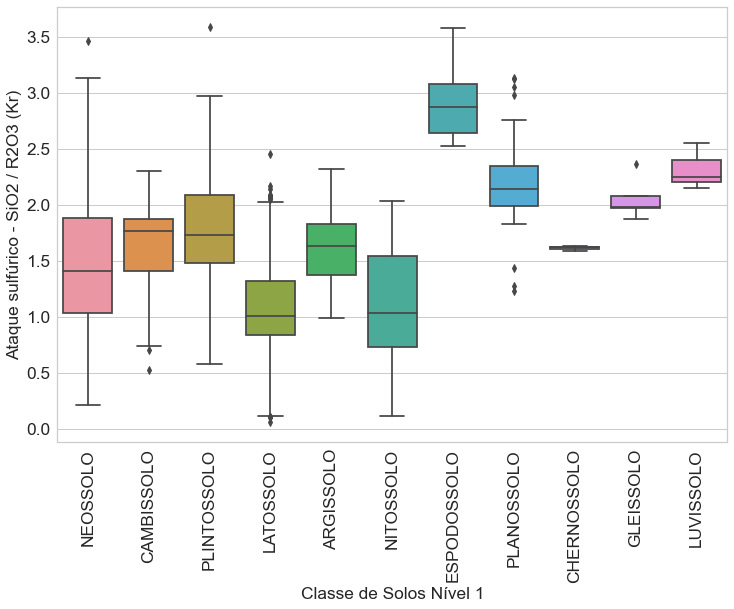

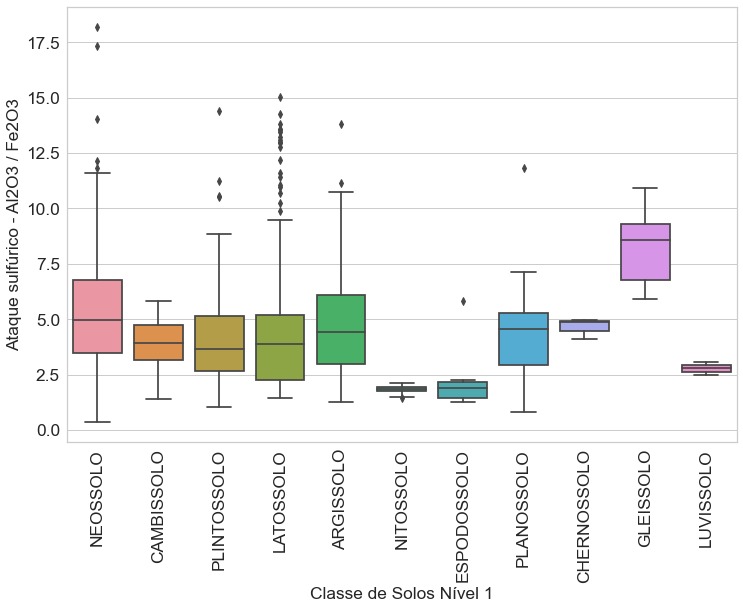

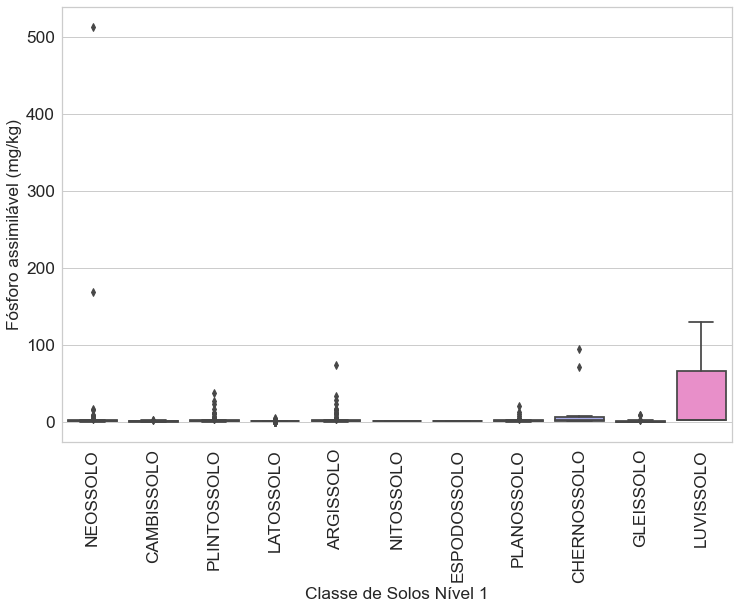

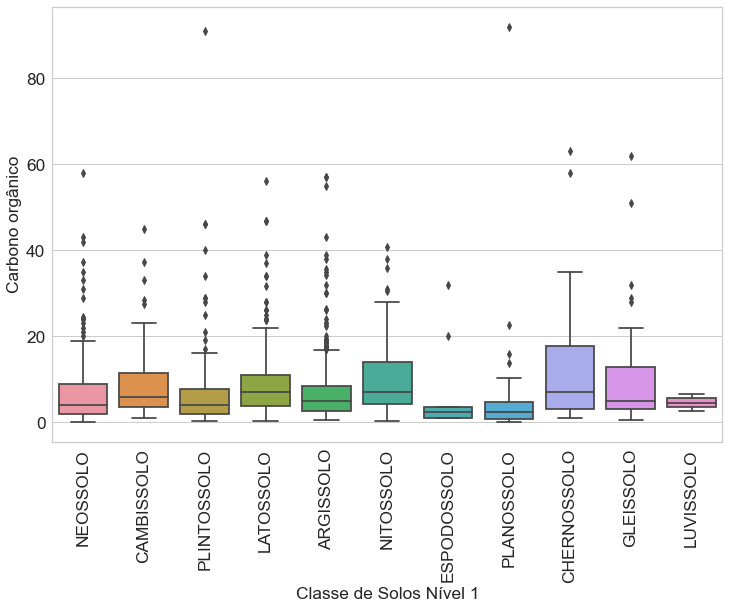

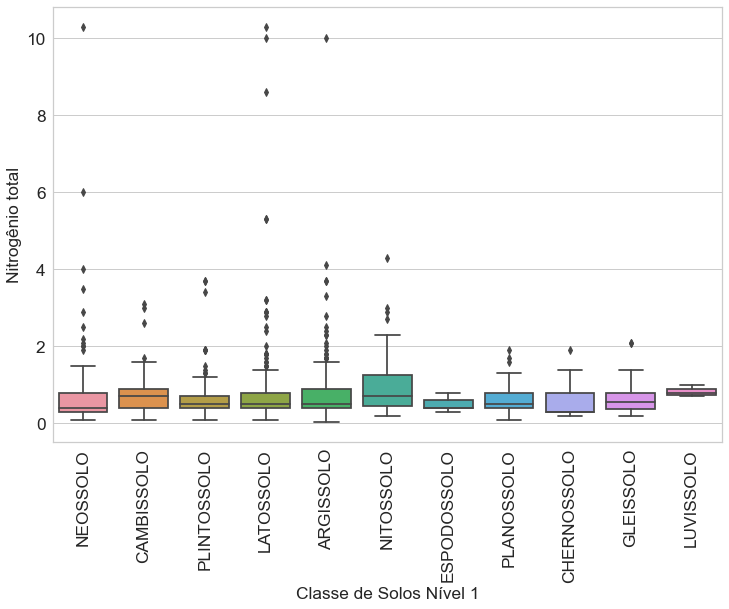

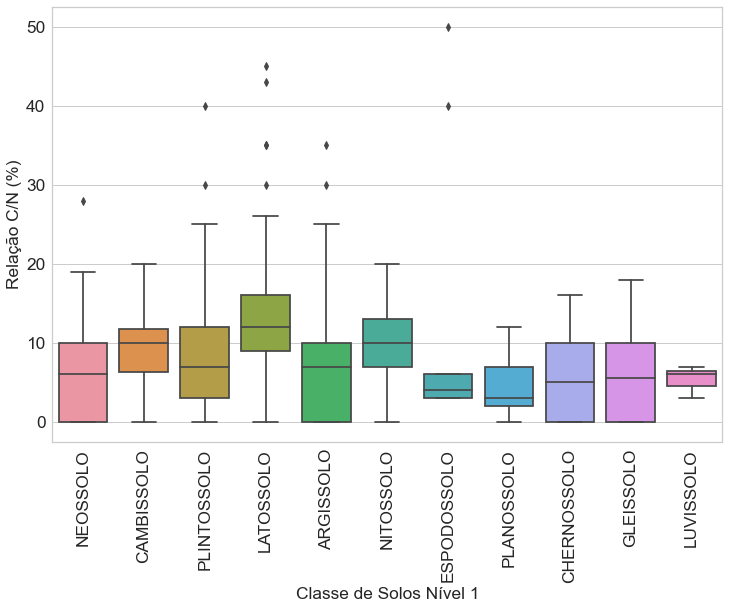

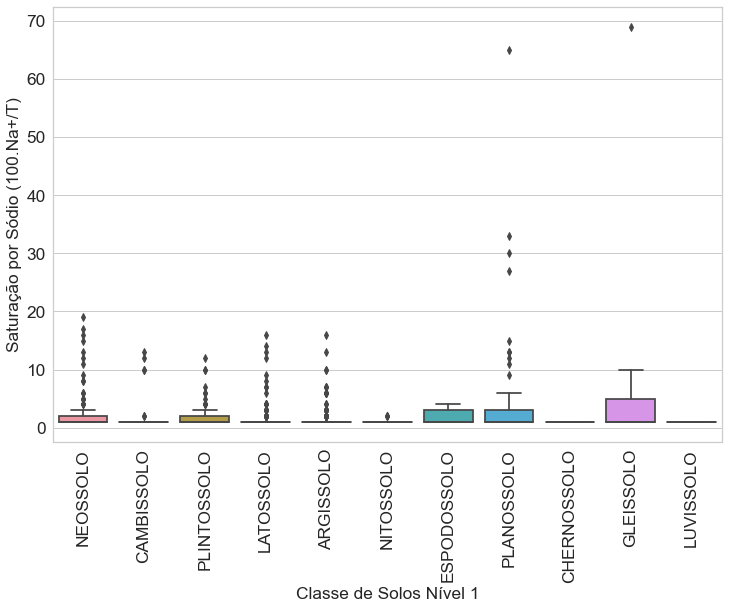

In [148]:
for var in var_quant:
    grafico_boxplot_grp(data_3, var, "")

In [105]:
def grafico_barras_prop_grp(data, variable):
    (data
     .groupby(variable)['Classe de Solos Nível 1']
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.catplot, "data"), x=variable, y="Proportion", hue = 'Classe de Solos Nível 1', kind="bar"))
    plt.xticks(rotation='vertical')
    plt.ylim(0,1)    
    plt.show()

In [106]:
var_quali.remove('Classe de Solos Nível 1')

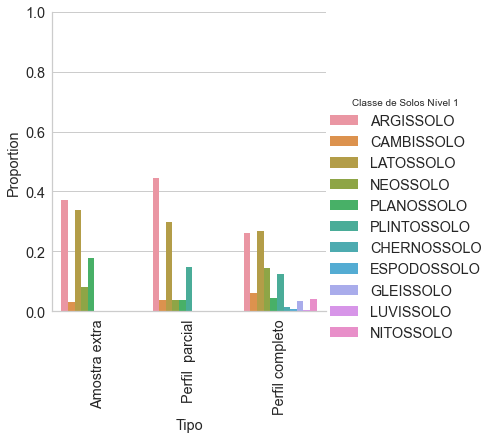

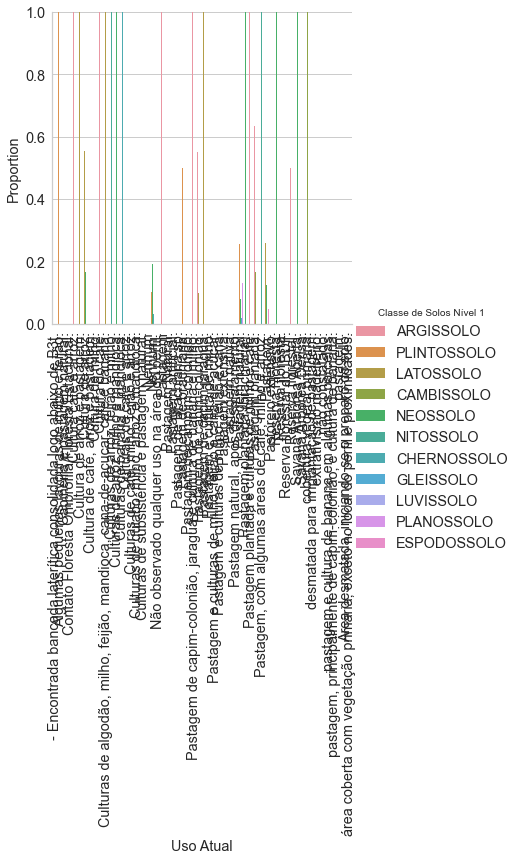

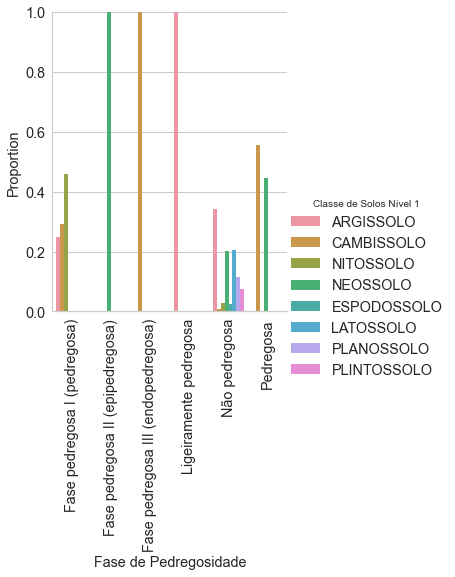

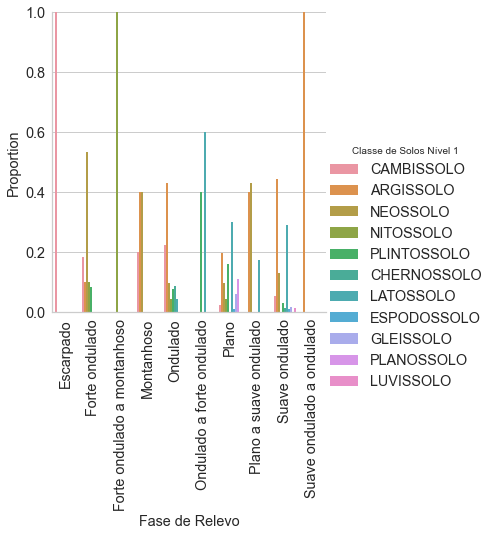

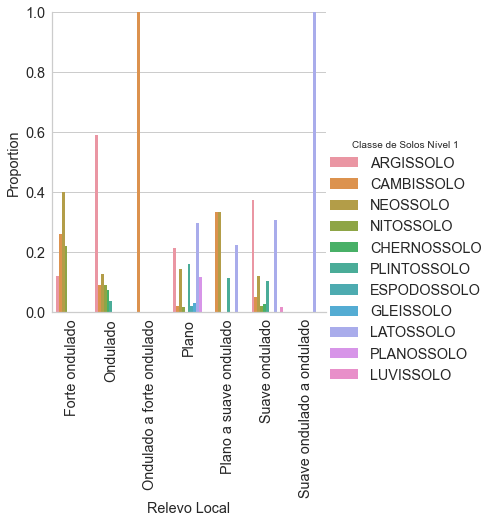

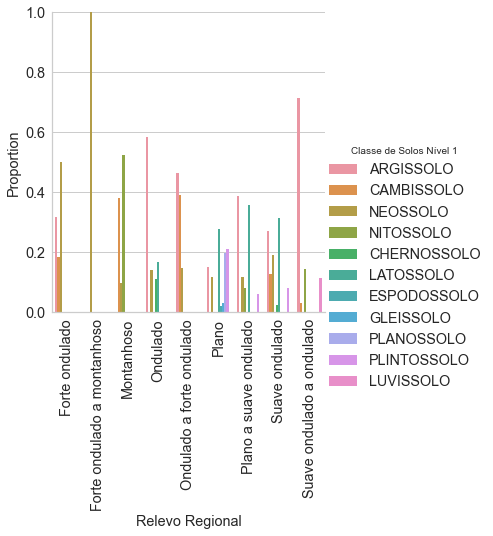

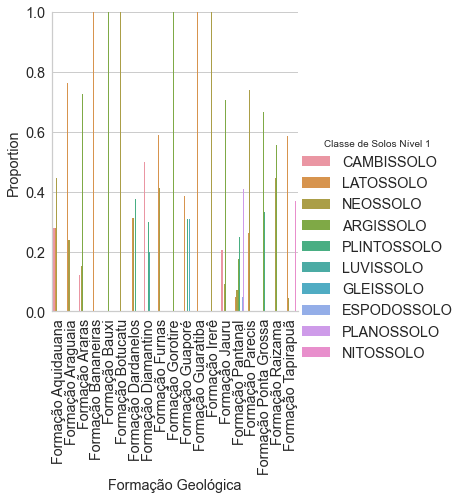

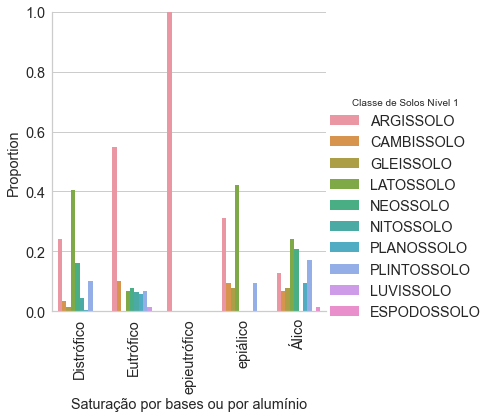

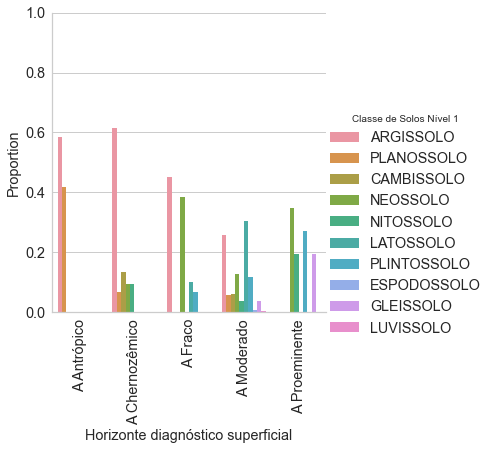

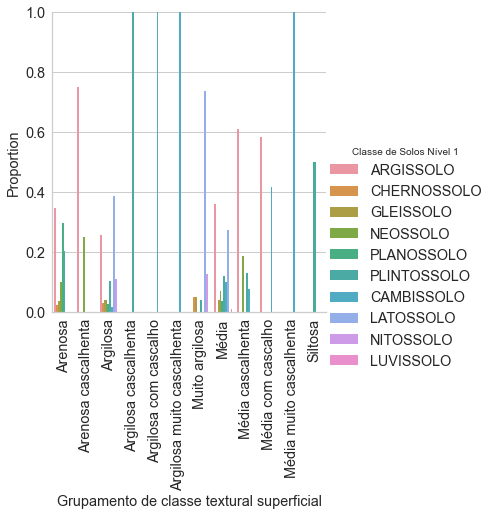

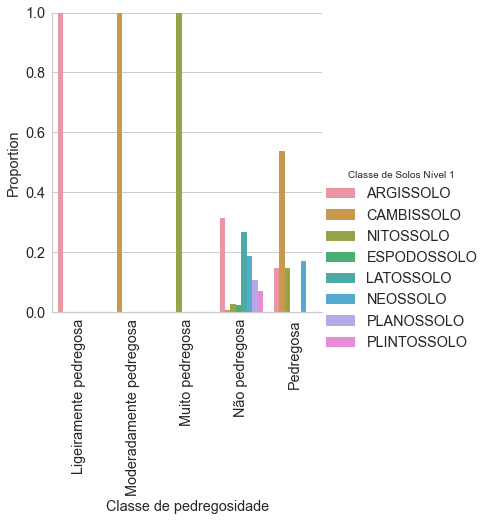

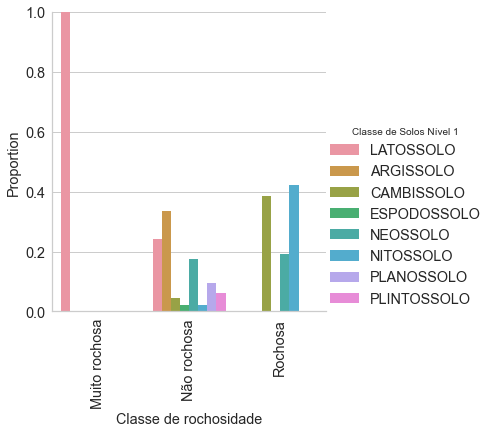

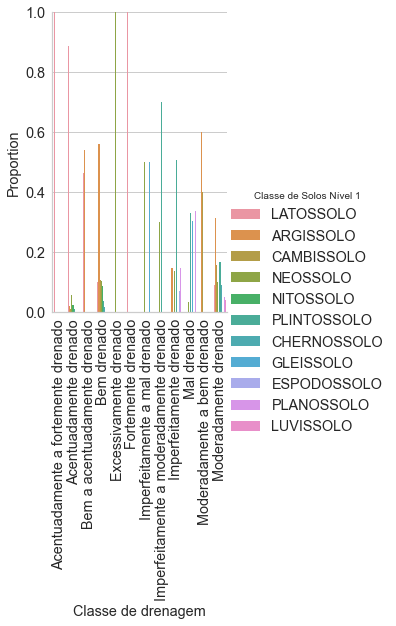

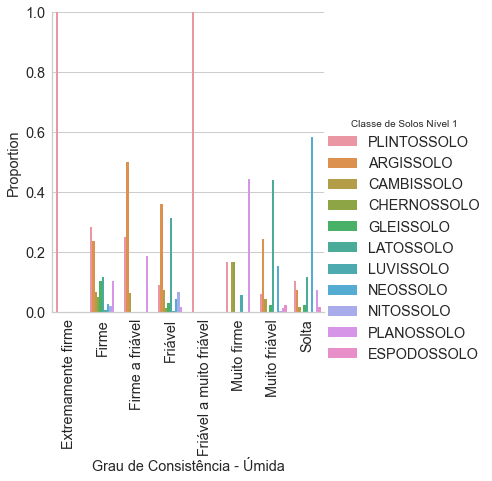

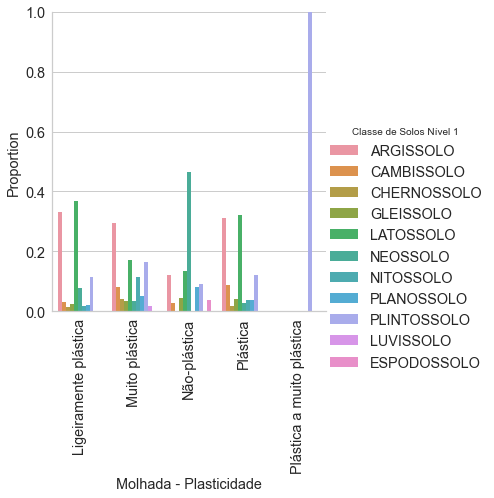

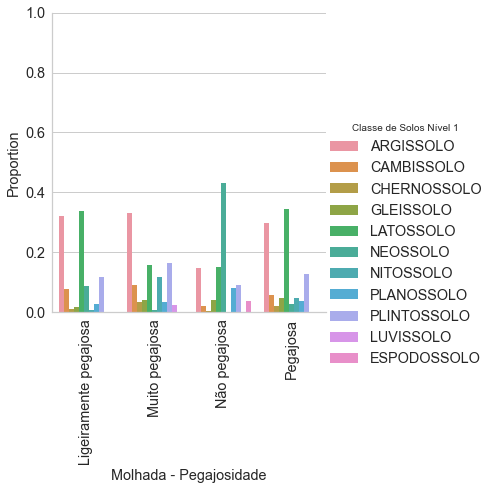

In [107]:
for var in var_quali:
    grafico_barras_prop_grp(data_3, var)

In [108]:
#quantificação do número de dados em cada classe
data_3['Classe de Solos Nível 1'].value_counts()

LATOSSOLO      355
ARGISSOLO      351
NEOSSOLO       179
PLINTOSSOLO    155
CAMBISSOLO      75
PLANOSSOLO      67
NITOSSOLO       48
GLEISSOLO       42
CHERNOSSOLO     17
ESPODOSSOLO      9
LUVISSOLO        4
Name: Classe de Solos Nível 1, dtype: int64

Remoção de outliers

In [109]:
#Criação de base apenas com dados quantitativos
data_quant = data_3[var_quant].copy()

In [110]:
#Remoção de outliers maiores de 1.5x(valor em 99%) e menores que 1.5x(valor em 1%)

def remocao_outliers(data, var):
    P = np.nanpercentile(data[var], [1, 99])
    data[var] = data[var].mask((data[var] > 1.5*P[1]) | (data[var] < P[0]/1.5))

In [111]:
for var in var_quant:
    remocao_outliers(data_quant,var)

verificacao=data_quant.describe(percentiles=[.25, .5, .75, .99]).round(2)

In [112]:
#Transformação dos valores NaN em 0
data_quant= data_quant.fillna(0)

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(data_quant)

In [114]:
data_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Altitude (m)                                                        1302 non-null   float64
 1   Profundidade Superior                                               1302 non-null   float64
 2   Profundidade Inferior                                               1302 non-null   float64
 3   Frações da Amostra Total - Calhaus (g/Kg)                           1302 non-null   float64
 4   Frações da Amostra Total - Cascalho (g/Kg)                          1302 non-null   float64
 5   Frações da Amostra Total - Terra Fina (g/Kg)                        1302 non-null   float64
 6   Composição Granulométrica da terra fina - Areia Total (g/Kg)        1302 non-null   float64
 7   Composição Gran

Desenvolvimento do Modelo de Machine Learning

In [115]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
# Bibliotecas para treinamento e cálculo de métrica
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve, confusion_matrix, classification_report
from yellowbrick.classifier.rocauc import roc_auc
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [117]:
#Transformação de classes para números
classes = [
  (data_3['Classe de Solos Nível 1'] == 'ARGISSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'CAMBISSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'CHERNOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'ESPODOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'GLEISSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'LATOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'LUVISSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'NEOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'NITOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'PLANOSSOLO'),
  (data_3['Classe de Solos Nível 1'] == 'PLINTOSSOLO')
]
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

y_new = np.select(classes, values) # Construindo a variável

In [118]:
#Separação dos datasets de treino e teste
X = x_scaled
y = y_new
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    stratify=y,
                                                    random_state = 42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

Modelo 1 - Regressão Logística

In [149]:
# Criando o modelo Regressão Logistica
model_lr = LogisticRegression(multi_class="ovr")   
  
# Treinamento do modelo Regressão Logistica em CPU
model_lr.fit(X_train, y_train) 

LogisticRegression(multi_class='ovr')

In [150]:
# Predições
y_pred_lr = model_lr.predict(X_test) 

In [151]:
#Metrificação do modelo
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63        88
           1       0.80      0.21      0.33        19
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         2
           4       0.67      0.20      0.31        10
           5       0.72      0.88      0.79        89
           6       0.00      0.00      0.00         1
           7       0.53      0.58      0.55        45
           8       1.00      0.17      0.29        12
           9       0.50      0.06      0.11        17
          10       0.53      0.54      0.53        39

    accuracy                           0.61       326
   macro avg       0.57      0.33      0.36       326
weighted avg       0.62      0.61      0.58       326



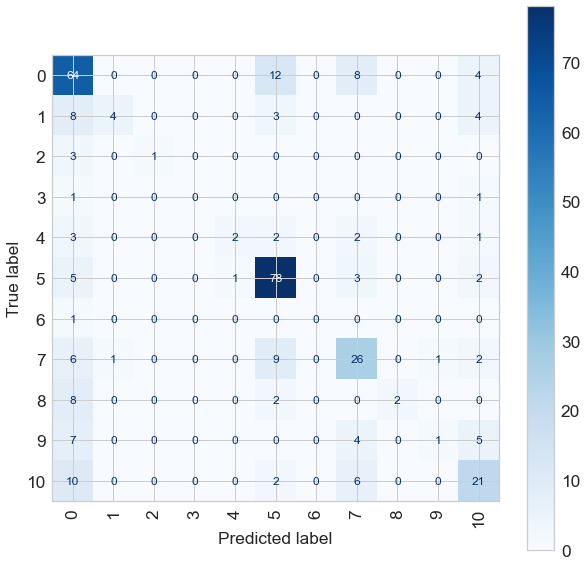

In [152]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(model_lr, X_test, y_test, cmap='Blues', xticks_rotation="vertical", ax=plt.gca())
plt.rcParams.update({'font.size': 12})

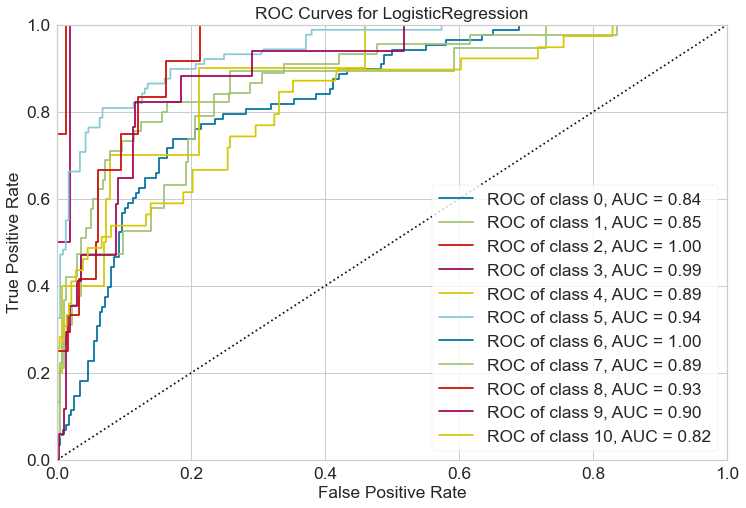

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression(multi_class='ovr'), macro=False,
       micro=False)

In [153]:
roc_auc(model_lr, X_train, y_train, X_test=X_test, y_test=y_test, micro=False, macro=False)

Avaliação do modelo Random Forest

In [154]:
# Criando o modelo Random Forest
model_rfc = RandomForestClassifier(n_estimators = 5, random_state = 42)   
  
# Treinamento do modelo Random Forest
model_rfc.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=5, random_state=42)

In [155]:
# Predições
y_pred_rfc = model_rfc.predict(X_test) 

In [156]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        88
           1       0.50      0.47      0.49        19
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         2
           4       0.33      0.40      0.36        10
           5       0.79      0.78      0.78        89
           6       0.00      0.00      0.00         1
           7       0.66      0.78      0.71        45
           8       0.90      0.75      0.82        12
           9       0.50      0.41      0.45        17
          10       0.66      0.49      0.56        39

    accuracy                           0.68       326
   macro avg       0.52      0.49      0.50       326
weighted avg       0.68      0.68      0.67       326



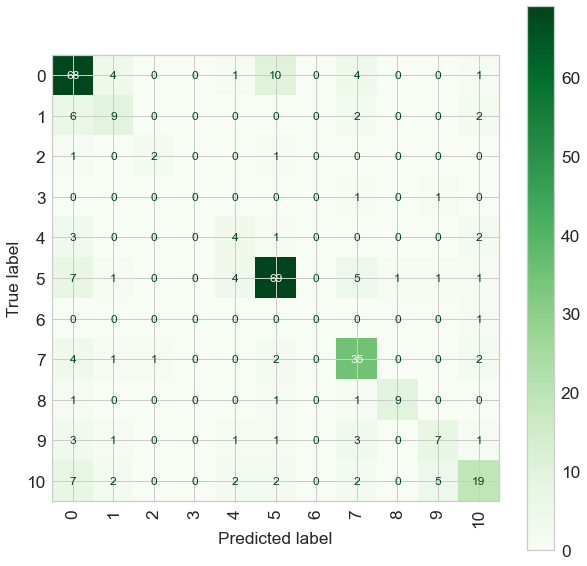

In [157]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(model_rfc, X_test, y_test, cmap='Greens', xticks_rotation="vertical", ax=plt.gca())
plt.rcParams.update({'font.size': 12})

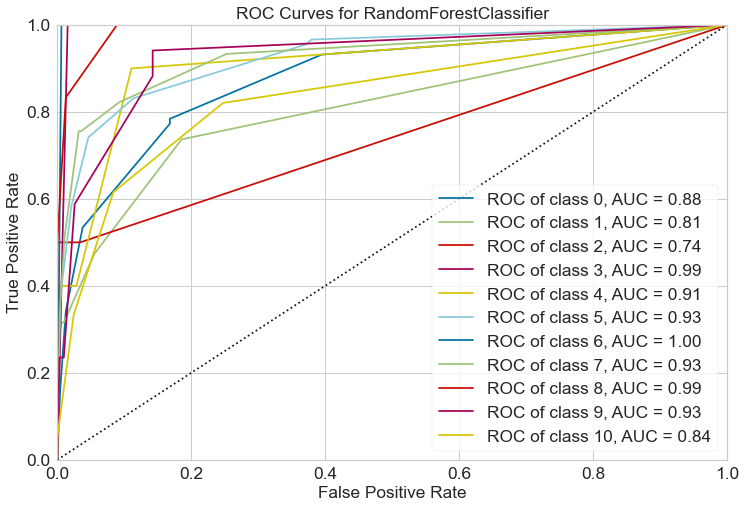

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(n_estimators=5, random_state=42),
       macro=False, micro=False)

In [158]:
roc_auc(model_rfc, X_train, y_train, X_test=X_test, y_test=y_test, micro=False, macro=False)

Modelo 3 - GXBoost

In [159]:
# Parametrização do XGBoost
params = {'learning_rate': 0.1,
          'colsample_bytree' : 0.3,
          'max_depth': 5,
          'objective': 'survival:cox',
          'alpha' : 10,
          'n_estimators': 100}

# Treinamento do modelo XGBoost
model_gx = XGBClassifier(**params)
model_gx.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                      eval_metric='auc', verbose=False)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [160]:
y_pred_gx = model_gx.predict(X_test)

In [161]:
print(classification_report(y_test, y_pred_gx))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        88
           1       0.80      0.21      0.33        19
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.75      0.30      0.43        10
           5       0.86      0.89      0.87        89
           6       0.00      0.00      0.00         1
           7       0.64      0.76      0.69        45
           8       1.00      0.33      0.50        12
           9       0.56      0.29      0.38        17
          10       0.67      0.62      0.64        39

    accuracy                           0.70       326
   macro avg       0.53      0.39      0.41       326
weighted avg       0.70      0.70      0.67       326



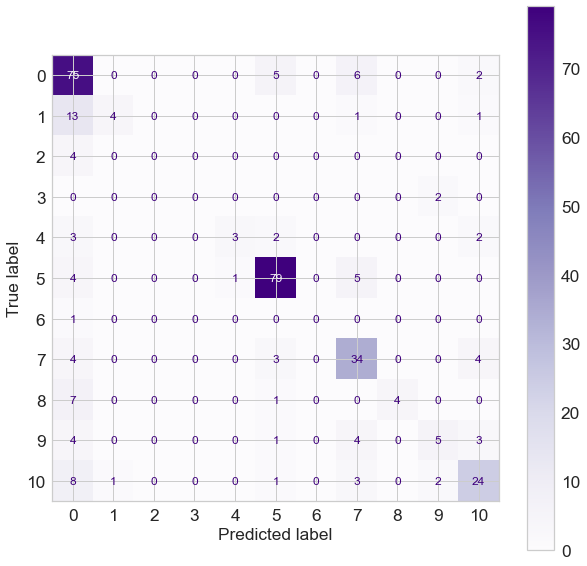

In [162]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(model_gx, X_test, y_test, cmap='Purples', ax=plt.gca())
plt.rcParams.update({'font.size': 12})

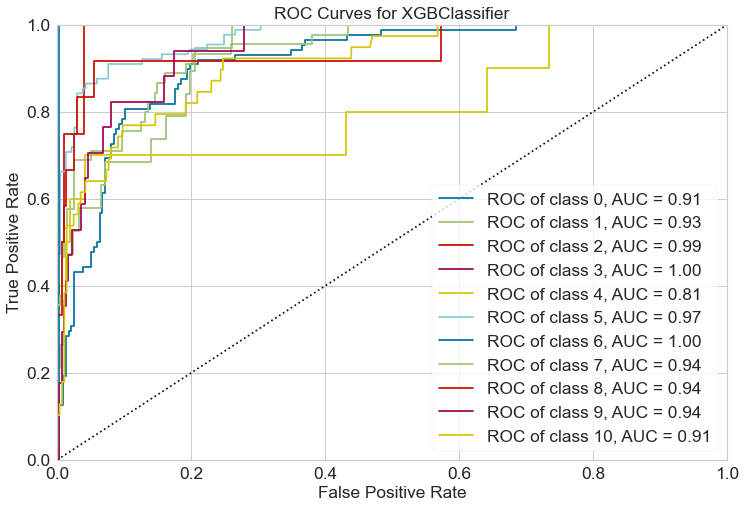

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                               callbacks=None, colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=0.3,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None,...id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                 

In [163]:
roc_auc(model_gx, X_train, y_train, X_test=X_test, y_test=y_test, micro=False, macro=False)

Modelo 4 - One versus One

In [164]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

In [165]:
model_ovo = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train, y_train)

In [166]:
y_pred_ovo = model_ovo.predict(X_test)

In [167]:
print(classification_report(y_test, y_pred_ovo))

              precision    recall  f1-score   support

           0       0.77      0.41      0.53        88
           1       0.67      0.32      0.43        19
           2       1.00      0.25      0.40         4
           3       0.50      0.50      0.50         2
           4       0.50      0.40      0.44        10
           5       0.76      0.66      0.71        89
           6       0.00      0.00      0.00         1
           7       0.68      0.71      0.70        45
           8       0.58      0.58      0.58        12
           9       0.50      0.29      0.37        17
          10       0.21      0.62      0.32        39

    accuracy                           0.54       326
   macro avg       0.56      0.43      0.45       326
weighted avg       0.65      0.54      0.56       326



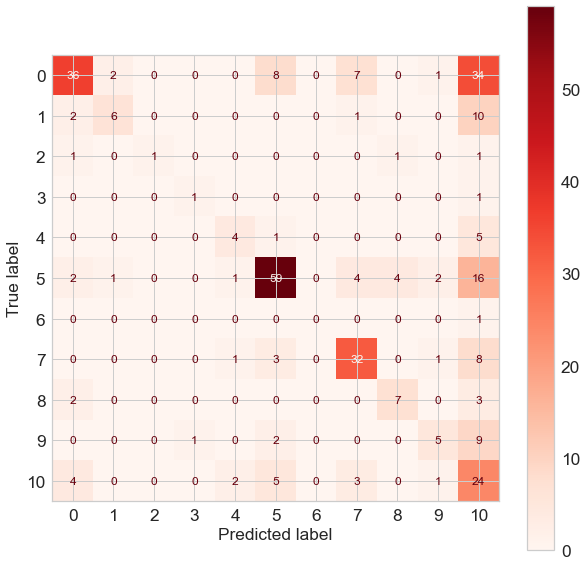

In [168]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(model_ovo, X_test, y_test, cmap='Reds', ax=plt.gca())
plt.rcParams.update({'font.size': 12})

Modelo 6 - Máquina de vetores de suporte

In [169]:
from sklearn.svm import SVC

In [170]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [171]:
y_pred_svm = model_svm.predict(X_test)

In [172]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.80      0.69        88
           1       0.75      0.16      0.26        19
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         2
           4       0.33      0.10      0.15        10
           5       0.82      0.89      0.85        89
           6       0.00      0.00      0.00         1
           7       0.61      0.76      0.67        45
           8       0.75      0.25      0.38        12
           9       0.33      0.06      0.10        17
          10       0.52      0.56      0.54        39

    accuracy                           0.66       326
   macro avg       0.52      0.39      0.41       326
weighted avg       0.65      0.66      0.63       326



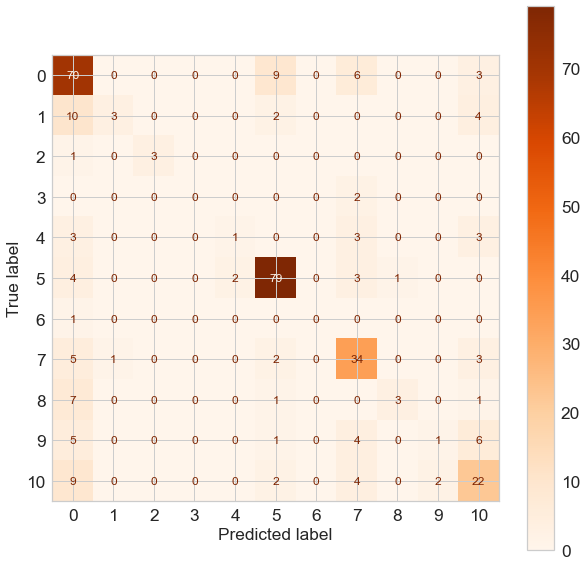

In [173]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(model_svm, X_test, y_test, cmap='Oranges', ax=plt.gca())
plt.rcParams.update({'font.size': 12})

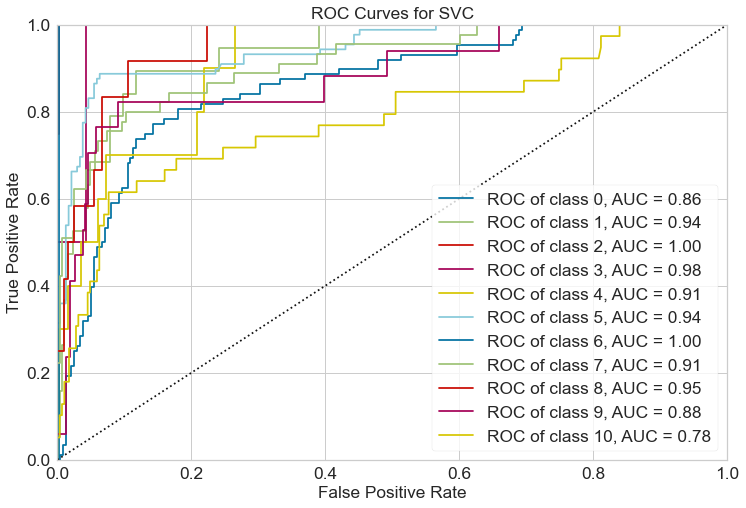

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=SVC(), macro=False, micro=False)

In [174]:
roc_auc(model_svm, X_train, y_train, X_test=X_test, y_test=y_test, micro=False, macro=False)

In [178]:
from collections import Counter

a = Counter(y_test)

print (a)

Counter({5: 89, 0: 88, 7: 45, 10: 39, 1: 19, 9: 17, 8: 12, 4: 10, 2: 4, 3: 2, 6: 1})
